# Imports

In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# File and system libraries
import gzip
import shutil
import os

print("Libraries imported successfully.")

Libraries imported successfully.


# Unzip

In [3]:
gzipped_file_path = r'C:\\Users\\renat\\Documents\\Neurotech\\Project-4\\base_antifraude.gz'
output_file_path = 'base_antifraude.csv'

# Check if the compressed file exists before proceeding
if not os.path.exists(gzipped_file_path):
    print(f"Error: The file '{gzipped_file_path}' was not found.")
else:
    try:
        print(f"Decompressing '{gzipped_file_path}'...")

        with gzip.open(gzipped_file_path, 'rb') as f_in:
            with open(output_file_path, 'wb') as f_out:
                # Copy the decompressed content from the input to the output file
                shutil.copyfileobj(f_in, f_out)
        
        print(f"Success! File decompressed to '{output_file_path}'")
        
    except Exception as e:
        print(f"An error occurred during decompression: {e}")

Decompressing 'C:\\Users\\renat\\Documents\\Neurotech\\Project-4\\base_antifraude.gz'...
Success! File decompressed to 'base_antifraude.csv'


# Leitura e Teste de Sanidade

In [4]:
csv_file_path = output_file_path

try:
    data_frame = pd.read_csv(csv_file_path, sep='\t')
    
    print(f"Success! File '{csv_file_path}' loaded into a DataFrame.")
    
    display(data_frame.head())
    
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the previous cell ran successfully.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Success! File 'base_antifraude.csv' loaded into a DataFrame.


C:\Users\renat\AppData\Local\Temp\ipykernel_23320\4129346326.py:4: DtypeWarning: Columns (203) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv(csv_file_path, sep='\t')


,id,documento,mes_ref,alvo,vlr_financiado,VAR1,VAR2,VAR3,VAR4,VAR5,...,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200
0,4db9c75f6a31c73414ad84fdd101b5d7,d92fa549809f55b4ea13caa1b108896f,202307,0.0,17820.60,0.166667,0.0,0.0,1.000000,NaN,...,0.609314,0.0,0.095790,NaN,0.066331,NaN,0.666667,0.135065,SUDESTE,0.0
1,9b07d4001632189d19de964894501e34,1af133c98723189f24bbfcb75abfcf92,202307,0.0,18513.56,0.166667,0.0,0.0,0.027211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NORTE,0.0
2,d55b6a81203f5a5ae6f362c483f36ff1,9e95be945b56ff10dc43df22381c9002,202307,0.0,22943.80,0.000000,0.0,0.0,0.013605,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,SUL,0.0
3,f6bb36049c3b42a62dfa88c46e0f79d2,50502098d83c37b5fa60241bc4bd6641,202307,0.0,19177.58,0.083333,0.0,0.0,0.020408,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,NaN,NORTE,0.0
4,2755ed6330b4980ea24faa1081183dc7,aad24a7552d24b46188103f4249f17e7,202307,0.0,16644.85,0.000000,0.0,0.0,0.000000,NaN,...,0.045513,NaN,0.532964,NaN,NaN,NaN,0.500000,NaN,NORDESTE,0.0


In [5]:
print("--- Shape Validation ---")

expected_rows = 47732
expected_cols = 205

actual_rows, actual_cols = data_frame.shape

print(f"Actual shape: {data_frame.shape}")
print(f"Expected shape: ({expected_rows}, {expected_cols})")

if actual_rows == expected_rows and actual_cols == expected_cols:
    print("✅ Shape validation passed!\n")
else:
    print("⚠️ Shape validation failed!\n")

print("--- Column Presence Validation ---")


required_columns = ['id', 'documento', 'mes_ref', 'vlr_financiado', 'alvo']

print(f"Checking for required columns: {required_columns}")

missing_columns = set(required_columns) - set(data_frame.columns)

if not missing_columns:
    print("✅ Column validation passed! All required columns are present.")
else:
    print(f"⚠️ Column validation failed! Missing columns: {list(missing_columns)}")

--- Shape Validation ---
Actual shape: (47732, 205)
Expected shape: (47732, 205)
✅ Shape validation passed!

--- Column Presence Validation ---
Checking for required columns: ['id', 'documento', 'mes_ref', 'vlr_financiado', 'alvo']
✅ Column validation passed! All required columns are present.


# Limpeza Inicial

In [6]:
print("--- DataFrame Info ---")
data_frame.info()

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47732 entries, 0 to 47731
Columns: 205 entries, id to VAR200
dtypes: float64(190), int64(1), object(14)
memory usage: 74.7+ MB


In [7]:
print("--- Descriptive Statistics for Numerical Columns ---")
display(data_frame.describe())

--- Descriptive Statistics for Numerical Columns ---


,mes_ref,alvo,vlr_financiado,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,...,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR200
count,47732.000000,47732.000000,47594.000000,26947.000000,26947.000000,40926.000000,42871.000000,2.991000e+03,47389.0,6047.000000,...,8.815000e+03,18139.000000,1894.000000,2.282900e+04,2991.000000,2.238000e+03,7704.000000,35629.000000,3838.000000,44930.000000
mean,202309.288653,0.041607,19183.781266,0.201139,0.156529,0.031447,0.501378,3.063411e-01,0.0,0.275528,...,2.464883e-01,0.188585,0.057550,2.751056e-01,0.393977,2.934698e-01,0.308971,0.489437,0.259947,0.054422
std,1.646360,0.199692,5535.485493,0.253286,0.293852,0.174525,0.483991,2.127711e-01,0.0,0.203745,...,2.260249e-01,0.186897,0.178369,2.133877e-01,0.224401,2.226813e-01,0.201970,0.180096,0.189631,0.165324
min,202307.000000,0.000000,2427.880000,0.000000,0.000000,0.000000,0.000000,5.601228e-07,0.0,0.000063,...,1.414208e-07,0.000025,0.000000,2.200547e-07,0.000001,3.038740e-07,0.000001,0.000000,0.000062,0.000000
25%,202308.000000,0.000000,15742.620000,0.000000,0.000000,0.000000,0.000000,1.429320e-01,0.0,0.125406,...,8.405769e-02,0.059845,0.000000,1.235316e-01,0.218558,1.078872e-01,0.163283,0.333333,0.130120,0.000000
50%,202309.000000,0.000000,18836.810000,0.083333,0.000000,0.000000,0.476190,2.626918e-01,0.0,0.229391,...,1.814668e-01,0.128681,0.000000,2.230746e-01,0.377240,2.409756e-01,0.277927,0.500000,0.211768,0.000000
75%,202311.000000,0.000000,22276.500000,0.333333,0.000000,0.000000,1.000000,4.208740e-01,0.0,0.352966,...,3.314579e-01,0.259011,0.000000,3.699415e-01,0.561068,4.509163e-01,0.409290,0.500000,0.336232,0.000000
max,202312.000000,1.000000,91283.650000,1.000000,1.000000,1.000000,1.000000,1.000001e+00,0.0,1.000063,...,1.000000e+00,1.000025,1.000000,1.000000e+00,1.000001,1.000000e+00,1.000001,1.000000,1.000062,1.000000


In [8]:
print("--- Total Null Values per Column ---")

null_counts = data_frame.isnull().sum()

display(null_counts[null_counts > 0])

print("\n" + "="*50 + "\n") # Separator for clarity

print("--- Top 20 Columns with the Most Null Values ---")
display(null_counts.sort_values(ascending=False).head(20))

--- Total Null Values per Column ---


vlr_financiado      138
VAR1              20785
VAR2              20785
VAR3               6806
VAR4               4861
                  ...  
VAR196            40028
VAR197            12103
VAR198            43894
VAR199             6806
VAR200             2802
Length: 201, dtype: int64



--- Top 20 Columns with the Most Null Values ---


VAR87     47676
VAR24     47406
VAR157    47263
VAR121    47258
VAR148    46926
VAR60     46891
VAR21     46855
VAR178    46855
VAR72     46628
VAR27     46508
VAR74     46503
VAR169    46499
VAR118    46410
VAR137    46296
VAR47     46244
VAR53     46244
VAR143    46231
VAR55     46089
VAR162    46089
VAR77     46032
dtype: int64

In [9]:
column_to_check = 'alvo'

if column_to_check not in data_frame.columns:
    print(f"Error: Column '{column_to_check}' does not exist in the DataFrame.")
    print(f"Available columns are: {data_frame.columns.tolist()}")
else:
    nan_count = data_frame[column_to_check].isnull().sum()
    
    if nan_count > 0:
        total_rows = len(data_frame)
        
        nan_percentage = (nan_count / total_rows) * 100
        
        print(f"Analysis for column: '{column_to_check}'")
        print(f"Number of NaN values: {nan_count}")
        print(f"Percentage of total rows: {nan_percentage:.2f}%")
    else:
        print(f"✅ Column '{column_to_check}' has no NaN values.")

✅ Column 'alvo' has no NaN values.


In [10]:
total_rows = len(data_frame)
threshold = total_rows * 0.95

null_counts = data_frame.isnull().sum()

columns_to_drop = null_counts[null_counts > threshold].index.tolist()

if columns_to_drop:
    print(f"Threshold for dropping is > {int(threshold)} null values.")
    print(f"Found {len(columns_to_drop)} columns to remove: {columns_to_drop}")
    
    # We are modifying the original dataframe in this step
    data_frame.drop(columns=columns_to_drop, inplace=True)
    
    print(f"\nColumns removed successfully.")
    print(f"New DataFrame shape: {data_frame.shape}")
    
else:
    print("No columns found with more than 50% null values.")

print("\n" + "="*50 + "\n")
print("--- Re-evaluating Null Values After Removal ---")

remaining_null_counts = data_frame.isnull().sum()
columns_with_remaining_nulls = remaining_null_counts[remaining_null_counts > 0]
num_cols_with_nulls = len(columns_with_remaining_nulls)

if num_cols_with_nulls > 0:
    print(f"There are now {num_cols_with_nulls} columns with remaining null values.")
    display(columns_with_remaining_nulls.sort_values(ascending=False))
else:
    print("✅ No more columns with null values remain in the dataset.")

Threshold for dropping is > 45345 null values.
Found 35 columns to remove: ['VAR17', 'VAR19', 'VAR20', 'VAR21', 'VAR24', 'VAR27', 'VAR47', 'VAR49', 'VAR53', 'VAR55', 'VAR60', 'VAR72', 'VAR73', 'VAR74', 'VAR77', 'VAR85', 'VAR87', 'VAR92', 'VAR118', 'VAR120', 'VAR121', 'VAR130', 'VAR134', 'VAR137', 'VAR143', 'VAR148', 'VAR151', 'VAR157', 'VAR162', 'VAR169', 'VAR171', 'VAR174', 'VAR178', 'VAR192', 'VAR195']

Columns removed successfully.
New DataFrame shape: (47732, 170)


--- Re-evaluating Null Values After Removal ---
There are now 166 columns with remaining null values.


VAR8              45343
VAR61             45123
VAR150            45035
VAR146            44803
VAR156            44741
                  ...  
VAR103              343
VAR128              343
VAR155              343
VAR140              343
vlr_financiado      138
Length: 166, dtype: int64

In [11]:
print("--- Distribution of Data Types in the DataFrame ---")

dtype_counts = data_frame.dtypes.value_counts()

display(dtype_counts)

--- Distribution of Data Types in the DataFrame ---


float64    155
object      14
int64        1
Name: count, dtype: int64

In [12]:
object_columns = data_frame.select_dtypes(include=['object']).columns

print(f"--- Showing first 5 rows for the {len(object_columns)} 'object' columns ---")
display(data_frame[object_columns].head())

--- Showing first 5 rows for the 14 'object' columns ---


,id,documento,VAR31,VAR41,VAR52,VAR100,VAR103,VAR104,VAR112,VAR119,VAR122,VAR175,VAR185,VAR199
0,4db9c75f6a31c73414ad84fdd101b5d7,d92fa549809f55b4ea13caa1b108896f,N,ALTA,F,LONGE,MEDIA,S,ALTA,C,N,A,ALTA,SUDESTE
1,9b07d4001632189d19de964894501e34,1af133c98723189f24bbfcb75abfcf92,NaN,ALTISSIMA,NaN,PROXIMO,SEM PASSAGEM,NaN,ALTISSIMA,NaN,N,NaN,ALTISSIMA,NORTE
2,d55b6a81203f5a5ae6f362c483f36ff1,9e95be945b56ff10dc43df22381c9002,N,ALTA,A,LONGE,SEM PASSAGEM,S,ALTA,L,N,A,ALTA,SUL
3,f6bb36049c3b42a62dfa88c46e0f79d2,50502098d83c37b5fa60241bc4bd6641,N,ALTA,A,PROXIMO,SEM PASSAGEM,S,ALTISSIMA,NaN,N,A,ALTISSIMA,NORTE
4,2755ed6330b4980ea24faa1081183dc7,aad24a7552d24b46188103f4249f17e7,N,MEDIA,NaN,PROXIMO,SEM PASSAGEM,S,MEDIA,M,N,NaN,MEDIA,NORDESTE


In [13]:
# --- Configuration Thresholds ---
ID_UNIQUENESS_THRESHOLD = 0.95
LOW_CARDINALITY_THRESHOLD = 5

# --- Initialization ---
identifier_cols = []
binary_cols = []
low_cardinality_categorical = {}
other_cols = []

total_rows = len(data_frame)

# --- Classification Loop ---
for col in data_frame.columns:
    n_unique = data_frame[col].nunique()
    unique_ratio = n_unique / total_rows

    if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
        identifier_cols.append(col)
    elif n_unique == 2:
        binary_cols.append(col)
    elif n_unique <= LOW_CARDINALITY_THRESHOLD:
        low_cardinality_categorical[col] = n_unique
    else:
        # Captures any column that doesn't fit the criteria above
        other_cols.append(col)

# --- Reporting Results ---
print("--- Identifier Columns ---")
print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
print(identifier_cols)

print("\n--- Binary Columns ---")
print(f"Found {len(binary_cols)} columns with 2 unique values.")
print(binary_cols)

print("\n--- Low Cardinality Categorical Columns (<= 5 unique values) ---")
print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
print(sorted_low_cardinality)

print("\n--- High Cardinality / Continuous ---")
print(f"Found {len(other_cols)} columns that did not fit other categories.")
print(other_cols)

--- Identifier Columns ---
Found 2 columns with >= 95.0% unique values.
['id', 'documento']

--- Binary Columns ---
Found 12 columns with 2 unique values.
['alvo', 'VAR3', 'VAR31', 'VAR63', 'VAR78', 'VAR104', 'VAR114', 'VAR122', 'VAR124', 'VAR147', 'VAR181', 'VAR188']

--- Low Cardinality Categorical Columns (<= 5 unique values) ---
Found 27 columns for inspection.
{'VAR6': 1, 'VAR14': 1, 'VAR37': 1, 'VAR76': 1, 'VAR117': 1, 'VAR127': 1, 'VAR139': 1, 'VAR140': 1, 'VAR145': 1, 'VAR153': 1, 'VAR163': 1, 'VAR176': 1, 'VAR2': 3, 'VAR142': 3, 'VAR41': 4, 'VAR43': 4, 'VAR51': 4, 'VAR167': 4, 'VAR180': 4, 'VAR185': 4, 'VAR62': 5, 'VAR93': 5, 'VAR100': 5, 'VAR103': 5, 'VAR112': 5, 'VAR113': 5, 'VAR199': 5}

--- High Cardinality / Continuous ---
Found 129 columns that did not fit other categories.
['mes_ref', 'vlr_financiado', 'VAR1', 'VAR4', 'VAR5', 'VAR7', 'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR15', 'VAR16', 'VAR18', 'VAR22', 'VAR23', 'VAR25', 'VAR26', 'VAR28', 'VAR29', 'VAR3

In [14]:
print(f"Original DataFrame shape: {data_frame.shape}")

print(f"\nRemoving {len(identifier_cols)} identifier columns...")
data_frame.drop(columns=identifier_cols, inplace=True)
print(f"Columns removed: {identifier_cols}")

nunique_counts = data_frame.nunique()
cols_with_one_value = nunique_counts[nunique_counts == 1].index.tolist()

if cols_with_one_value:
    print(f"\nFound and removing {len(cols_with_one_value)} columns with only one unique value...")
    data_frame.drop(columns=cols_with_one_value, inplace=True)
    print(f"Columns removed: {cols_with_one_value}")
else:
    print("\nNo columns with a single unique value were found.")

print("\n" + "="*50)
print(f"Final DataFrame shape after removals: {data_frame.shape}")


Original DataFrame shape: (47732, 170)

Removing 2 identifier columns...
Columns removed: ['id', 'documento']

Found and removing 12 columns with only one unique value...
Columns removed: ['VAR6', 'VAR14', 'VAR37', 'VAR76', 'VAR117', 'VAR127', 'VAR139', 'VAR140', 'VAR145', 'VAR153', 'VAR163', 'VAR176']

Final DataFrame shape after removals: (47732, 156)


In [15]:
# 1. Numerical Analysis (Counts)
print("--- Target Variable Distribution (Counts) ---")
target_counts = data_frame['alvo'].value_counts()
display(target_counts)

# 2. Numerical Analysis (Percentages)
print("\n--- Target Variable Distribution (Percentage) ---")
target_percentages = data_frame['alvo'].value_counts(normalize=True) * 100
display(target_percentages.map('{:.2f}%'.format))

--- Target Variable Distribution (Counts) ---


alvo
0.0    45746
1.0     1986
Name: count, dtype: int64


--- Target Variable Distribution (Percentage) ---


alvo
0.0    95.84%
1.0     4.16%
Name: proportion, dtype: object

In [16]:
HIGH_CARDINALITY_BINS = 5

print("--- Starting Binning for High Cardinality Columns ---")

# --- Exception for 'mes_ref' ---
if 'mes_ref' in other_cols:
    other_cols.remove('mes_ref')
    print("  - INFO: Column 'mes_ref' was excluded from the binning process.")

print(f"Found {len(other_cols)} columns to process after applying exclusions.")

binned_cols_report = {}
# (NEW) List to store the names of original columns that are successfully binned.
original_cols_to_drop = []

# --- Binning Loop ---
for col in other_cols:
    if pd.api.types.is_numeric_dtype(data_frame[col]):
        new_col_name = f'{col}_qcut'
        try:
            data_frame[new_col_name] = pd.qcut(
                data_frame[col],
                q=HIGH_CARDINALITY_BINS,
                labels=False,
                duplicates='drop'
            )
            
            n_bins_created = data_frame[new_col_name].nunique()
            binned_cols_report[col] = n_bins_created
            print(f"  - SUCCESS: Column '{col}' binned into {n_bins_created} categories -> '{new_col_name}'")

            # (NEW) If binning was successful, mark the original column for removal.
            original_cols_to_drop.append(col)

        except Exception as e:
            print(f"  - ERROR: Could not bin column '{col}'. Reason: {e}")
    else:
        print(f"  - SKIPPED: Column '{col}' is not numeric and will not be binned.")

# --- (NEW) Drop Original Binned Columns ---
if original_cols_to_drop:
    print(f"\n--- Dropping {len(original_cols_to_drop)} original columns that have been binned ---")
    data_frame.drop(columns=original_cols_to_drop, inplace=True)
    print(f"Columns dropped: {original_cols_to_drop}")
else:
    print("\n--- No original columns were marked for dropping. ---")

# --- Final Report ---
print("\n--- Binning Summary ---")
if binned_cols_report:
    print("Original Column -> Number of Bins Created")
    # The report now shows the result for columns that no longer exist in the dataframe.
    for col, n_bins in binned_cols_report.items():
        print(f"{col} -> {n_bins}")

    print("\n--- Verification: DataFrame Head after Dropping Columns ---")
    # Display the head to show that original columns are gone and new ones are present.
    print(data_frame.head())
else:
    print("No numeric columns were binned.")

--- Starting Binning for High Cardinality Columns ---
  - INFO: Column 'mes_ref' was excluded from the binning process.
Found 128 columns to process after applying exclusions.
  - SUCCESS: Column 'vlr_financiado' binned into 5 categories -> 'vlr_financiado_qcut'
  - SUCCESS: Column 'VAR1' binned into 4 categories -> 'VAR1_qcut'
  - SUCCESS: Column 'VAR4' binned into 2 categories -> 'VAR4_qcut'
  - SUCCESS: Column 'VAR5' binned into 5 categories -> 'VAR5_qcut'
  - SUCCESS: Column 'VAR7' binned into 5 categories -> 'VAR7_qcut'
  - SUCCESS: Column 'VAR8' binned into 5 categories -> 'VAR8_qcut'
  - SUCCESS: Column 'VAR9' binned into 5 categories -> 'VAR9_qcut'
  - SUCCESS: Column 'VAR10' binned into 4 categories -> 'VAR10_qcut'
  - SUCCESS: Column 'VAR11' binned into 4 categories -> 'VAR11_qcut'
  - SUCCESS: Column 'VAR12' binned into 5 categories -> 'VAR12_qcut'
  - SUCCESS: Column 'VAR13' binned into 5 categories -> 'VAR13_qcut'
  - SUCCESS: Column 'VAR15' binned into 5 categories -> 'VA

C:\Users\renat\AppData\Local\Temp\ipykernel_23320\1357469514.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_frame[new_col_name] = pd.qcut(
C:\Users\renat\AppData\Local\Temp\ipykernel_23320\1357469514.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_frame[new_col_name] = pd.qcut(
C:\Users\renat\AppData\Local\Temp\ipykernel_23320\1357469514.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

In [17]:
# --- Configuration Thresholds ---
ID_UNIQUENESS_THRESHOLD = 0.95
LOW_CARDINALITY_THRESHOLD = 5

# --- Initialization ---
identifier_cols = []
binary_cols = []
low_cardinality_categorical = {}
other_cols = []

total_rows = len(data_frame)

# --- Classification Loop ---
for col in data_frame.columns:
    n_unique = data_frame[col].nunique()
    unique_ratio = n_unique / total_rows

    if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
        identifier_cols.append(col)
    elif n_unique == 2:
        binary_cols.append(col)
    elif n_unique <= LOW_CARDINALITY_THRESHOLD:
        low_cardinality_categorical[col] = n_unique
    else:
        # Captures any column that doesn't fit the criteria above
        other_cols.append(col)

# --- Reporting Results ---
print("--- Identifier Columns ---")
print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
print(identifier_cols)

print("\n--- Binary Columns ---")
print(f"Found {len(binary_cols)} columns with 2 unique values.")
print(binary_cols)

print("\n--- Low Cardinality Categorical Columns (<= 5 unique values) ---")
print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
print(sorted_low_cardinality)

print("\n--- High Cardinality / Continuous ---")
print(f"Found {len(other_cols)} columns that did not fit other categories.")
print(other_cols)

--- Identifier Columns ---
Found 0 columns with >= 95.0% unique values.
[]

--- Binary Columns ---
Found 17 columns with 2 unique values.
['alvo', 'VAR3', 'VAR31', 'VAR63', 'VAR78', 'VAR104', 'VAR114', 'VAR122', 'VAR124', 'VAR147', 'VAR181', 'VAR188', 'VAR4_qcut', 'VAR58_qcut', 'VAR88_qcut', 'VAR155_qcut', 'VAR156_qcut']

--- Low Cardinality Categorical Columns (<= 5 unique values) ---
Found 135 columns for inspection.
{'VAR39_qcut': 1, 'VAR109_qcut': 1, 'VAR200_qcut': 1, 'VAR2': 3, 'VAR142': 3, 'VAR33_qcut': 3, 'VAR36_qcut': 3, 'VAR48_qcut': 3, 'VAR66_qcut': 3, 'VAR69_qcut': 3, 'VAR91_qcut': 3, 'VAR99_qcut': 3, 'VAR101_qcut': 3, 'VAR128_qcut': 3, 'VAR129_qcut': 3, 'VAR41': 4, 'VAR43': 4, 'VAR51': 4, 'VAR167': 4, 'VAR180': 4, 'VAR185': 4, 'VAR1_qcut': 4, 'VAR10_qcut': 4, 'VAR11_qcut': 4, 'VAR132_qcut': 4, 'VAR141_qcut': 4, 'VAR154_qcut': 4, 'VAR159_qcut': 4, 'VAR172_qcut': 4, 'VAR184_qcut': 4, 'VAR186_qcut': 4, 'VAR197_qcut': 4, 'VAR62': 5, 'VAR93': 5, 'VAR100': 5, 'VAR103': 5, 'VAR112

In [18]:
data_frame.drop(columns=['VAR39_qcut', 'VAR109_qcut', 'VAR200_qcut'], inplace=True)

# Análise de variáveis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from scipy.stats import chi2_contingency, ks_2samp
from itertools import combinations

# Set a visually appealing theme for the plots
sns.set_theme(style="whitegrid")

# Ensure plots are displayed within the notebook
%matplotlib inline

print("Visualization libraries imported and theme set.")

Visualization libraries imported and theme set.


## Binárias

In [20]:
print("--- Analyzing relationship between binary features and the 'alvo' target ---")

for col in binary_cols:
    # We don't want to cross-tab the target with itself
    if col == 'alvo':
        continue

    print(f"\n" + "="*50)
    print(f"Analysis for Binary Column: '{col}'")
    print("="*50)

    # Crosstab with percentages
    print("\n[Percentage by Row]")
    crosstab_perc = pd.crosstab(data_frame[col], data_frame['alvo'], normalize='index') * 100
    display(crosstab_perc.map('{:.2f}%'.format))

--- Analyzing relationship between binary features and the 'alvo' target ---

Analysis for Binary Column: 'VAR3'

[Percentage by Row]


alvo,0.0,1.0
VAR3,,
0.0,96.57%,3.43%
1.0,60.92%,39.08%



Analysis for Binary Column: 'VAR31'

[Percentage by Row]


alvo,0.0,1.0
VAR31,,
N,96.09%,3.91%
S,97.50%,2.50%



Analysis for Binary Column: 'VAR63'

[Percentage by Row]


alvo,0.0,1.0
VAR63,,
0.0,95.17%,4.83%
1.0,95.46%,4.54%



Analysis for Binary Column: 'VAR78'

[Percentage by Row]


alvo,0.0,1.0
VAR78,,
0.0,96.35%,3.65%
1.0,52.56%,47.44%



Analysis for Binary Column: 'VAR104'

[Percentage by Row]


alvo,0.0,1.0
VAR104,,
N,95.85%,4.15%
S,96.07%,3.93%



Analysis for Binary Column: 'VAR114'

[Percentage by Row]


alvo,0.0,1.0
VAR114,,
0.0,95.88%,4.12%
1.0,95.90%,4.10%



Analysis for Binary Column: 'VAR122'

[Percentage by Row]


alvo,0.0,1.0
VAR122,,
N,95.79%,4.21%
S,95.99%,4.01%



Analysis for Binary Column: 'VAR124'

[Percentage by Row]


alvo,0.0,1.0
VAR124,,
0.0,96.64%,3.36%
1.0,64.57%,35.43%



Analysis for Binary Column: 'VAR147'

[Percentage by Row]


alvo,0.0,1.0
VAR147,,
0.0,95.61%,4.39%
1.0,66.76%,33.24%



Analysis for Binary Column: 'VAR181'

[Percentage by Row]


alvo,0.0,1.0
VAR181,,
0.0,95.73%,4.27%
1.0,97.40%,2.60%



Analysis for Binary Column: 'VAR188'

[Percentage by Row]


alvo,0.0,1.0
VAR188,,
0.0,95.90%,4.10%
1.0,94.49%,5.51%



Analysis for Binary Column: 'VAR4_qcut'

[Percentage by Row]


alvo,0.0,1.0
VAR4_qcut,,
0.0,96.12%,3.88%
1.0,95.51%,4.49%



Analysis for Binary Column: 'VAR58_qcut'

[Percentage by Row]


alvo,0.0,1.0
VAR58_qcut,,
0.0,95.85%,4.15%
1.0,95.76%,4.24%



Analysis for Binary Column: 'VAR88_qcut'

[Percentage by Row]


alvo,0.0,1.0
VAR88_qcut,,
0.0,96.11%,3.89%
1.0,95.23%,4.77%



Analysis for Binary Column: 'VAR155_qcut'

[Percentage by Row]


alvo,0.0,1.0
VAR155_qcut,,
0.0,95.88%,4.12%
1.0,95.91%,4.09%



Analysis for Binary Column: 'VAR156_qcut'

[Percentage by Row]


alvo,0.0,1.0
VAR156_qcut,,
0.0,96.87%,3.13%
1.0,96.76%,3.24%


In [21]:
binary_cols_prio = ['VAR3', 'VAR78', 'VAR124', 'VAR147']
binary_cols_to_drop = ['VAR31', 'VAR63', 'VAR104', 'VAR114', 'VAR122', 'VAR181', 'VAR188', 'VAR4_qcut', 'VAR58_qcut', 'VAR88_qcut', 'VAR155_qcut', 'VAR156_qcut']

In [22]:
data_frame.drop(columns=binary_cols_to_drop, inplace=True)

In [23]:
data_frame.shape

(47732, 141)

In [24]:
# Analyze coverage and conditional default rate for priority binary columns
for col in binary_cols_prio:
    if col not in data_frame.columns:
        print(f"\nWarning: Column '{col}' not found. Skipping.")
        continue
        
    print(f"\n" + "="*50)
    print(f"Analysis for Priority Column: '{col}'")
    print("="*50)

    # 1. Calculate flag coverage (% of 1s)
    flag_coverage = data_frame[col].mean() * 100
    print(f"\nFlag Coverage (% of 1s): {flag_coverage:.2f}%")

    # 2. Calculate conditional default rate
    print("\nConditional Default Rate (Average of 'alvo'):")
    conditional_rate = data_frame.groupby(col)['alvo'].mean()
    display(conditional_rate.map('{:.2%}'.format))


Analysis for Priority Column: 'VAR3'

Flag Coverage (% of 1s): 3.14%

Conditional Default Rate (Average of 'alvo'):


VAR3
0.0     3.43%
1.0    39.08%
Name: alvo, dtype: object


Analysis for Priority Column: 'VAR78'

Flag Coverage (% of 1s): 2.05%

Conditional Default Rate (Average of 'alvo'):


VAR78
0.0     3.65%
1.0    47.44%
Name: alvo, dtype: object


Analysis for Priority Column: 'VAR124'

Flag Coverage (% of 1s): 3.70%

Conditional Default Rate (Average of 'alvo'):


VAR124
0.0     3.36%
1.0    35.43%
Name: alvo, dtype: object


Analysis for Priority Column: 'VAR147'

Flag Coverage (% of 1s): 1.28%

Conditional Default Rate (Average of 'alvo'):


VAR147
0.0     4.39%
1.0    33.24%
Name: alvo, dtype: object

Analyzing similarity for 5 columns, including the 'alvo' target.

--- Heatmap of Binary Variable Similarity (including Target) ---


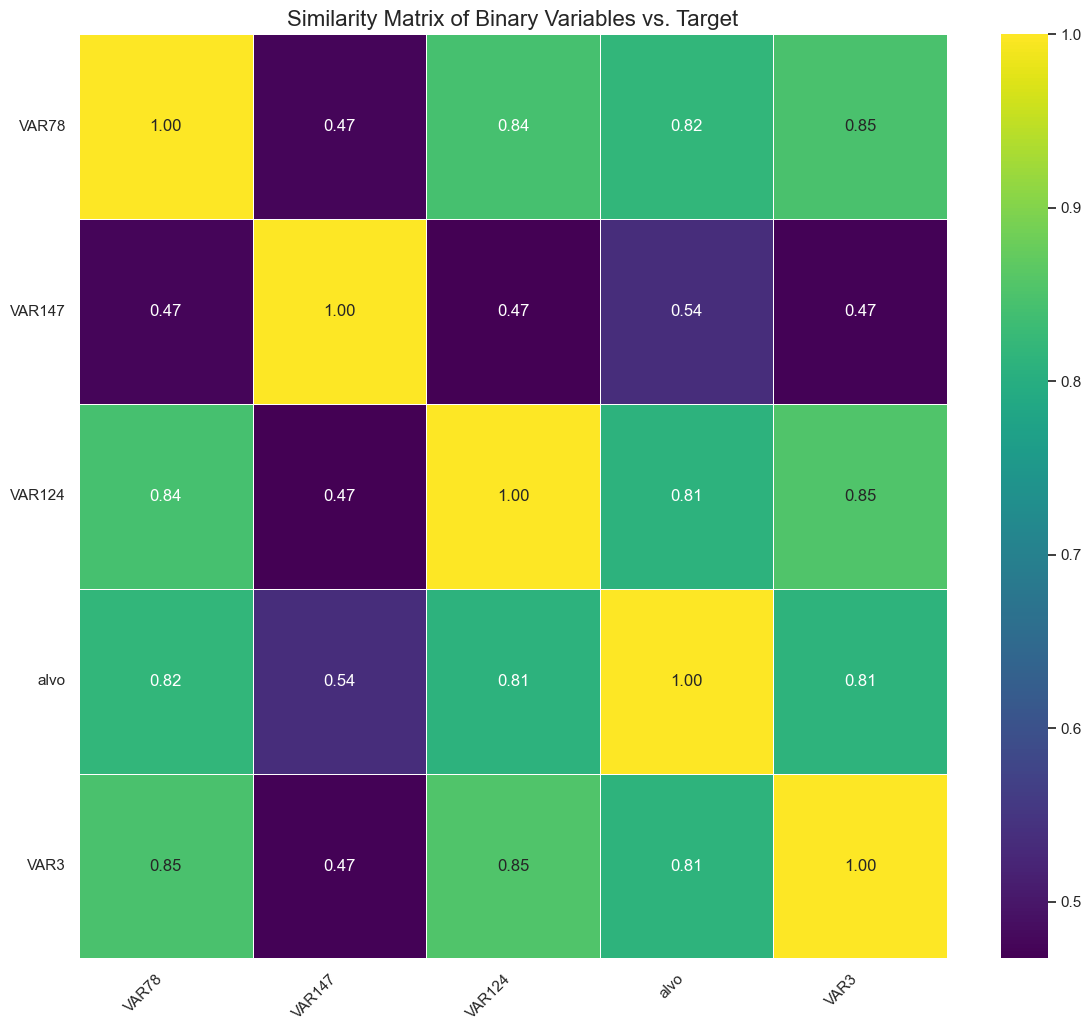

In [25]:
# Analyze similarity between binary variables

# Select only the binary columns for this analysis
analysis_cols = list(set(binary_cols_prio + ['alvo']))
print(f"Analyzing similarity for {len(analysis_cols)} columns, including the 'alvo' target.")

# Select the relevant columns for this analysis from the main dataframe
similarity_df = data_frame[analysis_cols]

# Initialize an empty DataFrame to store the similarity scores
similarity_matrix = pd.DataFrame(index=analysis_cols, columns=analysis_cols, dtype=float)

# Calculate the simple matching coefficient for each pair of columns
for col1, col2 in combinations(analysis_cols, 2):
    # The simple matching coefficient is the proportion of matching values
    similarity = (similarity_df[col1] == similarity_df[col2]).mean()
    similarity_matrix.loc[col1, col2] = similarity
    similarity_matrix.loc[col2, col1] = similarity

# Fill the diagonal with 1s, as a column is always 100% similar to itself
np.fill_diagonal(similarity_matrix.values, 1.0)

# --- Visualize the matrix as a heatmap ---
print("\n--- Heatmap of Binary Variable Similarity (including Target) ---")
plt.figure(figsize=(14, 12))

# Create the heatmap
sns.heatmap(
    similarity_matrix, 
    annot=True,          # Show the similarity values on the map
    cmap='viridis',      # Color scheme
    fmt='.2f',           # Format numbers to 2 decimal places
    linewidths=.5        # Add lines between cells for better readability
)

plt.title('Similarity Matrix of Binary Variables vs. Target', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate labels for better fit
plt.yticks(rotation=0)
plt.show()

Devido à semelhança constantemente acima de 80%, mantemos apenas VAR147.

In [26]:
data_frame.drop(columns=['VAR78', 'VAR3', 'VAR124'], inplace=True)

In [27]:
data_frame.shape

(47732, 138)

## Baixa Cardinalidade

Com o uso do qcut, deixamos de executar a célula abaixo.

In [28]:
# def is_uniform_division(column):
#     """
#     Checks if a column's unique values form a uniform division of the [0, 1] interval.
#     """
#     unique_vals = pd.Series(column.dropna().unique()).sort_values().reset_index(drop=True)
#     if len(unique_vals) < 2:
#         return False
#     n_groups = len(unique_vals)
#     ideal_pattern = np.linspace(0, 1, n_groups)
#     return np.allclose(unique_vals, ideal_pattern)


# if 'data_frame' not in locals() or 'low_cardinality_categorical' not in locals():
#     print("Error: Required variables ('data_frame', 'low_cardinality_categorical') not found. Please run previous cells.")
# else:
#     # --- Initialization ---
#     discarded_cols = []
#     clear_categorical_cols = []
#     possible_discrete_float_cols = []

#     # --- Classification Loop (Now using the pre-filtered dictionary) ---
#     for col, n_unique in low_cardinality_categorical.items():
#         # Robustness Check: Ensure the column still exists after prior cleaning steps
#         if col not in data_frame.columns:
#             continue

#         dtype = data_frame[col].dtype

#         # 2. Check for clear categorical columns
#         if pd.api.types.is_string_dtype(dtype):
#             clear_categorical_cols.append(col)
#             continue
        
#         if pd.api.types.is_numeric_dtype(dtype) and is_uniform_division(data_frame[col]):
#             clear_categorical_cols.append(col)
#             continue

#         # 3. If it's not a string or a uniform pattern, it's a 'possible discrete float'
#         if pd.api.types.is_numeric_dtype(dtype):
#             possible_discrete_float_cols.append(col)

#     # --- Reporting Results ---
#     print("--- Column Classification Results (from low_cardinality_categorical list) ---")
    
#     print(f"\n[2] Clear Categoricals (string or uniform division pattern): {len(clear_categorical_cols)} columns")
#     print(clear_categorical_cols)

#     print(f"\n[3] Possible Discrete Floats (low cardinality numeric): {len(possible_discrete_float_cols)} columns")
#     print(possible_discrete_float_cols)

In [29]:
# --- Configuration Thresholds ---
ID_UNIQUENESS_THRESHOLD = 0.95
LOW_CARDINALITY_THRESHOLD = 5

# --- Initialization ---
identifier_cols = []
binary_cols = []
low_cardinality_categorical = {}
other_cols = []

total_rows = len(data_frame)

# --- Classification Loop ---
for col in data_frame.columns:
    n_unique = data_frame[col].nunique()
    unique_ratio = n_unique / total_rows

    if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
        identifier_cols.append(col)
    elif n_unique == 2:
        binary_cols.append(col)
    elif n_unique <= LOW_CARDINALITY_THRESHOLD:
        low_cardinality_categorical[col] = n_unique
    else:
        # Captures any column that doesn't fit the criteria above
        other_cols.append(col)

# --- Reporting Results ---
print("--- Identifier Columns ---")
print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
print(identifier_cols)

print("\n--- Binary Columns ---")
print(f"Found {len(binary_cols)} columns with 2 unique values.")
print(binary_cols)

print("\n--- Low Cardinality Categorical Columns (<= 5 unique values) ---")
print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
print(sorted_low_cardinality)

print("\n--- High Cardinality / Continuous ---")
print(f"Found {len(other_cols)} columns that did not fit other categories.")
print(other_cols)

--- Identifier Columns ---
Found 0 columns with >= 95.0% unique values.
[]

--- Binary Columns ---
Found 2 columns with 2 unique values.
['alvo', 'VAR147']

--- Low Cardinality Categorical Columns (<= 5 unique values) ---
Found 132 columns for inspection.
{'VAR2': 3, 'VAR142': 3, 'VAR33_qcut': 3, 'VAR36_qcut': 3, 'VAR48_qcut': 3, 'VAR66_qcut': 3, 'VAR69_qcut': 3, 'VAR91_qcut': 3, 'VAR99_qcut': 3, 'VAR101_qcut': 3, 'VAR128_qcut': 3, 'VAR129_qcut': 3, 'VAR41': 4, 'VAR43': 4, 'VAR51': 4, 'VAR167': 4, 'VAR180': 4, 'VAR185': 4, 'VAR1_qcut': 4, 'VAR10_qcut': 4, 'VAR11_qcut': 4, 'VAR132_qcut': 4, 'VAR141_qcut': 4, 'VAR154_qcut': 4, 'VAR159_qcut': 4, 'VAR172_qcut': 4, 'VAR184_qcut': 4, 'VAR186_qcut': 4, 'VAR197_qcut': 4, 'VAR62': 5, 'VAR93': 5, 'VAR100': 5, 'VAR103': 5, 'VAR112': 5, 'VAR113': 5, 'VAR199': 5, 'vlr_financiado_qcut': 5, 'VAR5_qcut': 5, 'VAR7_qcut': 5, 'VAR8_qcut': 5, 'VAR9_qcut': 5, 'VAR12_qcut': 5, 'VAR13_qcut': 5, 'VAR15_qcut': 5, 'VAR16_qcut': 5, 'VAR18_qcut': 5, 'VAR22_qcut':

In [30]:
low_cardinality_cols = list(sorted_low_cardinality.keys())

# Print the resulting list to verify
print("--- Lista criada com os nomes das colunas de baixa cardinalidade ---")
print(low_cardinality_cols)

--- Lista criada com os nomes das colunas de baixa cardinalidade ---
['VAR2', 'VAR142', 'VAR33_qcut', 'VAR36_qcut', 'VAR48_qcut', 'VAR66_qcut', 'VAR69_qcut', 'VAR91_qcut', 'VAR99_qcut', 'VAR101_qcut', 'VAR128_qcut', 'VAR129_qcut', 'VAR41', 'VAR43', 'VAR51', 'VAR167', 'VAR180', 'VAR185', 'VAR1_qcut', 'VAR10_qcut', 'VAR11_qcut', 'VAR132_qcut', 'VAR141_qcut', 'VAR154_qcut', 'VAR159_qcut', 'VAR172_qcut', 'VAR184_qcut', 'VAR186_qcut', 'VAR197_qcut', 'VAR62', 'VAR93', 'VAR100', 'VAR103', 'VAR112', 'VAR113', 'VAR199', 'vlr_financiado_qcut', 'VAR5_qcut', 'VAR7_qcut', 'VAR8_qcut', 'VAR9_qcut', 'VAR12_qcut', 'VAR13_qcut', 'VAR15_qcut', 'VAR16_qcut', 'VAR18_qcut', 'VAR22_qcut', 'VAR23_qcut', 'VAR25_qcut', 'VAR26_qcut', 'VAR28_qcut', 'VAR29_qcut', 'VAR30_qcut', 'VAR32_qcut', 'VAR34_qcut', 'VAR35_qcut', 'VAR38_qcut', 'VAR40_qcut', 'VAR42_qcut', 'VAR44_qcut', 'VAR45_qcut', 'VAR46_qcut', 'VAR50_qcut', 'VAR54_qcut', 'VAR56_qcut', 'VAR57_qcut', 'VAR59_qcut', 'VAR61_qcut', 'VAR64_qcut', 'VAR65_qcut', 'V

In [31]:
# Create a dictionary to hold the results
unique_values_dict = {}

for col in low_cardinality_cols:
    # Get unique values and convert to a list for cleaner display
    unique_vals = data_frame[col].dropna().unique().tolist()
    
    # Sort the list to make patterns (like numeric sequences) more obvious
    try:
        unique_vals.sort()
    except TypeError:
        pass
        
    unique_values_dict[col] = unique_vals

# For a clean, table-like output, we can create a pandas Series from the dictionary
unique_values_series = pd.Series(unique_values_dict, name="Unique Values")

# Set display options to ensure the full list is visible
with pd.option_context('display.max_colwidth', None):
    display(unique_values_series)

VAR2                     [0.0, 0.5, 1.0]
VAR142                   [0.0, 0.5, 1.0]
VAR33_qcut               [0.0, 1.0, 2.0]
VAR36_qcut               [0.0, 1.0, 2.0]
VAR48_qcut               [0.0, 1.0, 2.0]
                         ...            
VAR191_qcut    [0.0, 1.0, 2.0, 3.0, 4.0]
VAR193_qcut    [0.0, 1.0, 2.0, 3.0, 4.0]
VAR194_qcut    [0.0, 1.0, 2.0, 3.0, 4.0]
VAR196_qcut    [0.0, 1.0, 2.0, 3.0, 4.0]
VAR198_qcut    [0.0, 1.0, 2.0, 3.0, 4.0]
Name: Unique Values, Length: 132, dtype: object

In [32]:
def cramers_v(x, y):
    """
    Calculates Cramér's V statistic for categorical-categorical association.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    # Check for division by zero
    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0:
        return 1.0 # Perfect association if one dimension is 1
        
    return np.sqrt(phi2corr / denominator)

Analyzing association for 132 discrete columns...

--- Heatmap of Association (Cramér's V) ---


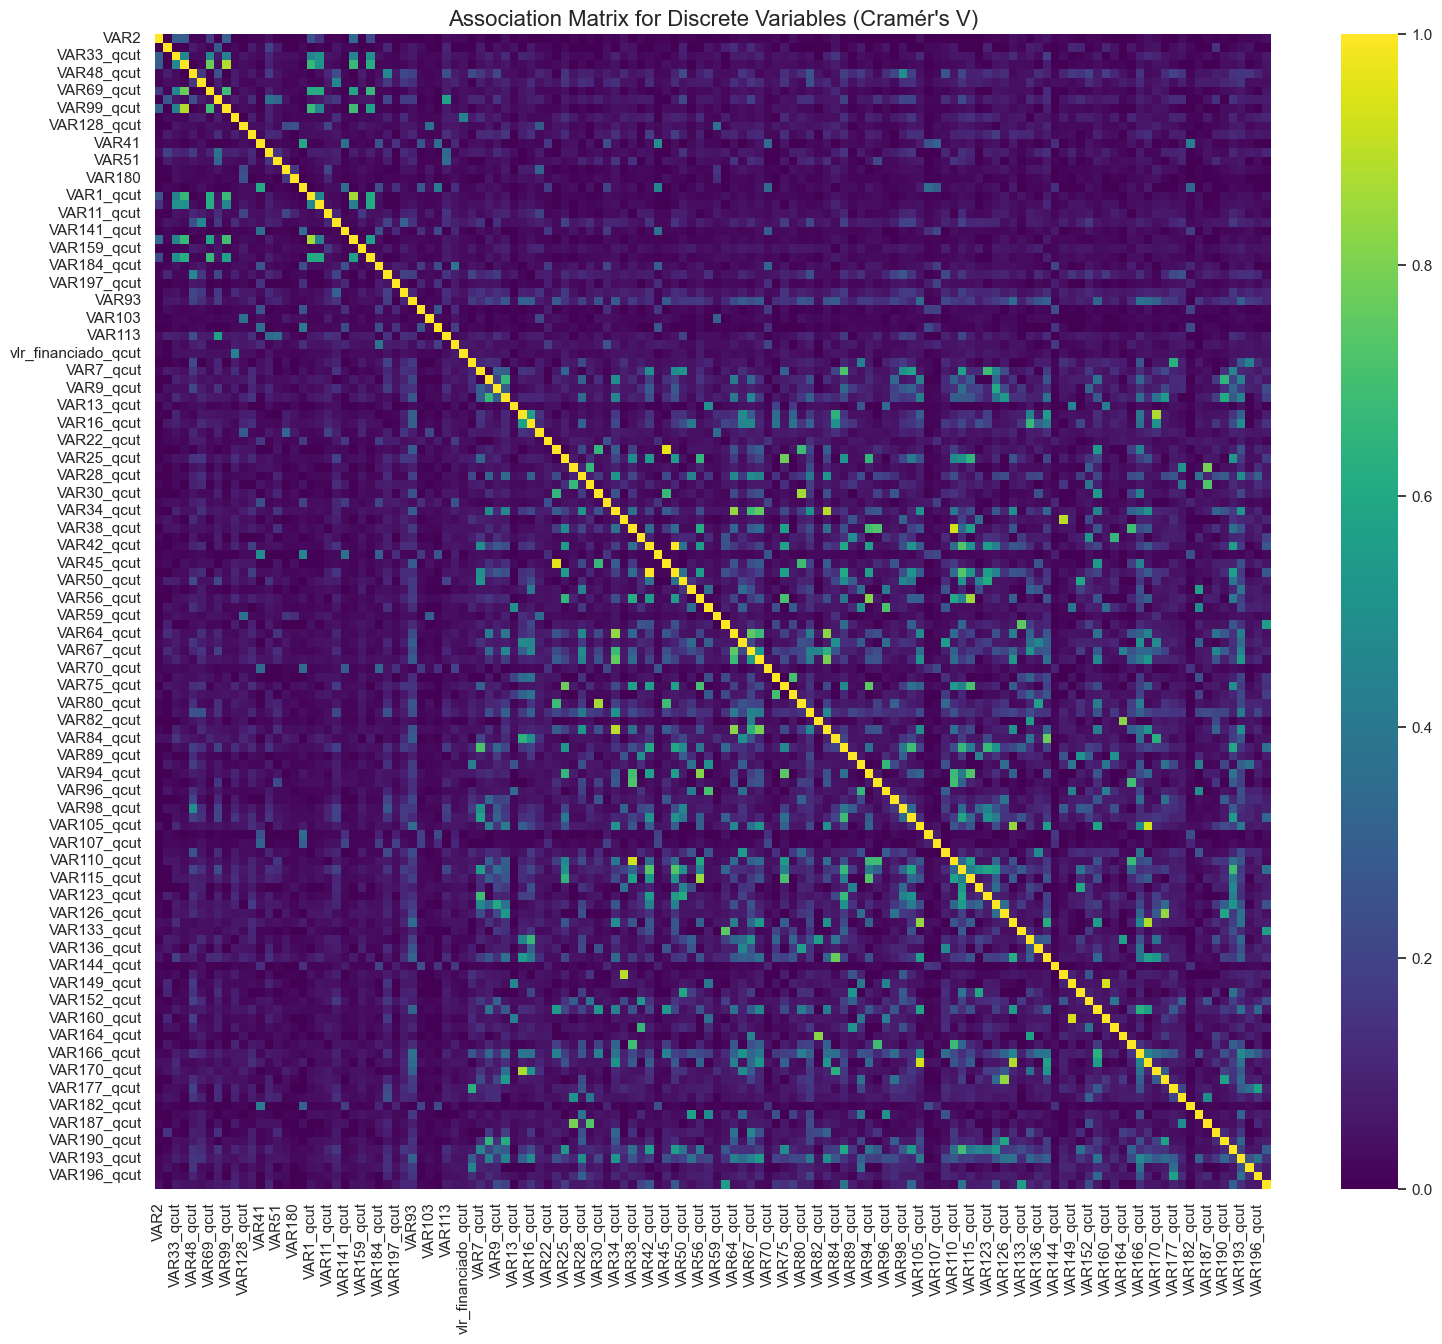

In [33]:
# Remove the target variable if it's present
if 'alvo' in low_cardinality_cols:
    low_cardinality_cols.remove('alvo')

print(f"Analyzing association for {len(low_cardinality_cols)} discrete columns...")

# 2. Calculate the Cramér's V association matrix
cramers_matrix = pd.DataFrame(index=low_cardinality_cols, columns=low_cardinality_cols, dtype=float)

for col1, col2 in combinations(low_cardinality_cols, 2):
    # Ensure columns exist in the dataframe before calculating
    if col1 in data_frame.columns and col2 in data_frame.columns:
        v_score = cramers_v(data_frame[col1], data_frame[col2])
        cramers_matrix.loc[col1, col2] = v_score
        cramers_matrix.loc[col2, col1] = v_score

np.fill_diagonal(cramers_matrix.values, 1.0)

# 3. Visualize the matrix as a heatmap
print("\n--- Heatmap of Association (Cramér's V) ---")
plt.figure(figsize=(18, 15))

sns.heatmap(
    cramers_matrix.fillna(0), # Fill any potential NaNs for plotting
    annot=False,
    cmap='viridis'
)

plt.title("Association Matrix for Discrete Variables (Cramér's V)", fontsize=16)
plt.show()

In [34]:
REDUNDANCY_THRESHOLD = 0.60
print(f"--- Identifying Redundant Variables (Threshold: Cramér's V > {REDUNDANCY_THRESHOLD}) ---")

# --- 2. Calculate Association with Target ('alvo') ---
target_association = {}
print("\nCalculating association of each variable with the target 'alvo'...")
for col in low_cardinality_cols:
    # The same cramers_v function from the previous cell is used here.
    # Ensure the function is defined or copy it to this cell if needed.
    association_score = cramers_v(data_frame[col], data_frame['alvo'])
    target_association[col] = association_score
    print(f"  - '{col}' vs 'alvo': {association_score:.4f}")

# --- 3. Identify Columns to Drop ---
# Use a set to store columns to drop, avoiding duplicates.
cols_to_drop = set()

print("\nChecking for redundant pairs...")
# Iterate through the upper triangle of the matrix to check each pair once
for i in range(len(cramers_matrix.columns)):
    for j in range(i + 1, len(cramers_matrix.columns)):
        col1 = cramers_matrix.columns[i]
        col2 = cramers_matrix.columns[j]
        
        # Skip if one of the columns is already marked for removal
        if col1 in cols_to_drop or col2 in cols_to_drop:
            continue

        v_score = cramers_matrix.loc[col1, col2]
        
        # Check if the association exceeds the threshold
        if v_score > REDUNDANCY_THRESHOLD:
            print(f"  - Found redundant pair: ('{col1}', '{col2}') with score {v_score:.4f}")
            
            # Decision rule: drop the one with the weaker association to the target
            assoc1 = target_association.get(col1, 0)
            assoc2 = target_association.get(col2, 0)
            
            if assoc1 >= assoc2:
                # Drop col2, as it has a weaker (or equal) association with the target
                cols_to_drop.add(col2)
                print(f"    - Decision: Keep '{col1}' (target assoc: {assoc1:.4f}), Drop '{col2}' (target assoc: {assoc2:.4f})")
            else:
                # Drop col1, as it has a weaker association with the target
                cols_to_drop.add(col1)
                print(f"    - Decision: Keep '{col2}' (target assoc: {assoc2:.4f}), Drop '{col1}' (target assoc: {assoc1:.4f})")

# --- 4. Final Report and Removal ---
print("\n" + "#"*50)
print("### Redundancy Analysis Complete ###")
print("#"*50)

if cols_to_drop:
    final_drop_list = list(cols_to_drop)
    print(f"Identified {len(final_drop_list)} columns for removal:")
    print(final_drop_list)
    
    data_frame.drop(columns=final_drop_list, inplace=True)
    print("\nColumns successfully dropped from the DataFrame.")
    
else:
    print("No redundant columns found above the threshold.")

--- Identifying Redundant Variables (Threshold: Cramér's V > 0.6) ---

Calculating association of each variable with the target 'alvo'...
  - 'VAR2' vs 'alvo': 0.0490
  - 'VAR142' vs 'alvo': 0.0272
  - 'VAR33_qcut' vs 'alvo': 0.0712
  - 'VAR36_qcut' vs 'alvo': 0.0800
  - 'VAR48_qcut' vs 'alvo': 0.0194
  - 'VAR66_qcut' vs 'alvo': 0.0214
  - 'VAR69_qcut' vs 'alvo': 0.0826
  - 'VAR91_qcut' vs 'alvo': 0.0000
  - 'VAR99_qcut' vs 'alvo': 0.0854
  - 'VAR101_qcut' vs 'alvo': 0.0692
  - 'VAR128_qcut' vs 'alvo': 0.0441
  - 'VAR129_qcut' vs 'alvo': 0.0234
  - 'VAR41' vs 'alvo': 0.0088
  - 'VAR43' vs 'alvo': 0.1088
  - 'VAR51' vs 'alvo': 0.0000
  - 'VAR167' vs 'alvo': 0.0255
  - 'VAR180' vs 'alvo': 0.0398
  - 'VAR185' vs 'alvo': 0.0000
  - 'VAR1_qcut' vs 'alvo': 0.0696
  - 'VAR10_qcut' vs 'alvo': 0.0529
  - 'VAR11_qcut' vs 'alvo': 0.0191
  - 'VAR132_qcut' vs 'alvo': 0.0154
  - 'VAR141_qcut' vs 'alvo': 0.0000
  - 'VAR154_qcut' vs 'alvo': 0.0706
  - 'VAR159_qcut' vs 'alvo': 0.0000
  - 'VAR172_qcut' 

In [35]:
data_frame.head()

,mes_ref,alvo,VAR2,VAR41,VAR43,VAR51,VAR52,VAR62,VAR93,VAR100,...,VAR183_qcut,VAR184_qcut,VAR186_qcut,VAR187_qcut,VAR189_qcut,VAR193_qcut,VAR194_qcut,VAR196_qcut,VAR197_qcut,VAR198_qcut
0,202307,0.0,0.0,ALTA,0.0,NaN,F,0.25,0.25,LONGE,...,1.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,2.0,1.0
1,202307,0.0,0.0,ALTISSIMA,NaN,NaN,NaN,0.00,NaN,PROXIMO,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2,202307,0.0,0.0,ALTA,NaN,NaN,A,0.00,1.00,LONGE,...,NaN,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,NaN
3,202307,0.0,0.0,ALTA,NaN,NaN,A,0.00,NaN,PROXIMO,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,202307,0.0,0.0,MEDIA,NaN,0.0,NaN,0.00,0.75,PROXIMO,...,NaN,3.0,NaN,NaN,1.0,4.0,NaN,NaN,1.0,NaN


In [36]:
def calculate_woe_iv(data, feature, target):
    """
    Calculates WoE and IV for a given feature and binary target.
    """
    # Create a contingency table
    crosstab = pd.crosstab(data[feature], data[target], normalize='all')
    
    # Get total distribution of events (1) and non-events (0)
    total_events = data[target].sum()
    total_non_events = len(data) - total_events
    
    # Calculate WoE and IV
    woe_iv_table = pd.crosstab(data[feature], data[target])
    woe_iv_table.rename(columns={0: 'non_events', 1: 'events'}, inplace=True)
    
    # Add 0.5 to avoid division by zero
    woe_iv_table.replace(0, 0.5, inplace=True)
    
    woe_iv_table['dist_non_events'] = woe_iv_table['non_events'] / total_non_events
    woe_iv_table['dist_events'] = woe_iv_table['events'] / total_events
    
    woe_iv_table['woe'] = np.log(woe_iv_table['dist_non_events'] / woe_iv_table['dist_events'])
    
    woe_iv_table['iv'] = (woe_iv_table['dist_non_events'] - woe_iv_table['dist_events']) * woe_iv_table['woe']
    
    iv = woe_iv_table['iv'].sum()
    
    return woe_iv_table, iv

print("WoE and IV helper function defined.")

WoE and IV helper function defined.


In [37]:
# --- Configuration Thresholds ---
ID_UNIQUENESS_THRESHOLD = 0.95
LOW_CARDINALITY_THRESHOLD = 5

# --- Initialization ---
identifier_cols = []
binary_cols = []
low_cardinality_categorical = {}
other_cols = []

total_rows = len(data_frame)

# --- Classification Loop ---
for col in data_frame.columns:
    n_unique = data_frame[col].nunique()
    unique_ratio = n_unique / total_rows

    if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
        identifier_cols.append(col)
    elif n_unique == 2:
        binary_cols.append(col)
    elif n_unique <= LOW_CARDINALITY_THRESHOLD:
        low_cardinality_categorical[col] = n_unique
    else:
        # Captures any column that doesn't fit the criteria above
        other_cols.append(col)

# --- Reporting Results ---
print("--- Identifier Columns ---")
print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
print(identifier_cols)

print("\n--- Binary Columns ---")
print(f"Found {len(binary_cols)} columns with 2 unique values.")
print(binary_cols)

print("\n--- Low Cardinality Categorical Columns (<= 5 unique values) ---")
print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
print(sorted_low_cardinality)

print("\n--- High Cardinality / Continuous ---")
print(f"Found {len(other_cols)} columns that did not fit other categories.")
print(other_cols)

--- Identifier Columns ---
Found 0 columns with >= 95.0% unique values.
[]

--- Binary Columns ---
Found 2 columns with 2 unique values.
['alvo', 'VAR147']

--- Low Cardinality Categorical Columns (<= 5 unique values) ---
Found 88 columns for inspection.
{'VAR2': 3, 'VAR142': 3, 'VAR33_qcut': 3, 'VAR48_qcut': 3, 'VAR66_qcut': 3, 'VAR91_qcut': 3, 'VAR99_qcut': 3, 'VAR101_qcut': 3, 'VAR128_qcut': 3, 'VAR129_qcut': 3, 'VAR41': 4, 'VAR43': 4, 'VAR51': 4, 'VAR167': 4, 'VAR180': 4, 'VAR11_qcut': 4, 'VAR132_qcut': 4, 'VAR141_qcut': 4, 'VAR159_qcut': 4, 'VAR172_qcut': 4, 'VAR184_qcut': 4, 'VAR186_qcut': 4, 'VAR197_qcut': 4, 'VAR62': 5, 'VAR93': 5, 'VAR100': 5, 'VAR103': 5, 'VAR112': 5, 'VAR113': 5, 'VAR199': 5, 'vlr_financiado_qcut': 5, 'VAR7_qcut': 5, 'VAR9_qcut': 5, 'VAR12_qcut': 5, 'VAR13_qcut': 5, 'VAR16_qcut': 5, 'VAR18_qcut': 5, 'VAR22_qcut': 5, 'VAR28_qcut': 5, 'VAR32_qcut': 5, 'VAR35_qcut': 5, 'VAR40_qcut': 5, 'VAR44_qcut': 5, 'VAR45_qcut': 5, 'VAR50_qcut': 5, 'VAR54_qcut': 5, 'VAR57_q

In [38]:
low_cardinality_cols = list(sorted_low_cardinality.keys())

# Print the resulting list to verify
print("--- Lista criada com os nomes das colunas de baixa cardinalidade ---")
print(low_cardinality_cols)

--- Lista criada com os nomes das colunas de baixa cardinalidade ---
['VAR2', 'VAR142', 'VAR33_qcut', 'VAR48_qcut', 'VAR66_qcut', 'VAR91_qcut', 'VAR99_qcut', 'VAR101_qcut', 'VAR128_qcut', 'VAR129_qcut', 'VAR41', 'VAR43', 'VAR51', 'VAR167', 'VAR180', 'VAR11_qcut', 'VAR132_qcut', 'VAR141_qcut', 'VAR159_qcut', 'VAR172_qcut', 'VAR184_qcut', 'VAR186_qcut', 'VAR197_qcut', 'VAR62', 'VAR93', 'VAR100', 'VAR103', 'VAR112', 'VAR113', 'VAR199', 'vlr_financiado_qcut', 'VAR7_qcut', 'VAR9_qcut', 'VAR12_qcut', 'VAR13_qcut', 'VAR16_qcut', 'VAR18_qcut', 'VAR22_qcut', 'VAR28_qcut', 'VAR32_qcut', 'VAR35_qcut', 'VAR40_qcut', 'VAR44_qcut', 'VAR45_qcut', 'VAR50_qcut', 'VAR54_qcut', 'VAR57_qcut', 'VAR59_qcut', 'VAR65_qcut', 'VAR68_qcut', 'VAR70_qcut', 'VAR79_qcut', 'VAR81_qcut', 'VAR89_qcut', 'VAR90_qcut', 'VAR94_qcut', 'VAR95_qcut', 'VAR97_qcut', 'VAR98_qcut', 'VAR102_qcut', 'VAR105_qcut', 'VAR106_qcut', 'VAR107_qcut', 'VAR108_qcut', 'VAR111_qcut', 'VAR116_qcut', 'VAR125_qcut', 'VAR126_qcut', 'VAR133_qcut', 

In [39]:
#  Calculate Information Value (IV) for all discrete variables

iv_scores = {}

print("\n--- Calculating Information Value (IV) for each discrete variable ---")

for col in low_cardinality_cols:
    try:
        woe_table, iv = calculate_woe_iv(data_frame, col, 'alvo')
        iv_scores[col] = iv
    except Exception as e:
        print(f"Could not calculate IV for '{col}'. Error: {e}")
        iv_scores[col] = 0.0

# Convert results to a pandas Series and sort by IV (higher is better)
iv_series = pd.Series(iv_scores, name="IV")
iv_series.sort_values(ascending=False, inplace=True)

print("Features ranked by Information Value (higher IV suggests stronger predictive power):")
display(iv_series.map('{:.4f}'.format))


--- Calculating Information Value (IV) for each discrete variable ---
Features ranked by Information Value (higher IV suggests stronger predictive power):


vlr_financiado_qcut    0.3706
VAR138_qcut            0.1430
VAR101_qcut            0.1029
VAR99_qcut             0.0896
VAR93                  0.0725
                        ...  
VAR51                  0.0013
VAR159_qcut            0.0011
VAR144_qcut            0.0010
VAR106_qcut            0.0006
VAR141_qcut            0.0006
Name: IV, Length: 88, dtype: object

In [40]:
IV_THRESHOLD = 0.05
keep_list = ['mes_ref']

low_iv_features = iv_series[iv_series < IV_THRESHOLD].index.tolist()

features_to_remove = [col for col in low_iv_features if col not in keep_list]

protected_cols = [col for col in low_iv_features if col in keep_list]
if protected_cols:
    print(f"Protected columns (exempted from removal): {protected_cols}")

if features_to_remove:
    print(f"\nOriginal DataFrame shape: {data_frame.shape}")
    print(f"Found {len(features_to_remove)} features with IV < {IV_THRESHOLD} to remove (after exemption).")
    print(features_to_remove[:10], "..." if len(features_to_remove) > 10 else "")
    
    data_frame.drop(columns=features_to_remove, inplace=True)
    
    print("\nFeatures removed successfully.")
    print(f"New DataFrame shape: {data_frame.shape}")
else:
    print(f"\nNo features to remove after applying the IV threshold and keep_list.")


Original DataFrame shape: (47732, 94)
Found 74 features with IV < 0.05 to remove (after exemption).
['VAR189_qcut', 'VAR142', 'VAR128_qcut', 'VAR149_qcut', 'VAR2', 'VAR81_qcut', 'VAR184_qcut', 'VAR164_qcut', 'VAR68_qcut', 'VAR102_qcut'] ...

Features removed successfully.
New DataFrame shape: (47732, 20)


In [41]:
# --- Configuration Thresholds ---
ID_UNIQUENESS_THRESHOLD = 0.95
LOW_CARDINALITY_THRESHOLD = 5

# --- Initialization ---
identifier_cols = []
binary_cols = []
low_cardinality_categorical = {}
other_cols = []

total_rows = len(data_frame)

# --- Classification Loop ---
for col in data_frame.columns:
    n_unique = data_frame[col].nunique()
    unique_ratio = n_unique / total_rows

    if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
        identifier_cols.append(col)
    elif n_unique == 2:
        binary_cols.append(col)
    elif n_unique <= LOW_CARDINALITY_THRESHOLD:
        low_cardinality_categorical[col] = n_unique
    else:
        # Captures any column that doesn't fit the criteria above
        other_cols.append(col)

# --- Reporting Results ---
print("--- Identifier Columns ---")
print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
print(identifier_cols)

print("\n--- Binary Columns ---")
print(f"Found {len(binary_cols)} columns with 2 unique values.")
print(binary_cols)

print("\n--- Low Cardinality Categorical Columns (<= 5 unique values) ---")
print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
print(sorted_low_cardinality)

print("\n--- High Cardinality / Continuous ---")
print(f"Found {len(other_cols)} columns that did not fit other categories.")
print(other_cols)

--- Identifier Columns ---
Found 0 columns with >= 95.0% unique values.
[]

--- Binary Columns ---
Found 2 columns with 2 unique values.
['alvo', 'VAR147']

--- Low Cardinality Categorical Columns (<= 5 unique values) ---
Found 14 columns for inspection.
{'VAR33_qcut': 3, 'VAR99_qcut': 3, 'VAR101_qcut': 3, 'VAR43': 4, 'VAR172_qcut': 4, 'VAR93': 5, 'VAR199': 5, 'vlr_financiado_qcut': 5, 'VAR13_qcut': 5, 'VAR105_qcut': 5, 'VAR138_qcut': 5, 'VAR166_qcut': 5, 'VAR170_qcut': 5, 'VAR193_qcut': 5}

--- High Cardinality / Continuous ---
Found 4 columns that did not fit other categories.
['mes_ref', 'VAR52', 'VAR119', 'VAR175']


## Alta Cardinalidade / Contínuas

In [42]:
data_frame['VAR52']

0          F
1        NaN
2          A
3          A
4        NaN
        ... 
47727    NaN
47728      B
47729      A
47730      A
47731      E
Name: VAR52, Length: 47732, dtype: object

In [43]:
data_frame['VAR119']

0          C
1        NaN
2          L
3        NaN
4          M
        ... 
47727    NaN
47728      Y
47729      Z
47730    NaN
47731      B
Name: VAR119, Length: 47732, dtype: object

In [44]:
data_frame['VAR175']

0          A
1        NaN
2          A
3          A
4        NaN
        ... 
47727    NaN
47728      A
47729      G
47730      A
47731      H
Name: VAR175, Length: 47732, dtype: object

As 3 variáveis são categorias de alta cardinalidade que não conseguiram ser agrupadas. As análises seguintes então perdem sentido.

In [45]:
# # Calculate Kolmogorov-Smirnov (KS) statistic for feature importance

# # Ensure the required variables exist
# if 'data_frame' not in locals():
#     print("Error: 'data_frame' not found. Please run previous cells.")
# else:
#     ks_results = {}
#     print("--- Calculating KS Statistic for each 'other' column against 'alvo' ---")

#     for col in other_cols:
#         # Check if column exists and is numeric before proceeding
#         if col in data_frame.columns and pd.api.types.is_numeric_dtype(data_frame[col].dtype):
#             # Separate the feature's values for each target class
#             sample_0 = data_frame[data_frame['alvo'] == 0][col].dropna()
#             sample_1 = data_frame[data_frame['alvo'] == 1][col].dropna()
            
#             # Perform the two-sample KS test
#             # We are interested in the 'statistic' value
#             ks_statistic, p_value = ks_2samp(sample_0, sample_1)
#             ks_results[col] = ks_statistic
#         else:
#             print(f"Skipping '{col}': not found or not a numeric type.")
            
#     # Convert results to a pandas Series and sort by KS statistic (higher is better)
#     ks_series = pd.Series(ks_results, name="KS Statistic")
#     ks_series.sort_values(ascending=False, inplace=True)

#     print("\nFeatures ranked by KS Statistic (higher value means better separation):")
#     display(ks_series.map('{:.2%}'.format))

In [46]:
# # Visual analysis of 'other_cols' for distribution and outliers

# if 'data_frame' not in locals():
#     print("Error: 'data_frame' not found. Please run previous cells.")
# else:
#     print("\n--- Generating plots for 'other' variables ---")

#     for col in other_cols:
#         if col in data_frame.columns and pd.api.types.is_numeric_dtype(data_frame[col].dtype):
#             fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#             fig.suptitle(f'Analysis for: {col}', fontsize=16)

#             # Subplot 1: Histogram/KDE separated by target class
#             sns.histplot(data=data_frame, x=col, hue='alvo', kde=True, ax=axes[0], palette='viridis')
#             axes[0].set_title('Distribution by Target Class')

#             # Subplot 2: Box Plot separated by target class
#             sns.boxplot(data=data_frame, x='alvo', y=col, ax=axes[1], palette='viridis')
#             axes[1].set_title('Box Plot by Target Class (for Outlier Detection)')
            
#             plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#             plt.show()
#         else:
#             # This handles non-numeric columns like 'VAR4' and 'VAR18' if they are strings
#             if col in data_frame.columns:
#                  print(f"\n--- Skipping plot for non-numeric column: '{col}' ---")

In [47]:
# #Remove features with low predictive power (KS < 10%)

# # Check if the required variables from the previous step exist
# if 'data_frame' not in locals() or 'ks_series' not in locals():
#     print("Error: Required variables ('data_frame', 'ks_series') not found. Please run the KS analysis cell first.")
# else:
#     KS_THRESHOLD = 0.10
    
#     # 1. Identify features with KS below the threshold
#     low_ks_features = ks_series[ks_series < KS_THRESHOLD].index.tolist()
    
#     if low_ks_features:
#         print(f"Original DataFrame shape: {data_frame.shape}")
#         # The :.0% formats the float 0.10 into "10%" for the print statement
#         print(f"\nFound {len(low_ks_features)} features with KS < {KS_THRESHOLD:.0%} to remove.")
#         print(low_ks_features)
        
#         # 2. Remove the identified features
#         data_frame.drop(columns=low_ks_features, inplace=True)
        
#         print("\nFeatures removed successfully.")
#         print(f"New DataFrame shape: {data_frame.shape}")
#     else:
#         print(f"No features found with KS < {KS_THRESHOLD:.0%}. No columns were removed.")


In [48]:
# if 'data_frame' not in locals():
#     print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
# else:
#     # --- Configuration Thresholds ---
#     ID_UNIQUENESS_THRESHOLD = 0.95
#     LOW_CARDINALITY_THRESHOLD = 50

#     # --- Initialization ---
#     identifier_cols = []
#     binary_cols = []
#     low_cardinality_categorical = {}
#     other_cols = []

#     total_rows = len(data_frame)

#     # --- Classification Loop ---
#     for col in data_frame.columns:
#         n_unique = data_frame[col].nunique()
#         unique_ratio = n_unique / total_rows

#         if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
#             identifier_cols.append(col)
#         elif n_unique == 2:
#             binary_cols.append(col)
#         elif n_unique <= LOW_CARDINALITY_THRESHOLD:
#             low_cardinality_categorical[col] = n_unique
#         else:
#             # Captures any column that doesn't fit the criteria above
#             other_cols.append(col)

#     # --- Reporting Results ---
#     print("--- Identifier Columns ---")
#     print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
#     print(identifier_cols)

#     print("\n--- Binary Columns ---")
#     print(f"Found {len(binary_cols)} columns with 2 unique values.")
#     print(binary_cols)

#     print("\n--- Low Cardinality Categorical Columns (<= {LOW_CARDINALITY_THRESHOLD} unique values) ---")
#     print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
#     sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
#     print(sorted_low_cardinality)

#     print("\n--- Other Columns (High Cardinality / Continuous) ---")
#     print(f"Found {len(other_cols)} columns that did not fit other categories.")
#     print(other_cols)

In [49]:
# Create a copy of the list to avoid modifying the original
analysis_cols = other_cols.copy()

# Exclude 'mes_ref' as requested
if 'mes_ref' in analysis_cols:
    analysis_cols.remove('mes_ref')
    print(f"INFO: A coluna 'mes_ref' foi excluída da análise.")

# --- 2. Analysis and Display Loop ---
for col in analysis_cols:
    if col not in data_frame.columns:
        print(f"\nAviso: A coluna '{col}' não foi encontrada no DataFrame. Pulando.")
        continue

    print(f"\n\n" + "="*50)
    print(f"Tabela de Frequência Percentual para a Coluna: '{col}'")
    print("="*50)
    
    # Calculate value counts as percentages
    freq_series = data_frame[col].value_counts(normalize=True) * 100
    
    # Convert the Series to a DataFrame for a clean table display
    freq_df = freq_series.reset_index()
    freq_df.columns = ['Categoria', 'Percentual (%)']
    
    # Display the styled table in the notebook
    # .style.format() is used for clean percentage formatting
    display(freq_df.style.format({'Percentual (%)': '{:.2f}%'}).hide(axis='index'))

INFO: A coluna 'mes_ref' foi excluída da análise.


Tabela de Frequência Percentual para a Coluna: 'VAR52'


Categoria,Percentual (%)
A,58.45%
B,22.05%
C,8.11%
D,3.99%
E,2.30%
F,1.56%
K,1.50%
G,0.86%
H,0.64%
I,0.37%




Tabela de Frequência Percentual para a Coluna: 'VAR119'


Categoria,Percentual (%)
Y,13.12%
D,8.57%
M,7.57%
C,7.27%
L,6.77%
E,6.64%
N,5.48%
F,5.38%
K,5.31%
H,5.17%




Tabela de Frequência Percentual para a Coluna: 'VAR175'


Categoria,Percentual (%)
A,76.94%
B,5.75%
C,4.59%
D,3.73%
E,2.25%
K,1.91%
F,1.60%
G,1.24%
H,0.91%
I,0.62%


### VAR52

In [50]:
categories_to_keep = ['A', 'B', 'C']
new_column_name = 'VAR52_grouped'

print(f"--- Processing VAR52 ---")
print(f"Keeping categories: {categories_to_keep}")
print(f"Grouping all others into 'OUTROS'")

# --- 2. Apply the Transformation ---
# Use np.where for an efficient conditional replacement.
condition = data_frame['VAR52'].isin(categories_to_keep)
data_frame[new_column_name] = np.where(condition, data_frame['VAR52'], 'OUTROS')

print(f"New column '{new_column_name}' created successfully.")

# --- 3. Verification ---
print("\n--- Value Counts for the new column ---")
print(data_frame[new_column_name].value_counts())

# --- 4. Remove the Original Column ---
print(f"\n--- Removing original column: 'VAR52' ---")
data_frame.drop(columns=['VAR52'], inplace=True)
print("'VAR52' has been removed from the DataFrame.")

# --- 5. Final Check ---
# Display the head of the DataFrame to show the new column is present
# and the old one is gone.
print("\n--- DataFrame Head after Transformation ---")
display(data_frame.head())

--- Processing VAR52 ---
Keeping categories: ['A', 'B', 'C']
Grouping all others into 'OUTROS'
New column 'VAR52_grouped' created successfully.

--- Value Counts for the new column ---
VAR52_grouped
A         19139
OUTROS    18717
B          7219
C          2657
Name: count, dtype: int64

--- Removing original column: 'VAR52' ---
'VAR52' has been removed from the DataFrame.

--- DataFrame Head after Transformation ---


,mes_ref,alvo,VAR43,VAR93,VAR119,VAR147,VAR175,VAR199,vlr_financiado_qcut,VAR13_qcut,VAR33_qcut,VAR99_qcut,VAR101_qcut,VAR105_qcut,VAR138_qcut,VAR166_qcut,VAR170_qcut,VAR172_qcut,VAR193_qcut,VAR52_grouped
0,202307,0.0,0.0,0.25,C,1.0,A,SUDESTE,2.0,NaN,0.0,0.0,2.0,NaN,0.0,1.0,2.0,2.0,0.0,OUTROS
1,202307,0.0,NaN,NaN,NaN,0.0,NaN,NORTE,2.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,OUTROS
2,202307,0.0,NaN,1.00,L,0.0,A,SUL,3.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,A
3,202307,0.0,NaN,NaN,NaN,0.0,A,NORTE,2.0,NaN,2.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,A
4,202307,0.0,NaN,0.75,M,0.0,NaN,NORDESTE,1.0,NaN,0.0,0.0,1.0,NaN,NaN,2.0,NaN,0.0,4.0,OUTROS


In [51]:
iv = calculate_woe_iv(data_frame, 'VAR52_grouped', 'alvo')
print(iv)

(alvo           non_events  events  dist_non_events  dist_events       woe  \
VAR52_grouped                                                               
A                   18430     709         0.402877     0.356999  0.120898   
B                    6903     316         0.150898     0.159114 -0.053013   
C                    2518     139         0.055043     0.069990 -0.240236   
OUTROS              17895     822         0.391182     0.413897 -0.056446   

alvo                 iv  
VAR52_grouped            
A              0.005547  
B              0.000436  
C              0.003591  
OUTROS         0.001282  , np.float64(0.010854994235036846))


In [52]:
data_frame.drop(columns=['VAR52_grouped'], inplace=True)

### VAR175

In [53]:
category_to_keep = 'A'
new_column_name = 'VAR175_grouped'

print(f"--- Processing VAR175 ---")
print(f"Transforming into '{category_to_keep}' vs 'OUTROS'")

# --- 2. Apply the Transformation ---
# Use np.where for a simple and efficient binary condition.
# The logic is: WHERE the value in 'VAR175' IS 'A', keep 'A', OTHERWISE replace it with 'OUTROS'.
condition = data_frame['VAR175'] == category_to_keep
data_frame[new_column_name] = np.where(condition, category_to_keep, 'OUTROS')

print(f"\nNew column '{new_column_name}' created successfully.")

# --- 3. Verification ---
print("\n--- Value Counts for the new column ---")
print(data_frame[new_column_name].value_counts())

# --- 4. Remove the Original Column ---
print(f"\n--- Removing original column: 'VAR175' ---")
data_frame.drop(columns=['VAR175'], inplace=True)
print("'VAR175' has been removed from the DataFrame.")

# --- 5. Final Check ---
# Display the head of the DataFrame to show the new column is present
# and the old one is gone.
print("\n--- DataFrame Head after Transformation ---")
display(data_frame.head())

--- Processing VAR175 ---
Transforming into 'A' vs 'OUTROS'

New column 'VAR175_grouped' created successfully.

--- Value Counts for the new column ---
VAR175_grouped
A         25272
OUTROS    22460
Name: count, dtype: int64

--- Removing original column: 'VAR175' ---
'VAR175' has been removed from the DataFrame.

--- DataFrame Head after Transformation ---


,mes_ref,alvo,VAR43,VAR93,VAR119,VAR147,VAR199,vlr_financiado_qcut,VAR13_qcut,VAR33_qcut,VAR99_qcut,VAR101_qcut,VAR105_qcut,VAR138_qcut,VAR166_qcut,VAR170_qcut,VAR172_qcut,VAR193_qcut,VAR175_grouped
0,202307,0.0,0.0,0.25,C,1.0,SUDESTE,2.0,NaN,0.0,0.0,2.0,NaN,0.0,1.0,2.0,2.0,0.0,A
1,202307,0.0,NaN,NaN,NaN,0.0,NORTE,2.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,OUTROS
2,202307,0.0,NaN,1.00,L,0.0,SUL,3.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,A
3,202307,0.0,NaN,NaN,NaN,0.0,NORTE,2.0,NaN,2.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,A
4,202307,0.0,NaN,0.75,M,0.0,NORDESTE,1.0,NaN,0.0,0.0,1.0,NaN,NaN,2.0,NaN,0.0,4.0,OUTROS


In [54]:
crosstab_perc = pd.crosstab(data_frame['VAR175_grouped'], data_frame['alvo'], normalize='index') * 100
display(crosstab_perc.map('{:.2f}%'.format))

alvo,0.0,1.0
VAR175_grouped,,
A,95.45%,4.55%
OUTROS,96.27%,3.73%


In [55]:
data_frame.drop(columns=['VAR175_grouped'], inplace=True)

### VAR119

In [56]:
iv = calculate_woe_iv(data_frame, 'VAR119', 'alvo')
print(iv)

(alvo    non_events  events  dist_non_events  dist_events       woe        iv
VAR119                                                                      
A              178      10         0.003891     0.005035 -0.257783  0.000295
B             1199      34         0.026210     0.017120  0.425901  0.003871
C             1769      41         0.038670     0.020645  0.627616  0.011313
D             2088      47         0.045643     0.023666  0.656833  0.014436
E             1622      32         0.035457     0.016113  0.788698  0.015256
F             1310      30         0.028636     0.015106  0.639603  0.008654
G             1128      20         0.024658     0.010070  0.895487  0.013063
H             1261      27         0.027565     0.013595  0.706842  0.009875
I              710      12         0.015520     0.006042  0.943377  0.008941
J             1133      19         0.024767     0.009567  0.951203  0.014459
K             1286      37         0.028112     0.018630  0.411392  0.00390

In [57]:
data_frame.drop(columns=['VAR119'], inplace=True)

## Extra

In [58]:
data_frame.head()

,mes_ref,alvo,VAR43,VAR93,VAR147,VAR199,vlr_financiado_qcut,VAR13_qcut,VAR33_qcut,VAR99_qcut,VAR101_qcut,VAR105_qcut,VAR138_qcut,VAR166_qcut,VAR170_qcut,VAR172_qcut,VAR193_qcut
0,202307,0.0,0.0,0.25,1.0,SUDESTE,2.0,NaN,0.0,0.0,2.0,NaN,0.0,1.0,2.0,2.0,0.0
1,202307,0.0,NaN,NaN,0.0,NORTE,2.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
2,202307,0.0,NaN,1.00,0.0,SUL,3.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
3,202307,0.0,NaN,NaN,0.0,NORTE,2.0,NaN,2.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
4,202307,0.0,NaN,0.75,0.0,NORDESTE,1.0,NaN,0.0,0.0,1.0,NaN,NaN,2.0,NaN,0.0,4.0


A coluna 'VAR199' utiliza de informações relacionadas com a região. Como não queremos introduzir vieses no nosso modelo, retiramos a coluna.

In [59]:
data_frame.drop(columns=['VAR199'], inplace=True)

## Análise Temporal

In [60]:
data_frame.head()

,mes_ref,alvo,VAR43,VAR93,VAR147,vlr_financiado_qcut,VAR13_qcut,VAR33_qcut,VAR99_qcut,VAR101_qcut,VAR105_qcut,VAR138_qcut,VAR166_qcut,VAR170_qcut,VAR172_qcut,VAR193_qcut
0,202307,0.0,0.0,0.25,1.0,2.0,NaN,0.0,0.0,2.0,NaN,0.0,1.0,2.0,2.0,0.0
1,202307,0.0,NaN,NaN,0.0,2.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
2,202307,0.0,NaN,1.00,0.0,3.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
3,202307,0.0,NaN,NaN,0.0,2.0,NaN,2.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
4,202307,0.0,NaN,0.75,0.0,1.0,NaN,0.0,0.0,1.0,NaN,NaN,2.0,NaN,0.0,4.0


In [61]:
# --- Configuration Thresholds ---
ID_UNIQUENESS_THRESHOLD = 0.95
LOW_CARDINALITY_THRESHOLD = 5

# --- Initialization ---
identifier_cols = []
binary_cols = []
low_cardinality_categorical = {}
other_cols = []

total_rows = len(data_frame)

# --- Classification Loop ---
for col in data_frame.columns:
    n_unique = data_frame[col].nunique()
    unique_ratio = n_unique / total_rows

    if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
        identifier_cols.append(col)
    elif n_unique == 2:
        binary_cols.append(col)
    elif n_unique <= LOW_CARDINALITY_THRESHOLD:
        low_cardinality_categorical[col] = n_unique
    else:
        # Captures any column that doesn't fit the criteria above
        other_cols.append(col)

# --- Reporting Results ---
print("--- Identifier Columns ---")
print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
print(identifier_cols)

print("\n--- Binary Columns ---")
print(f"Found {len(binary_cols)} columns with 2 unique values.")
print(binary_cols)

print("\n--- Low Cardinality Categorical Columns (<= 5 unique values) ---")
print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
print(sorted_low_cardinality)

print("\n--- High Cardinality / Continuous ---")
print(f"Found {len(other_cols)} columns that did not fit other categories.")
print(other_cols)

--- Identifier Columns ---
Found 0 columns with >= 95.0% unique values.
[]

--- Binary Columns ---
Found 2 columns with 2 unique values.
['alvo', 'VAR147']

--- Low Cardinality Categorical Columns (<= 5 unique values) ---
Found 13 columns for inspection.
{'VAR33_qcut': 3, 'VAR99_qcut': 3, 'VAR101_qcut': 3, 'VAR43': 4, 'VAR172_qcut': 4, 'VAR93': 5, 'vlr_financiado_qcut': 5, 'VAR13_qcut': 5, 'VAR105_qcut': 5, 'VAR138_qcut': 5, 'VAR166_qcut': 5, 'VAR170_qcut': 5, 'VAR193_qcut': 5}

--- High Cardinality / Continuous ---
Found 1 columns that did not fit other categories.
['mes_ref']


--- Default Rate Trend by Month Reference ---


,default_rate,count
mes_ref,,
202307,4.09%,"8,392"
202308,4.30%,"9,533"
202309,3.99%,"8,592"
202310,3.93%,"8,533"
202311,4.23%,"6,484"
202312,4.53%,"6,198"


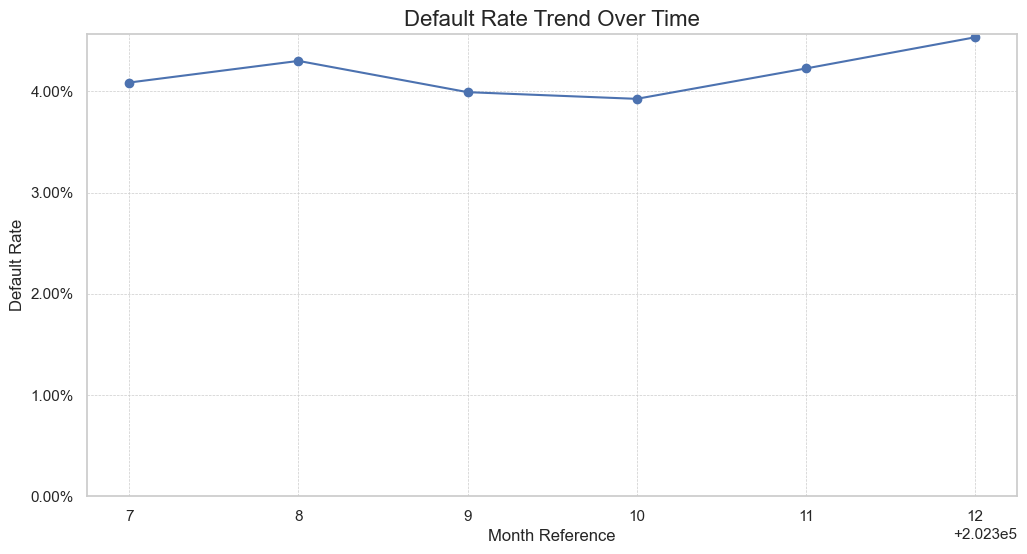

In [62]:
# Analyze and visualize the default rate over time

# Check if the required variables exist
if 'data_frame' not in locals() or 'mes_ref' not in data_frame.columns:
    print("Error: 'data_frame' or the 'mes_ref' column not found. Please run the required cells first.")
else:
    print("--- Default Rate Trend by Month Reference ---")
    
    analysis_df = data_frame.copy()
    
    time_analysis = analysis_df.groupby('mes_ref')['alvo'].agg(['mean', 'count'])
    time_analysis.rename(columns={'mean': 'default_rate'}, inplace=True)
    
    # 4. Display the results in a table
    display(time_analysis.style.format({'default_rate': '{:.2%}', 'count': '{:,}'}))
    
    # 5. Create a line plot to visualize the trend
    plt.figure(figsize=(12, 6))
    ax = time_analysis['default_rate'].plot(kind='line', marker='o', linestyle='-')
    
    plt.title('Default Rate Trend Over Time', fontsize=16)
    plt.ylabel('Default Rate')
    plt.xlabel('Month Reference')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Format the y-axis to show percentages
    from matplotlib.ticker import PercentFormatter
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # Ensure the y-axis starts at 0 for an unbiased perspective
    plt.ylim(bottom=0)
    
    plt.show()

In [63]:
# # Analyze temporal stability for continuous variables

# numerical_features = ['vlr_financiado', 'VAR10', 'VAR184']

# if 'data_frame' not in locals():
#     print("Error: 'data_frame' not found. Please run previous cells.")
# elif not numerical_features:
#     print("The list of numerical features is empty.")
# else:
#     print(f"--- Analyzing Temporal Stability for {len(numerical_features)} Continuous Features ---")

#     for col in numerical_features:
#         if col not in data_frame.columns:
#             print(f"\nWarning: Column '{col}' not found. Skipping.")
#             continue
            
#         # Group by month and calculate key statistics
#         stability_analysis = data_frame.groupby('mes_ref')[col].agg(['mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
#         stability_analysis.rename(columns={'<lambda_0>': 'p25', '<lambda_1>': 'p75'}, inplace=True)
        
#         # Plot the evolution of these statistics over time
#         plt.figure(figsize=(14, 7))
#         stability_analysis.plot(kind='line', marker='o', ax=plt.gca())
        
#         plt.title(f'Temporal Stability of Statistics for: {col}', fontsize=16)
#         plt.ylabel('Statistic Value')
#         plt.xlabel('Month Reference (YYYYMM)')
#         plt.legend(title='Statistic')
#         plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#         plt.show()



--- Analyzing Temporal Stability for 13 Categorical & Binary Features ---


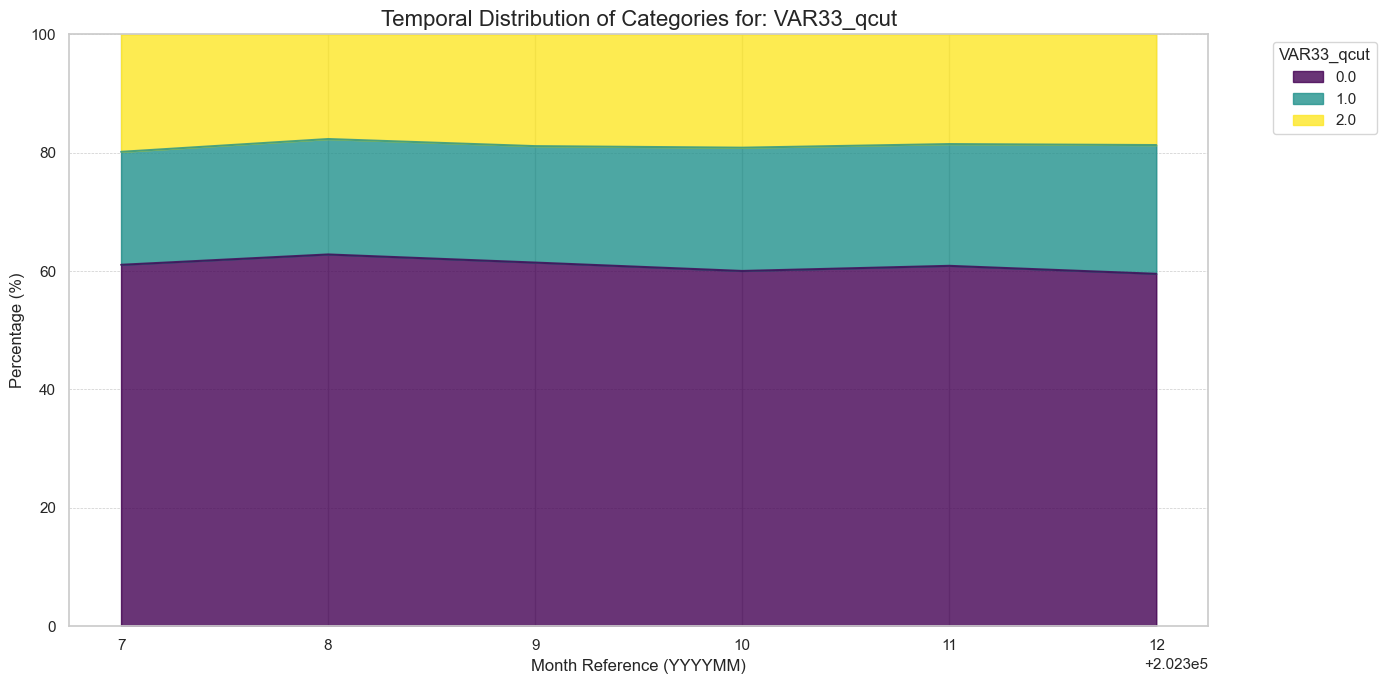

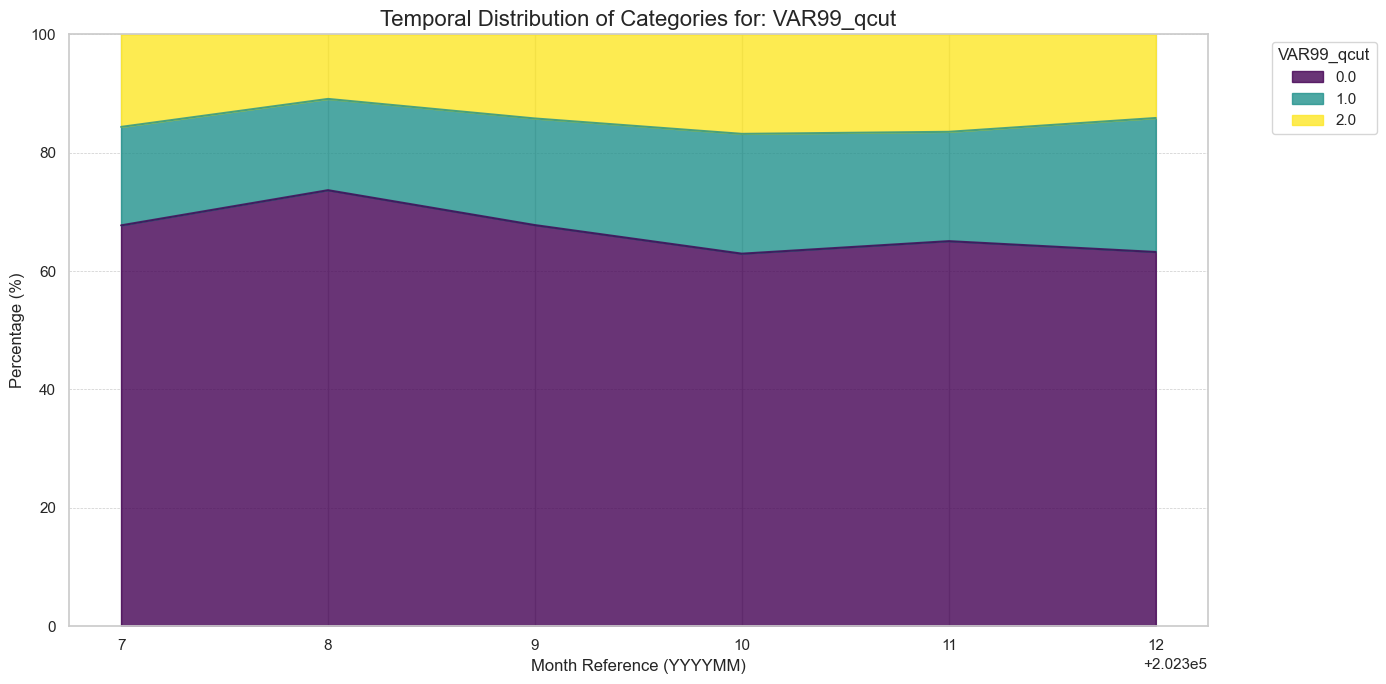

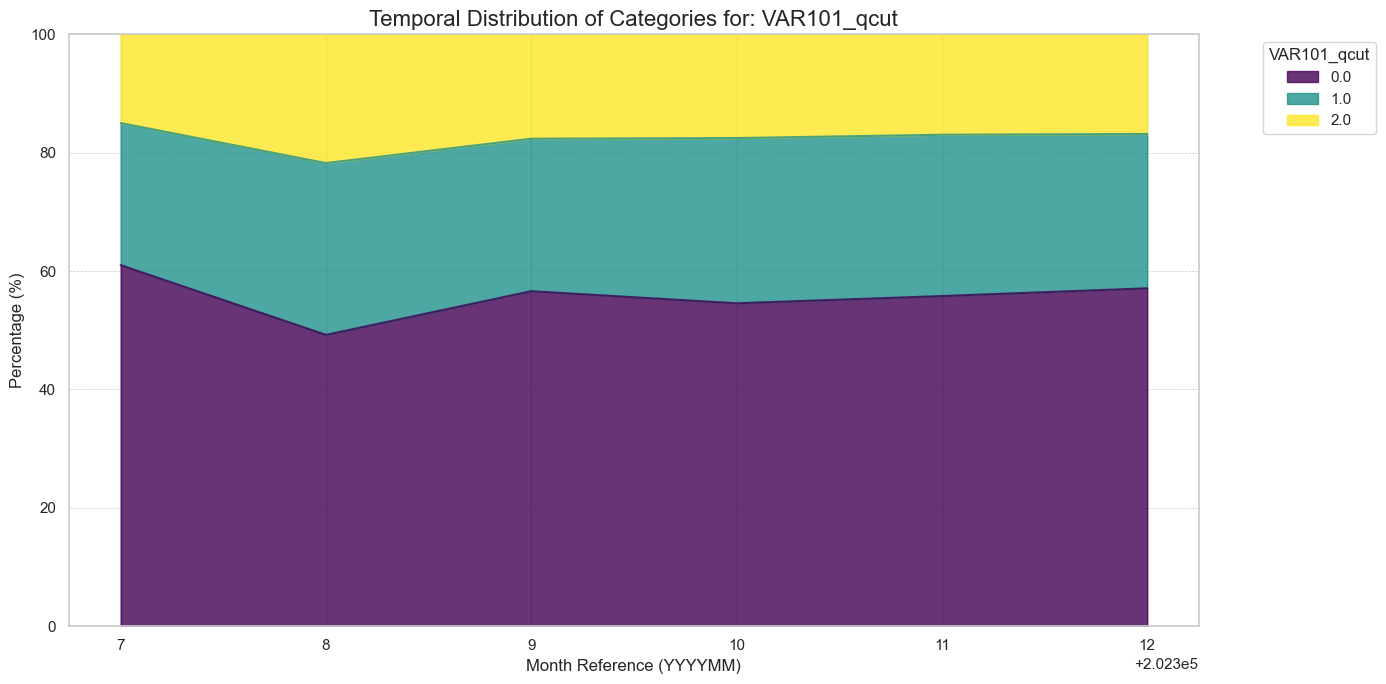

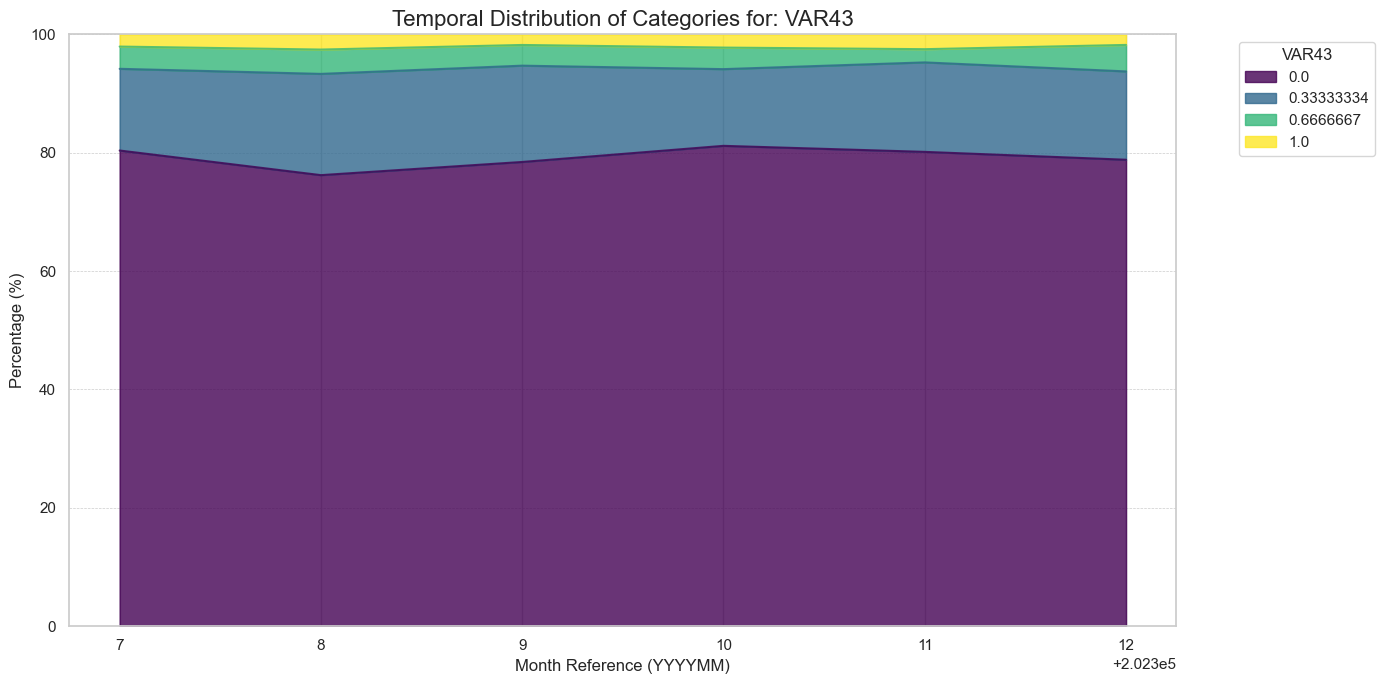

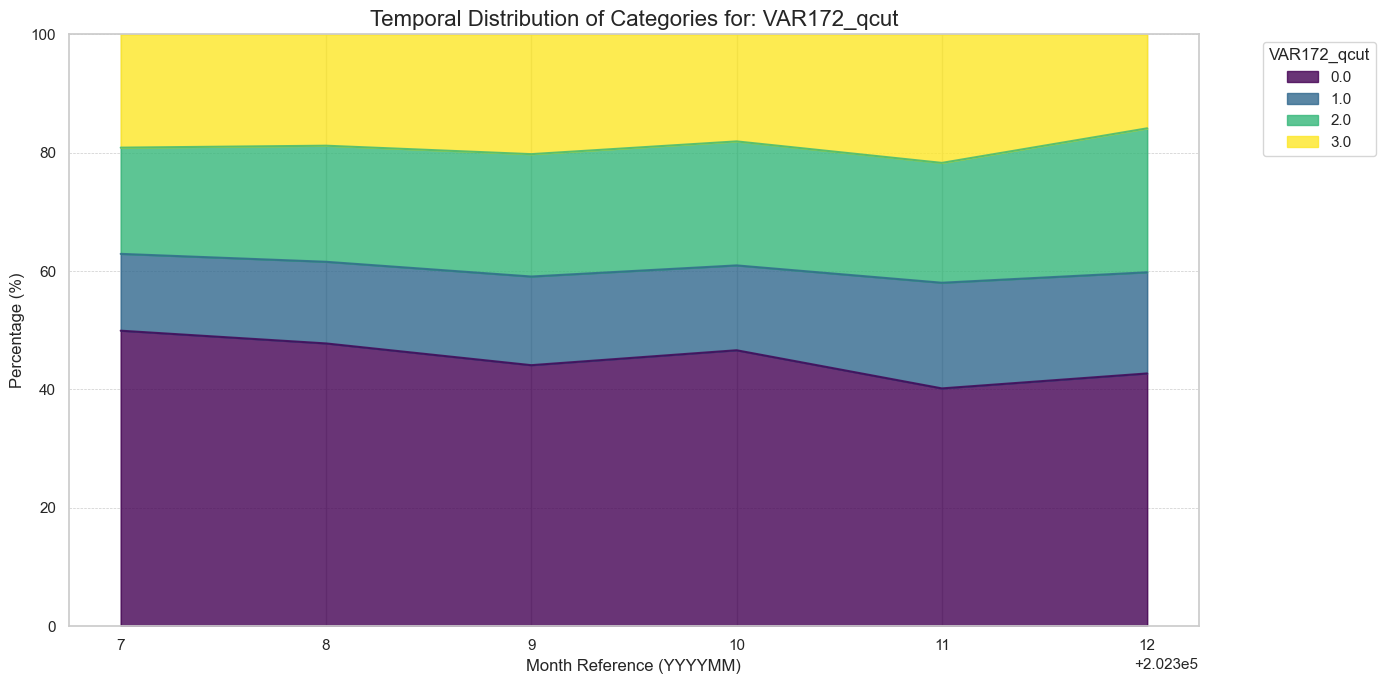

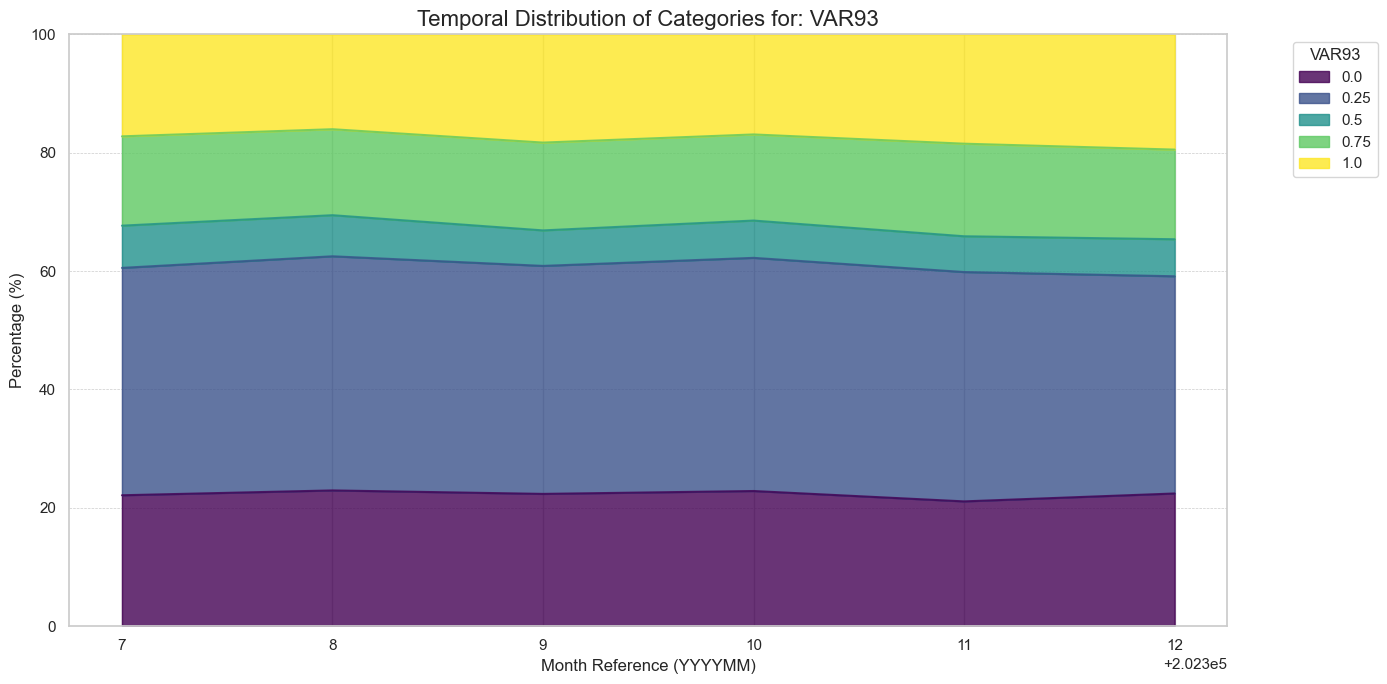

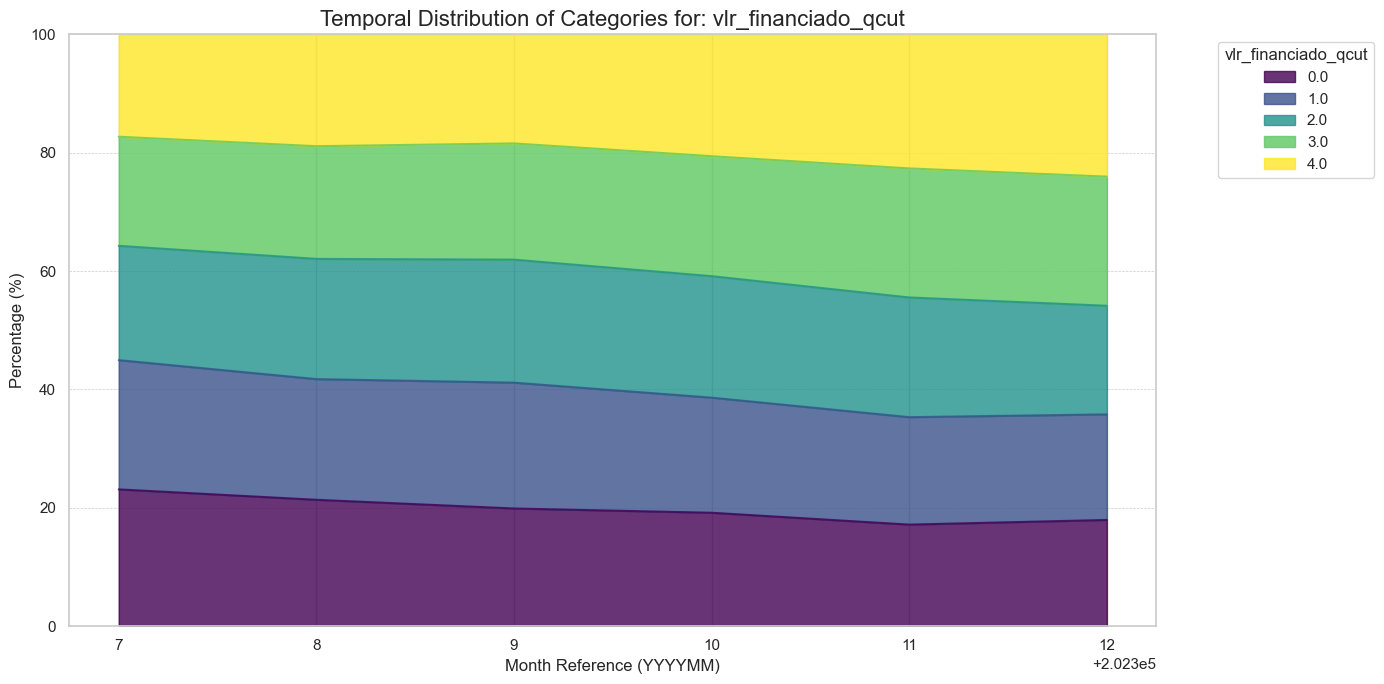

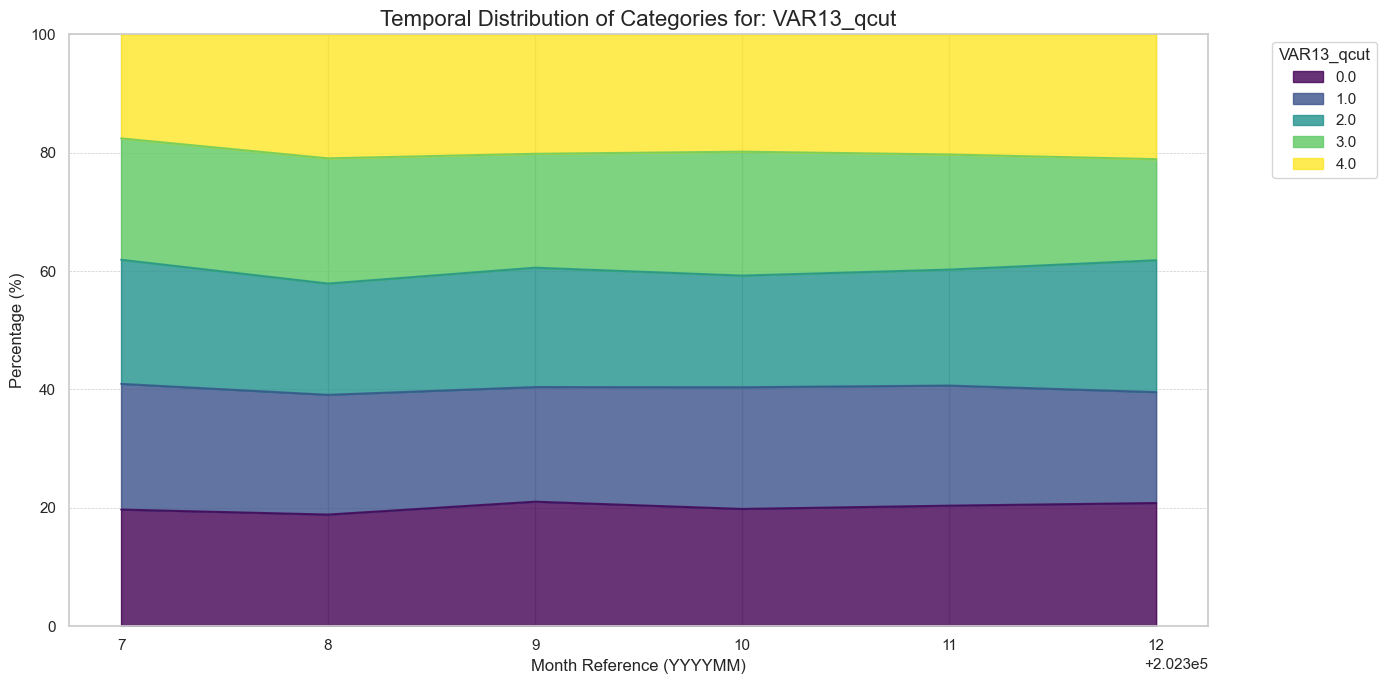

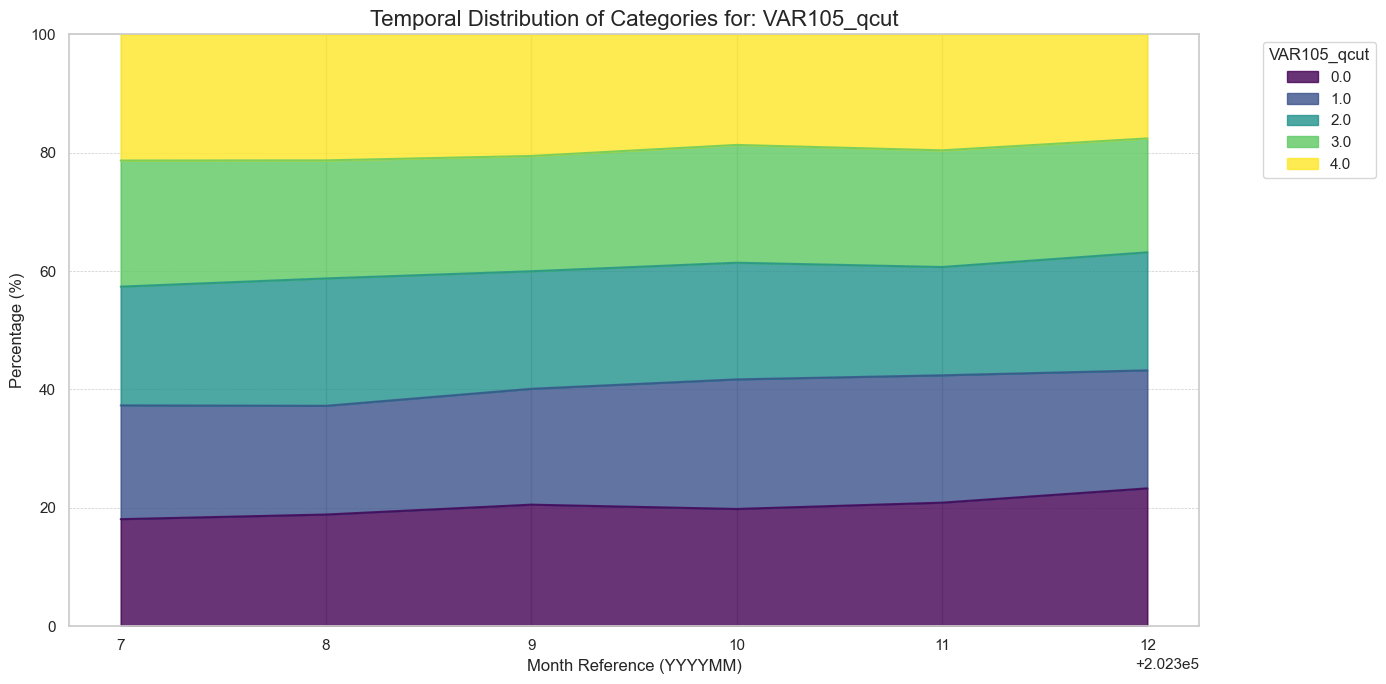

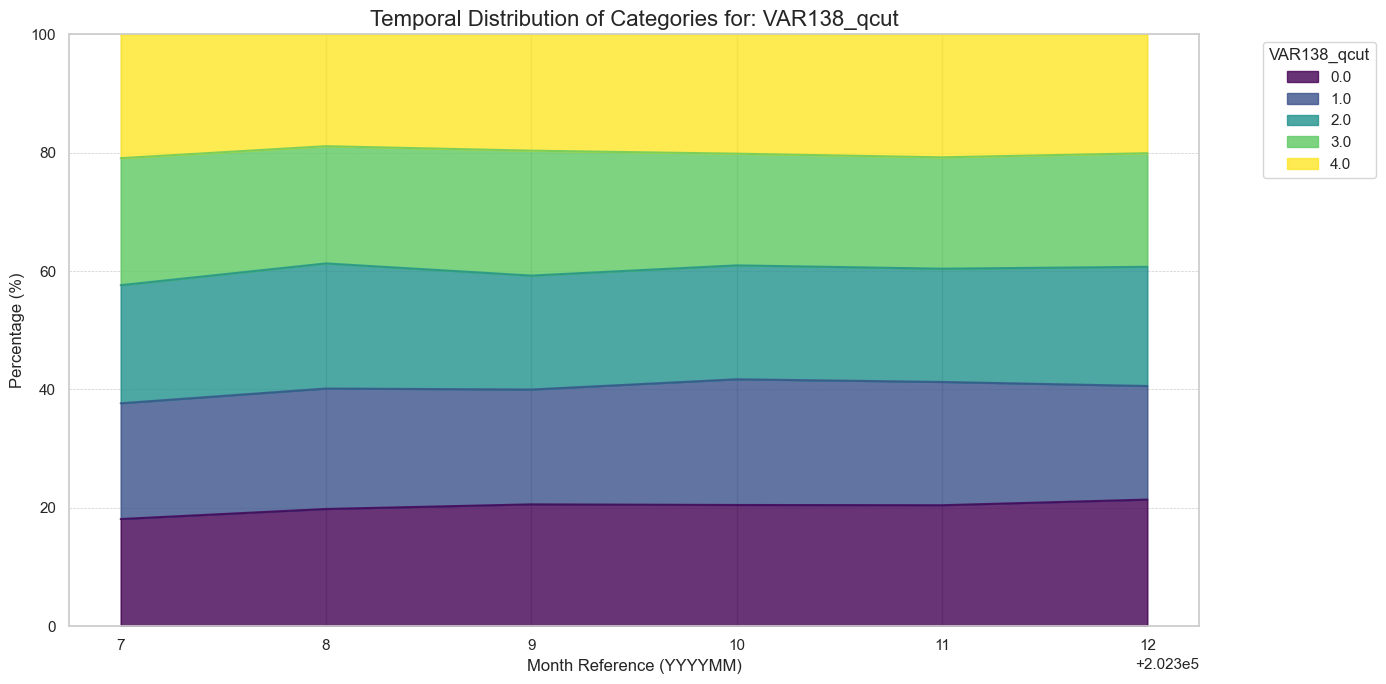

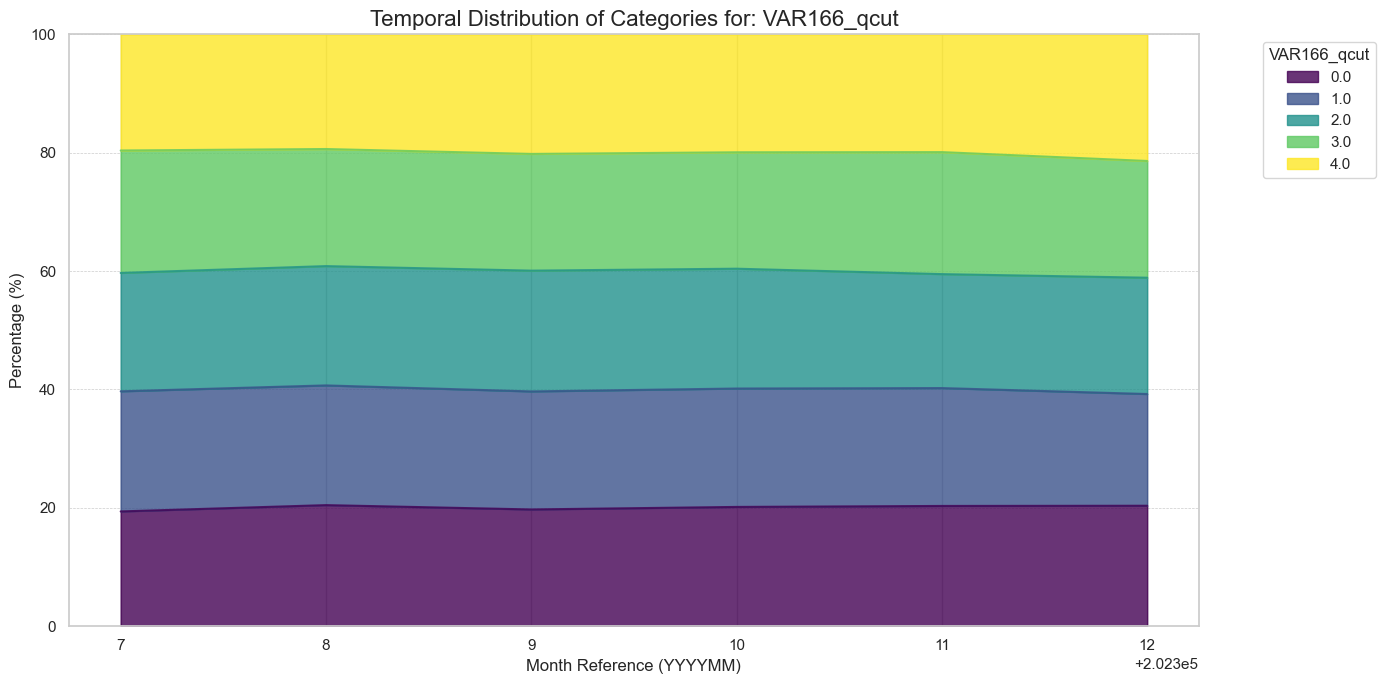

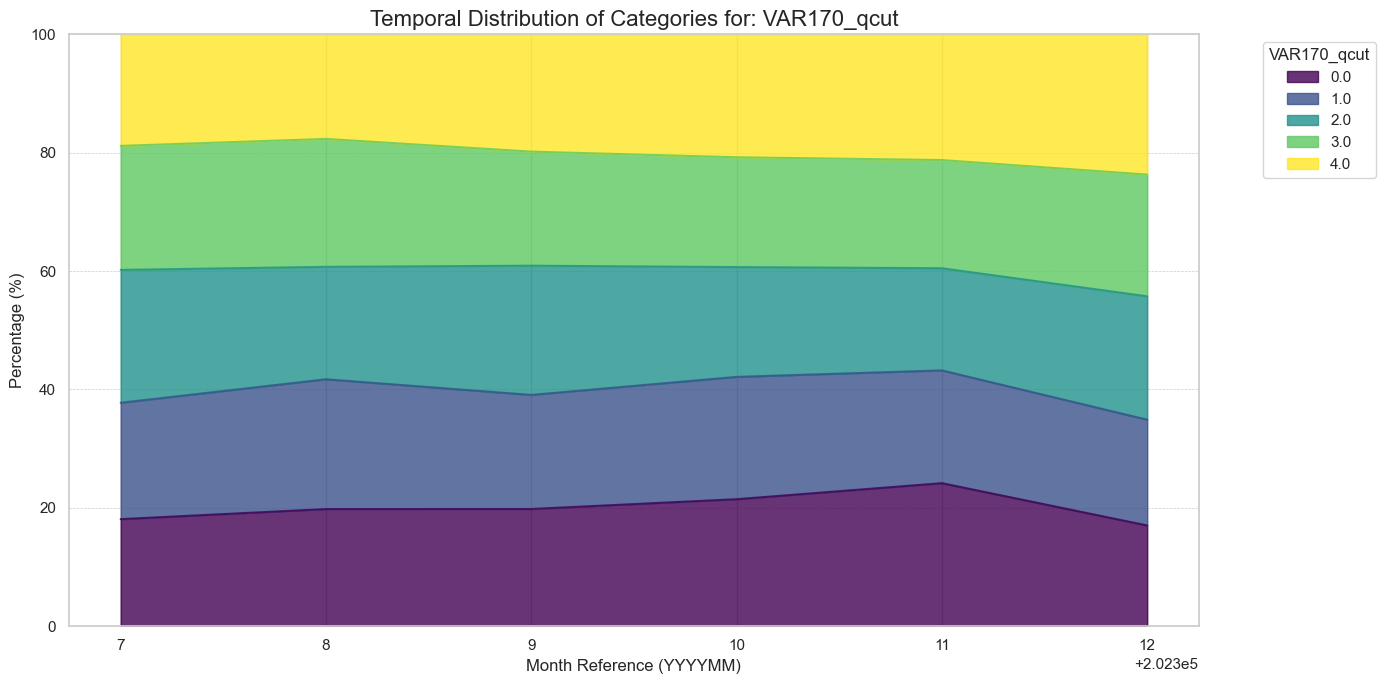

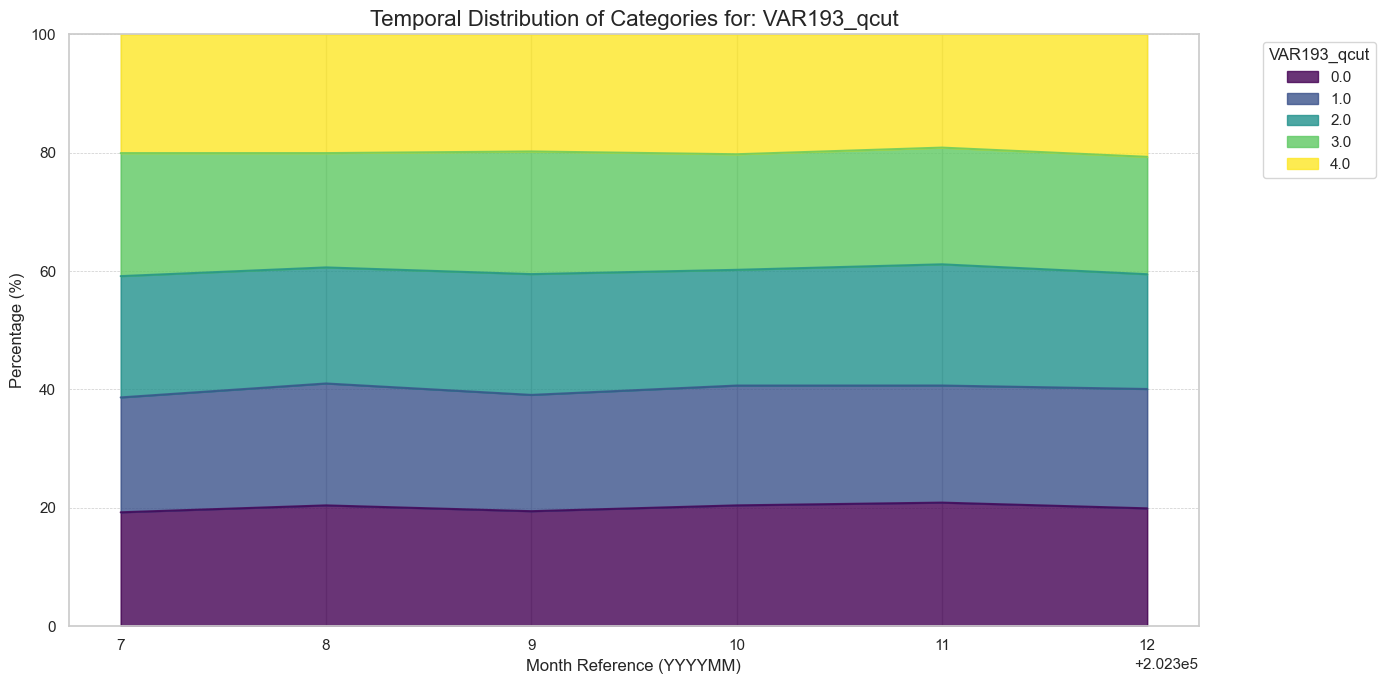

In [64]:
# Analyze temporal stability for categorical and binary variables

categorical_features = list(sorted_low_cardinality.keys())

if 'data_frame' not in locals():
    print("Error: 'data_frame' not found. Please run previous cells.")
elif not categorical_features:
    print("The list of categorical features is empty.")
else:
    print(f"\n--- Analyzing Temporal Stability for {len(categorical_features)} Categorical & Binary Features ---")

    for col in categorical_features:
        if col not in data_frame.columns:
            print(f"\nWarning: Column '{col}' not found. Skipping.")
            continue

        # Create a crosstab of the feature against the month, normalized to get percentages
        category_distribution = pd.crosstab(data_frame['mes_ref'], data_frame[col], normalize='index') * 100
        
        # Plot the distribution over time as a stacked area chart
        plt.figure(figsize=(14, 7))
        
        category_distribution.plot(kind='area', stacked=True, ax=plt.gca(), colormap='viridis', alpha=0.8)
        
        plt.title(f'Temporal Distribution of Categories for: {col}', fontsize=16)
        plt.ylabel('Percentage (%)')
        plt.xlabel('Month Reference (YYYYMM)')
        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
        plt.ylim(0, 100)
        
        plt.tight_layout()
        plt.show()

--- Analyzing IV Stability Over Time ---


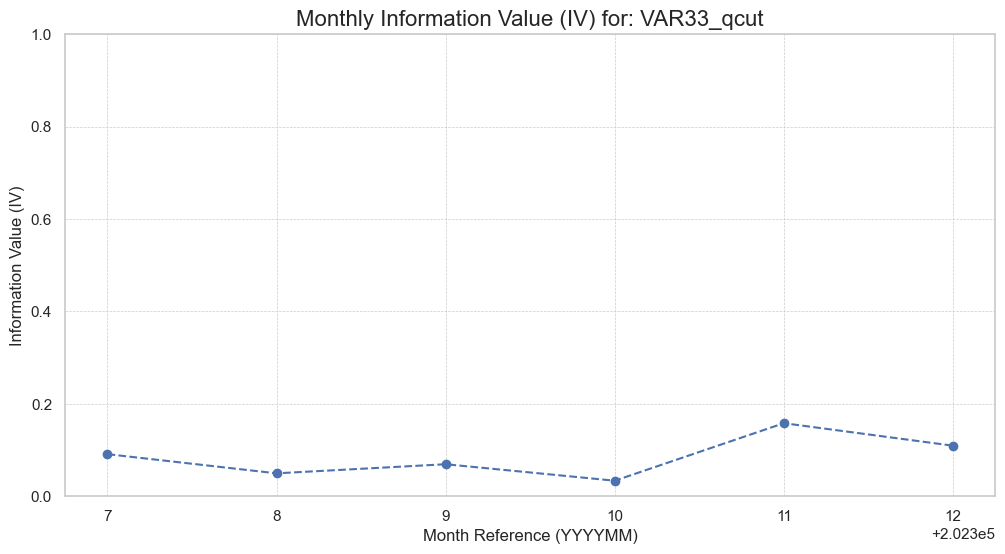

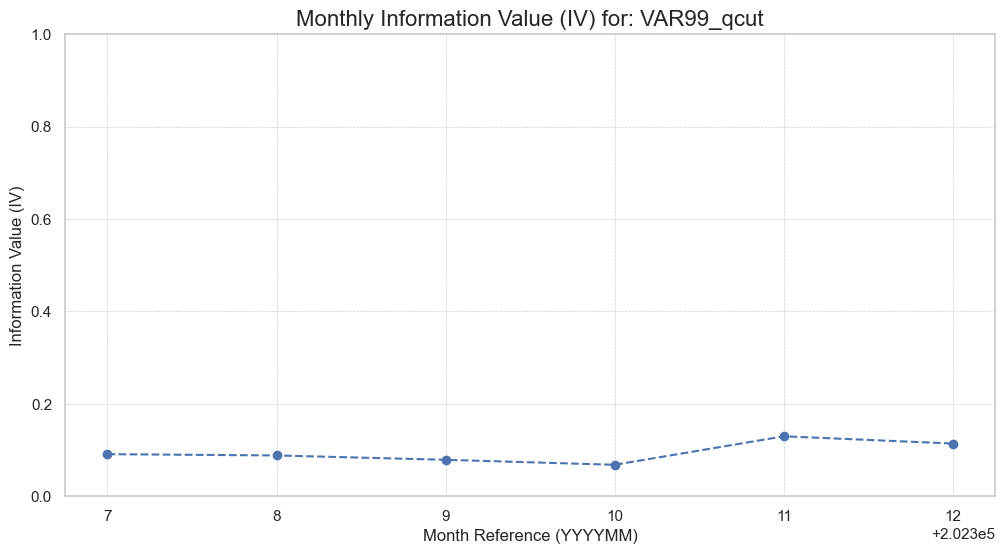

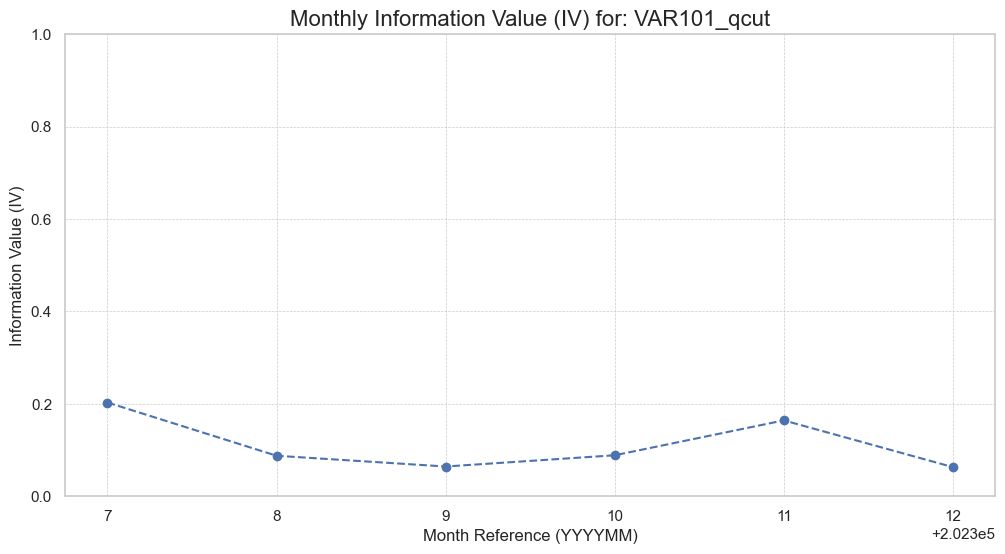

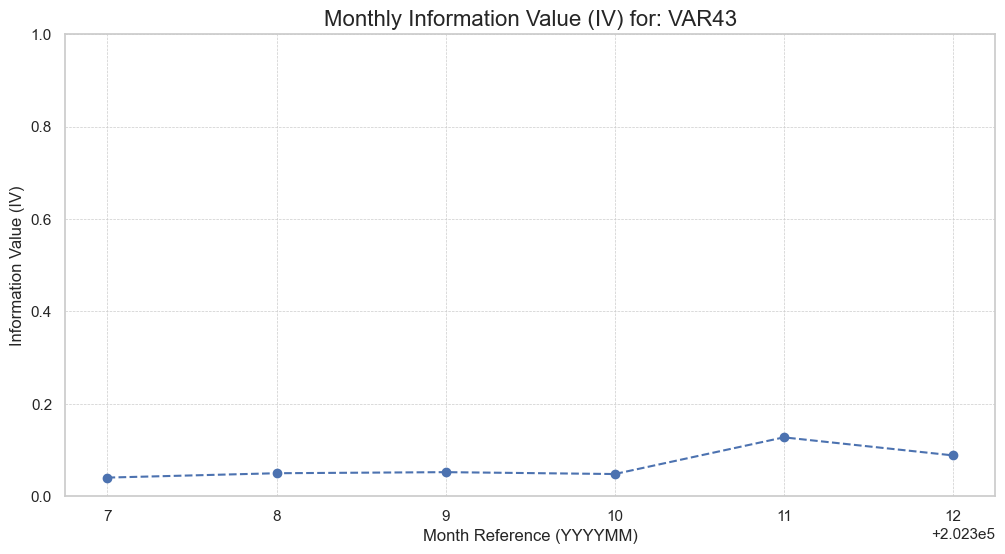

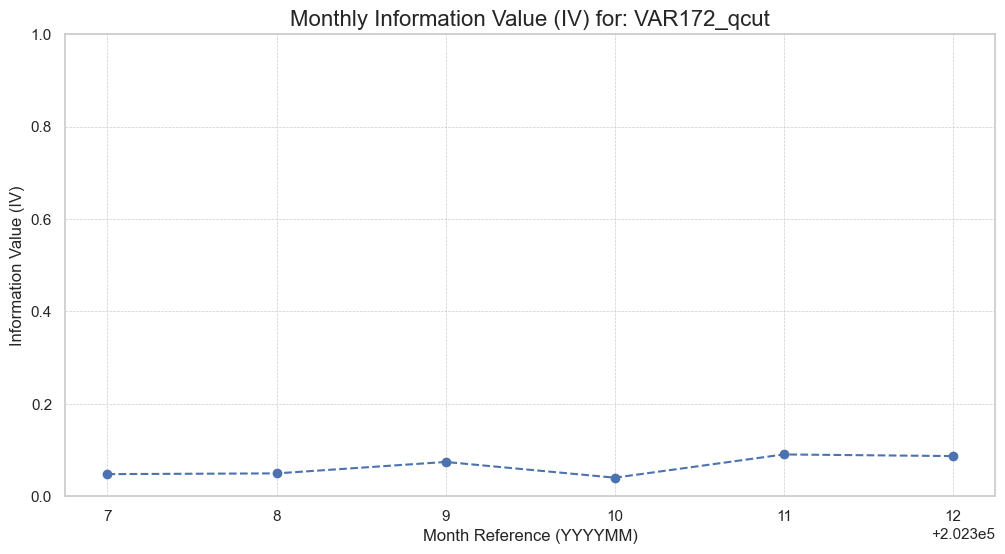

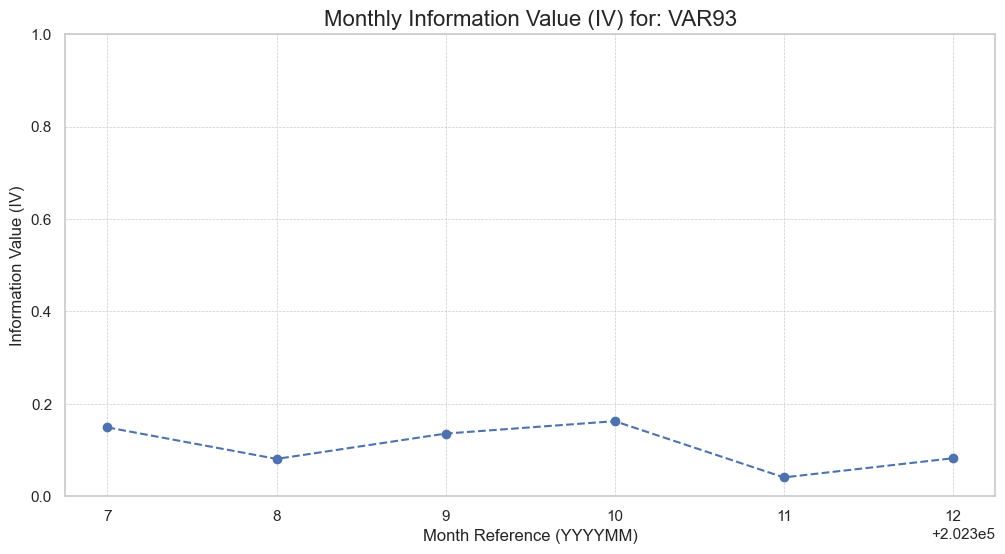

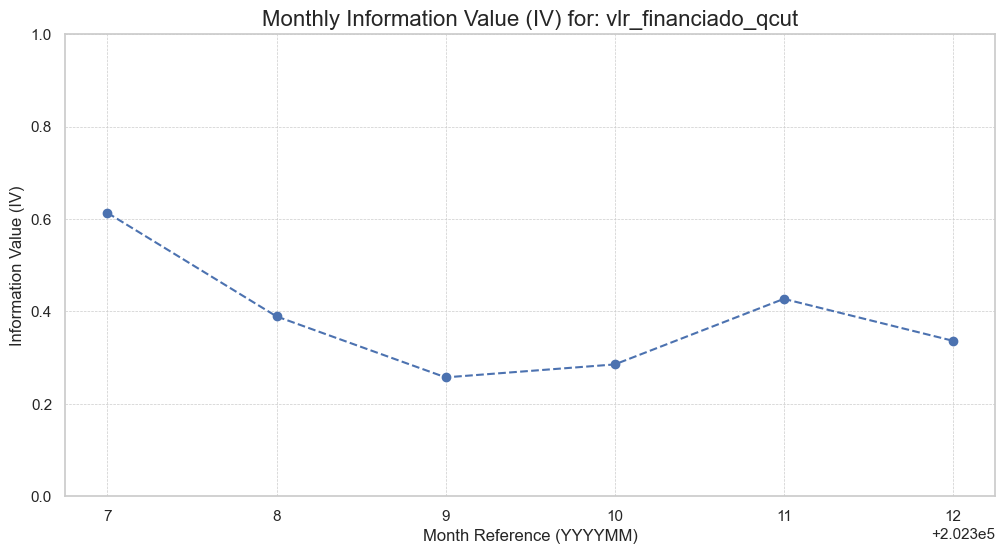

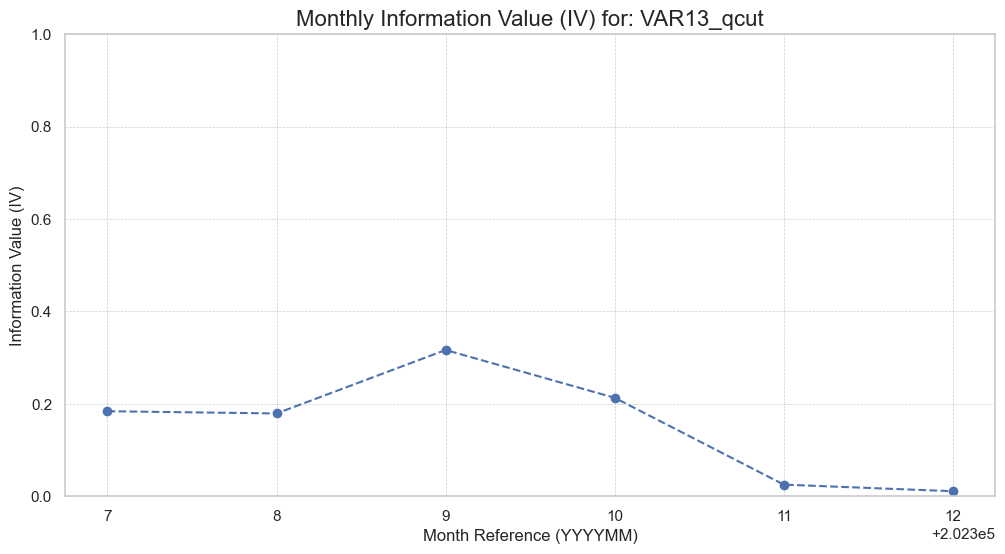

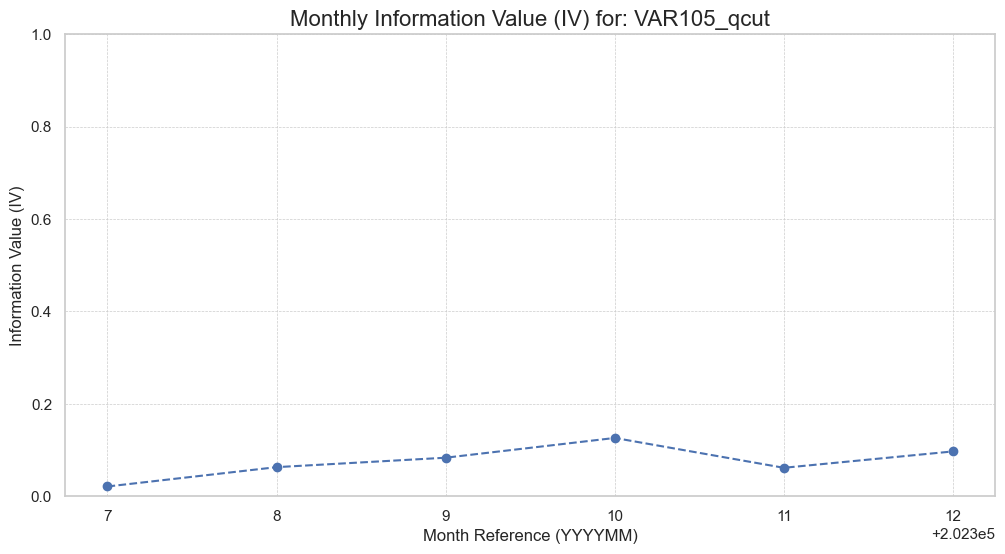

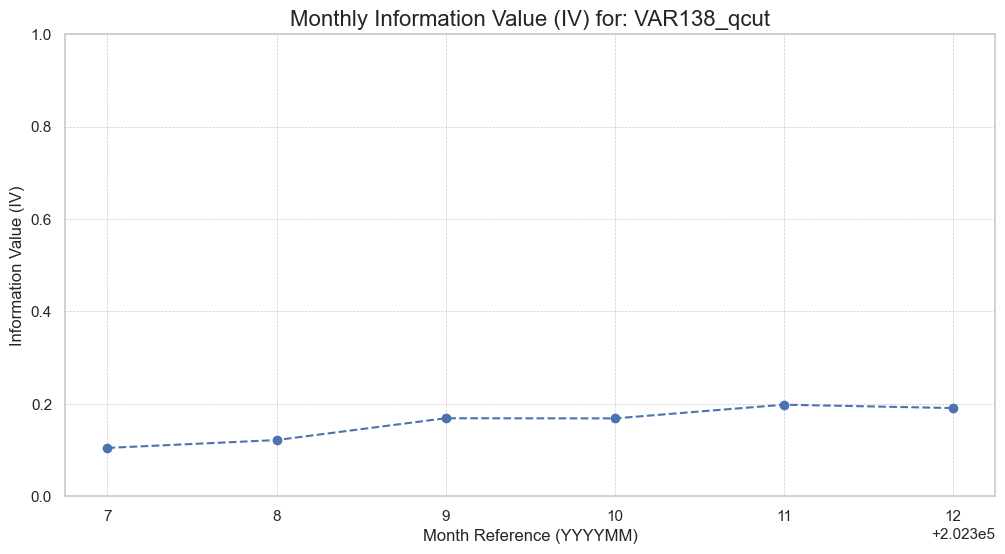

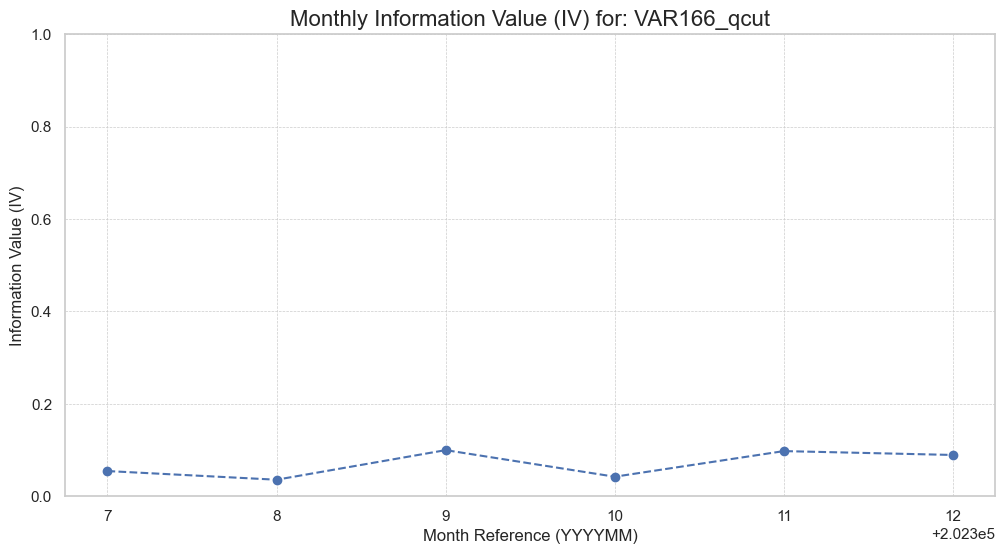

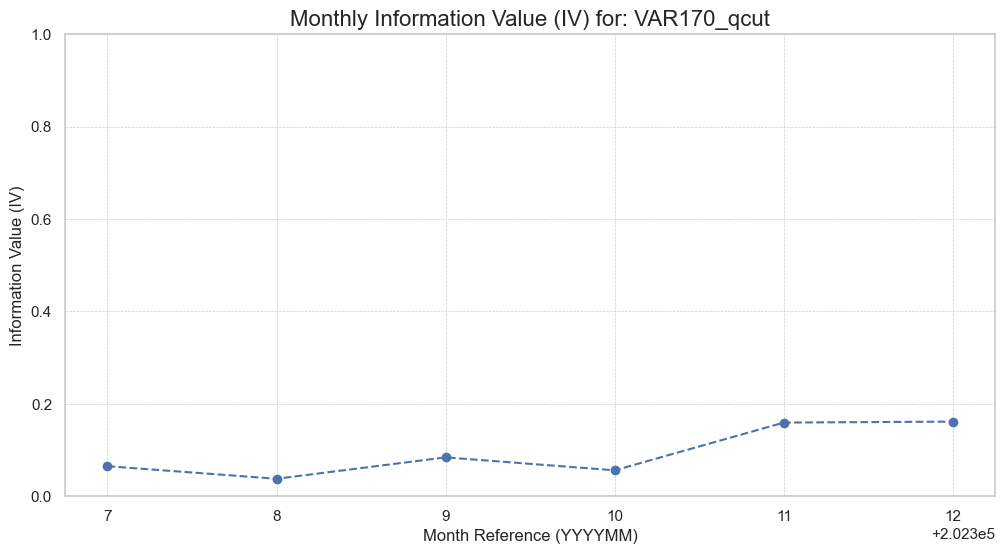

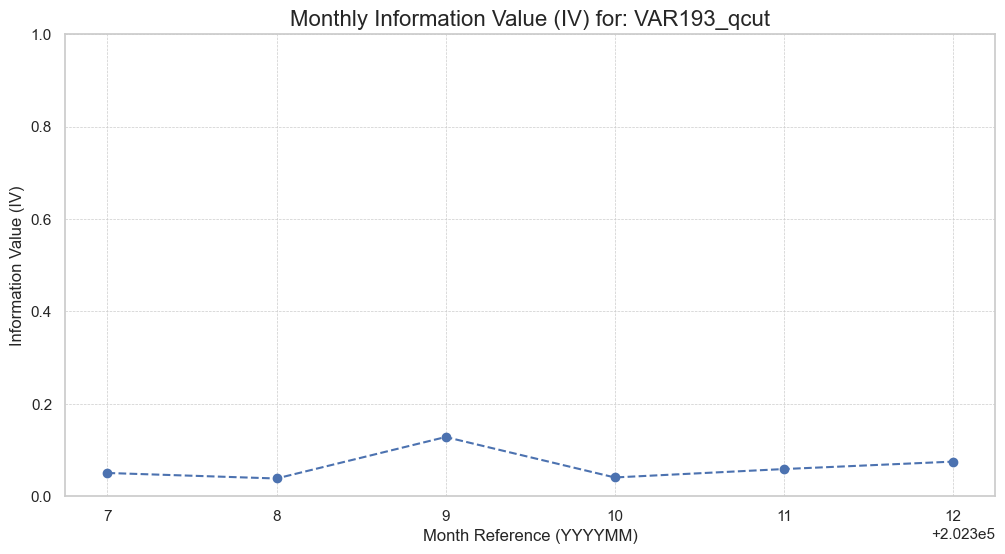

In [65]:
# Calculate Information Value (IV) per month

features_to_analyze_iv = categorical_features

if 'data_frame' not in locals():
    print("Error: 'data_frame' not found.")
else:
    print("--- Analyzing IV Stability Over Time ---")
    
    unique_months = sorted(data_frame['mes_ref'].unique())

    for col in features_to_analyze_iv:
        if col not in data_frame.columns:
            print(f"\nWarning: Column '{col}' not found. Skipping.")
            continue
            
        monthly_iv = {}
        for month in unique_months:
            monthly_df = data_frame[data_frame['mes_ref'] == month]
            
            # Ensure there are samples in the monthly subset to avoid errors
            if not monthly_df.empty:
                _, iv_score = calculate_woe_iv(monthly_df, col, 'alvo')
                monthly_iv[month] = iv_score
            else:
                monthly_iv[month] = 0.0
        
        # Plot the results
        iv_series_monthly = pd.Series(monthly_iv)
        plt.figure(figsize=(12, 6))
        iv_series_monthly.plot(kind='line', marker='o', linestyle='--')
        
        plt.title(f'Monthly Information Value (IV) for: {col}', fontsize=16)
        plt.ylabel('Information Value (IV)')
        plt.xlabel('Month Reference (YYYYMM)')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # --- MODIFICATION HERE ---
        # Set the y-axis to a fixed range from 0 to 1 for consistent scale
        plt.ylim(0, 1)
        # -------------------------
        
        plt.show()

In [66]:
# # Calculate KS statistic per month

# features_to_analyze_ks = numerical_features


# if 'data_frame' not in locals():
#     print("Error: 'data_frame' not found.")
# else:
#     print("\n--- Analyzing KS Stability Over Time ---")
    
#     unique_months = sorted(data_frame['mes_ref'].unique())

#     for col in features_to_analyze_ks:
#         if col not in data_frame.columns:
#             print(f"\nWarning: Column '{col}' not found. Skipping.")
#             continue

#         monthly_ks = {}
#         for month in unique_months:
#             monthly_df = data_frame[data_frame['mes_ref'] == month]
            
#             sample_0 = monthly_df[monthly_df['alvo'] == 0][col].dropna()
#             sample_1 = monthly_df[monthly_df['alvo'] == 1][col].dropna()
            
#             # Ensure there are samples in both classes to compare
#             if not sample_0.empty and not sample_1.empty:
#                 ks_stat, _ = ks_2samp(sample_0, sample_1)
#                 monthly_ks[month] = ks_stat
#             else:
#                 monthly_ks[month] = 0 # Assign 0 if one class is missing
        
#         # Plot the results
#         ks_series_monthly = pd.Series(monthly_ks)
#         plt.figure(figsize=(12, 6))
#         ks_series_monthly.plot(kind='line', marker='o', linestyle='--')
        
#         plt.title(f'Monthly KS Statistic for: {col}', fontsize=16)
#         plt.ylabel('KS Statistic')
#         plt.xlabel('Month Reference (YYYYMM)')
#         plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#         plt.ylim(0, 1)
#         plt.show()

In [67]:
def calculate_psi(expected, actual, bins=10):
    """
    Calculates the Population Stability Index (PSI) for a variable.
    Handles cases where bin edges are not unique due to repeated values.
    """
    # Create bins for the variable
    breakpoints = np.arange(0, bins + 1) / bins * 100
    
    if pd.api.types.is_numeric_dtype(expected):
        # For numeric, create bins based on the reference distribution
        bins = np.percentile(expected.dropna(), breakpoints)
        
        bins = np.unique(bins)
        
        # If removing duplicates results in too few bins (e.g., for a constant-like variable),
        # then there's no meaningful shift to measure.
        if len(bins) < 2:
            return 0.0

        expected_binned = pd.cut(expected, bins=bins, labels=False, include_lowest=True)
        actual_binned = pd.cut(actual, bins=bins, labels=False, include_lowest=True)
    else:
        # For categorical, the categories are the bins
        expected_binned = expected
        actual_binned = actual
    
    # Calculate distribution for expected and actual
    df_expected = pd.DataFrame({'val': expected_binned, 'pop': 'expected'})
    df_actual = pd.DataFrame({'val': actual_binned, 'pop': 'actual'})
    all_data = pd.concat([df_expected, df_actual], ignore_index=True)
    
    dist = pd.crosstab(all_data['val'], all_data['pop'], normalize='columns')
    
    # Add 0.0001 to avoid division by zero in log
    dist.replace(0, 0.0001, inplace=True)
    
    dist['psi'] = (dist['actual'] - dist['expected']) * np.log(dist['actual'] / dist['expected'])
    
    return dist['psi'].sum()


--- Analyzing Population Stability Index (PSI) ---
Reference Period: 202307


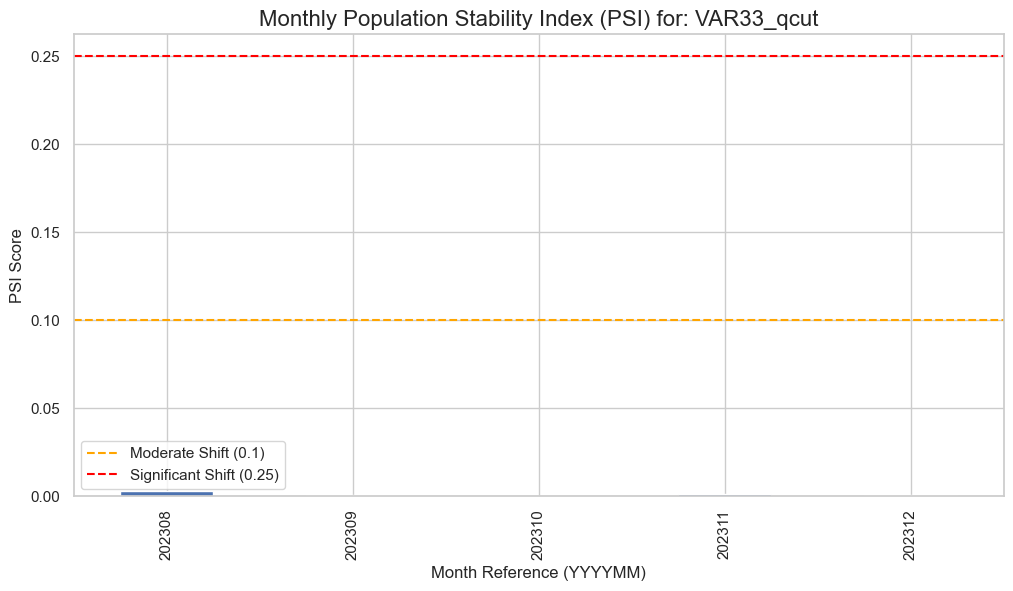

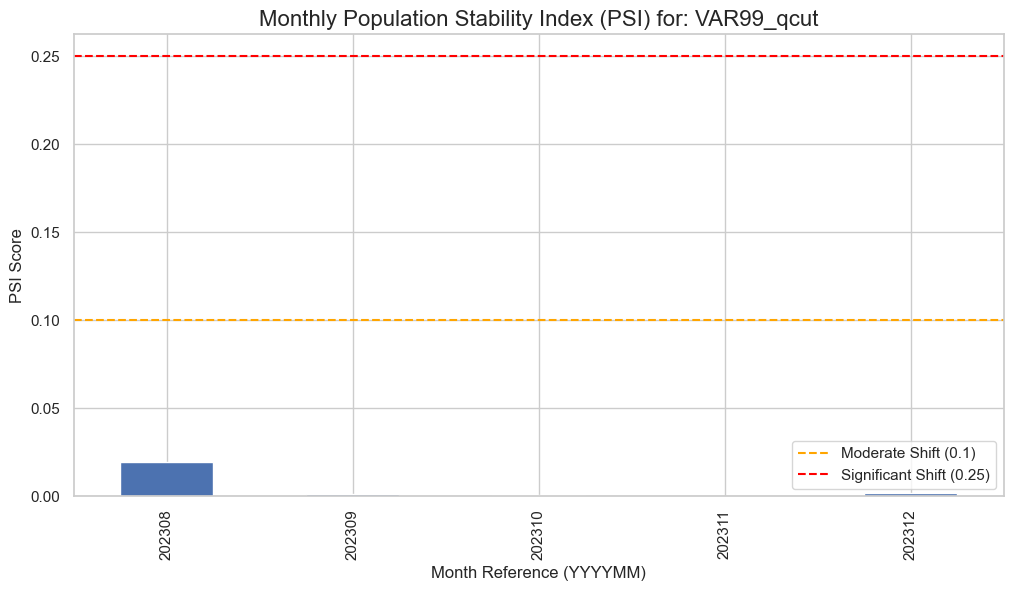

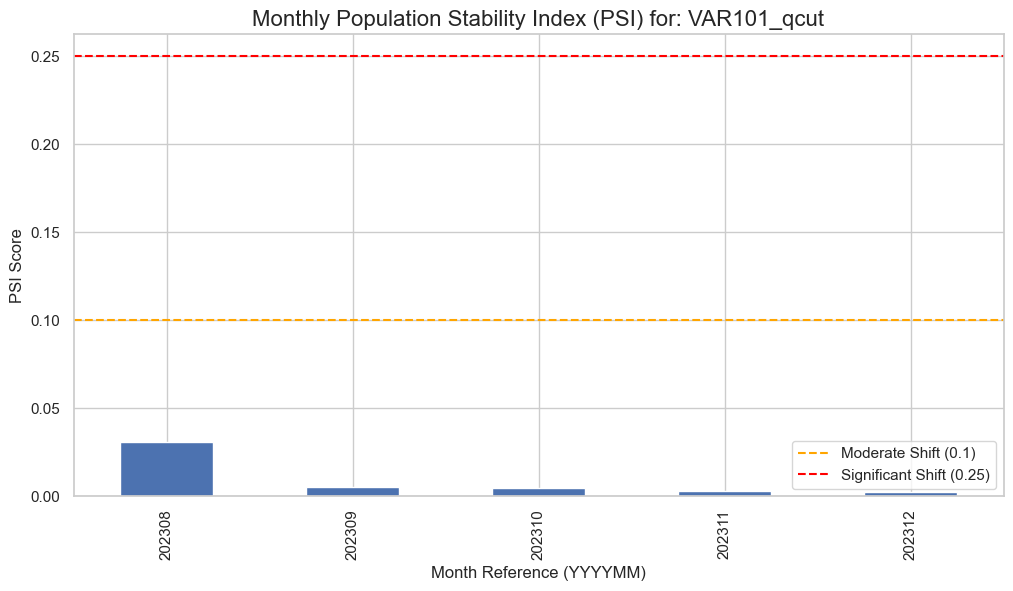

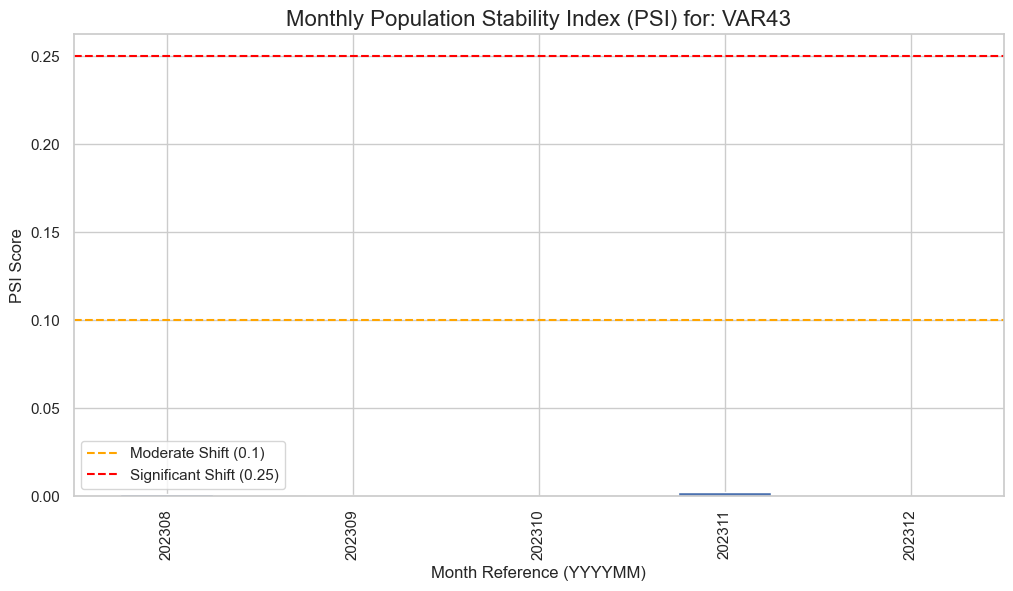

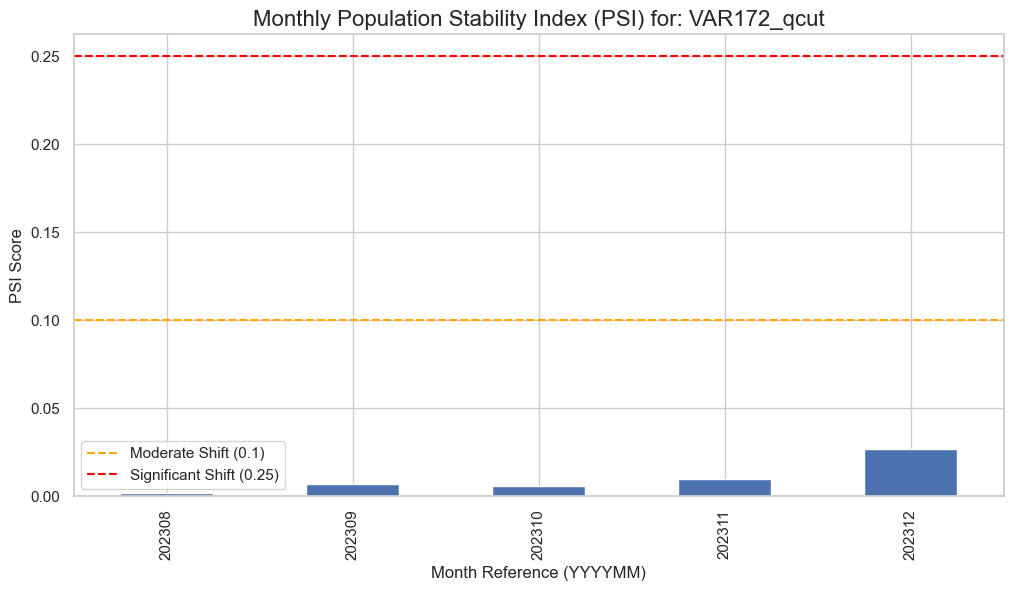

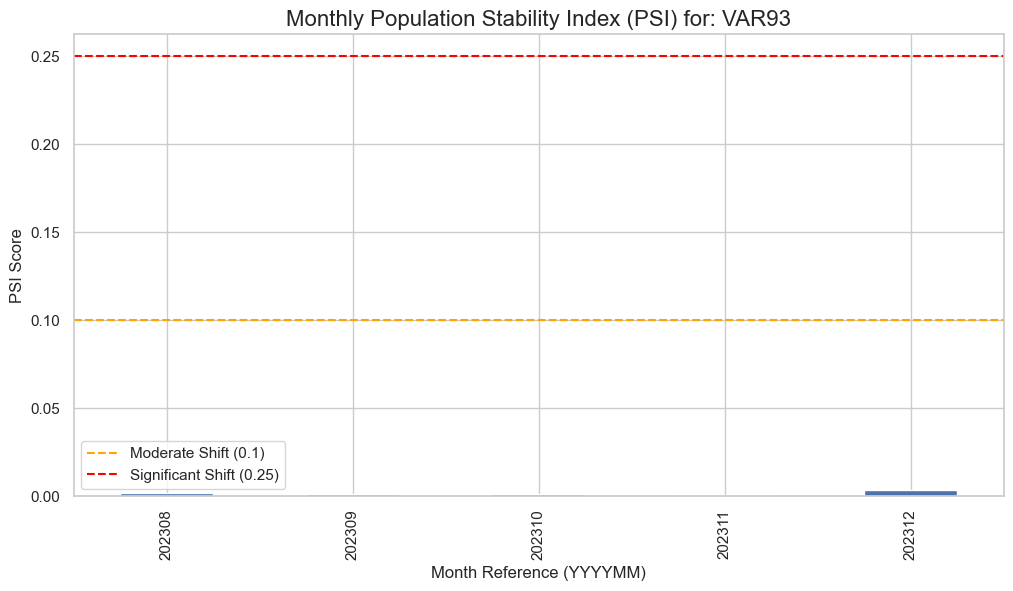

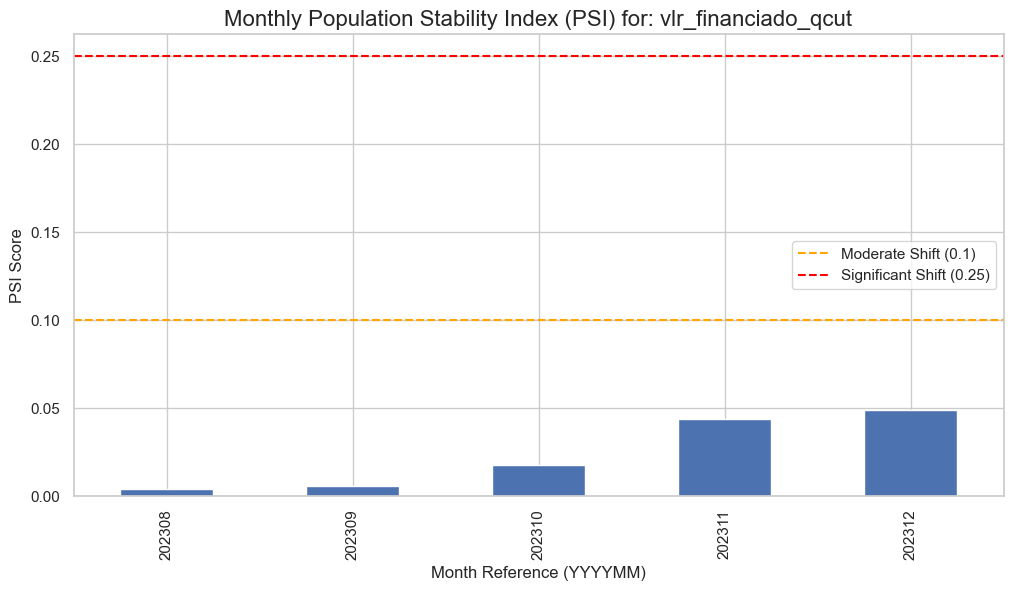

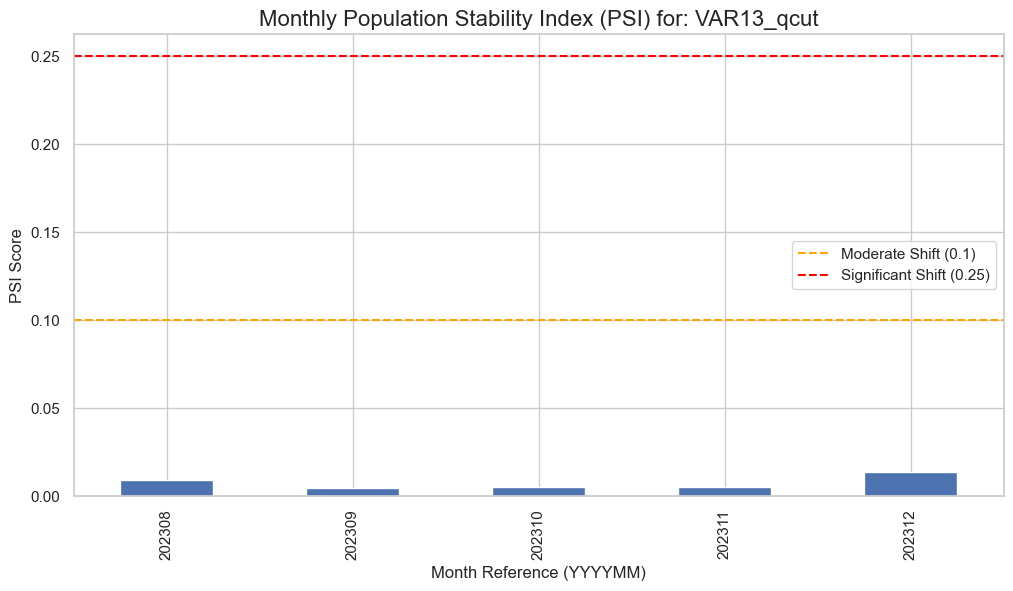

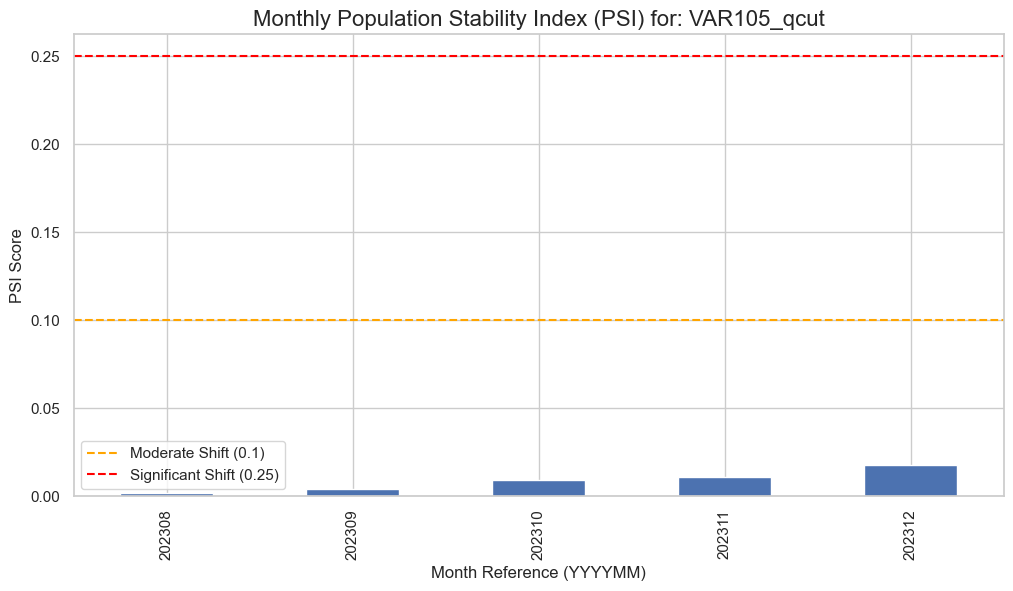

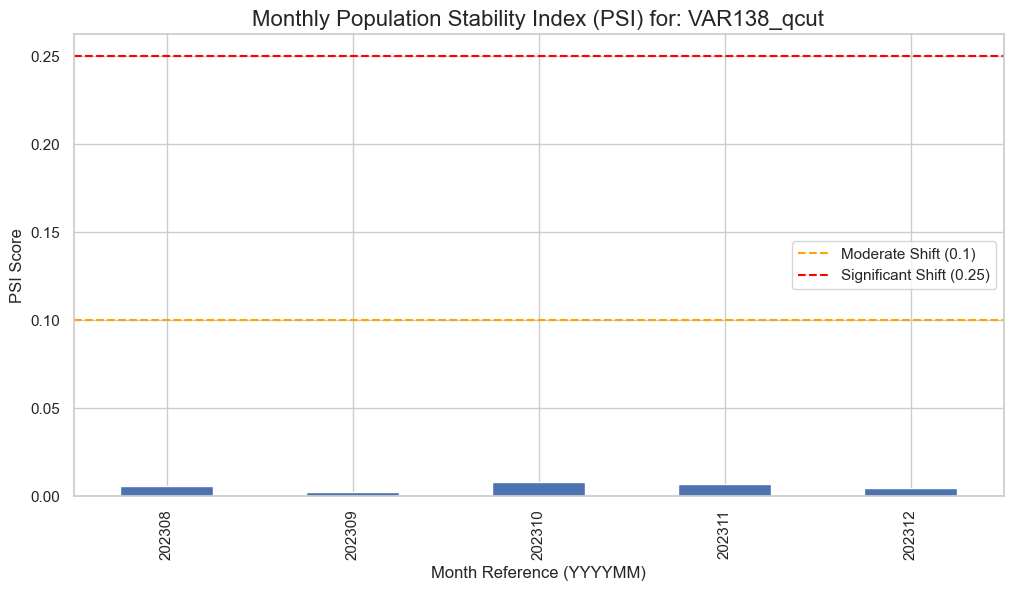

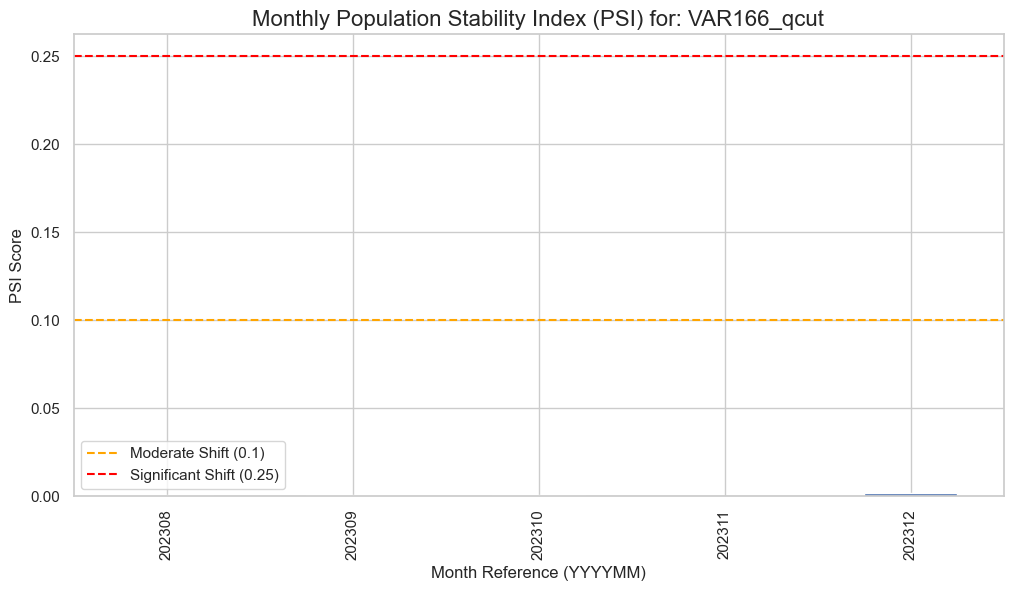

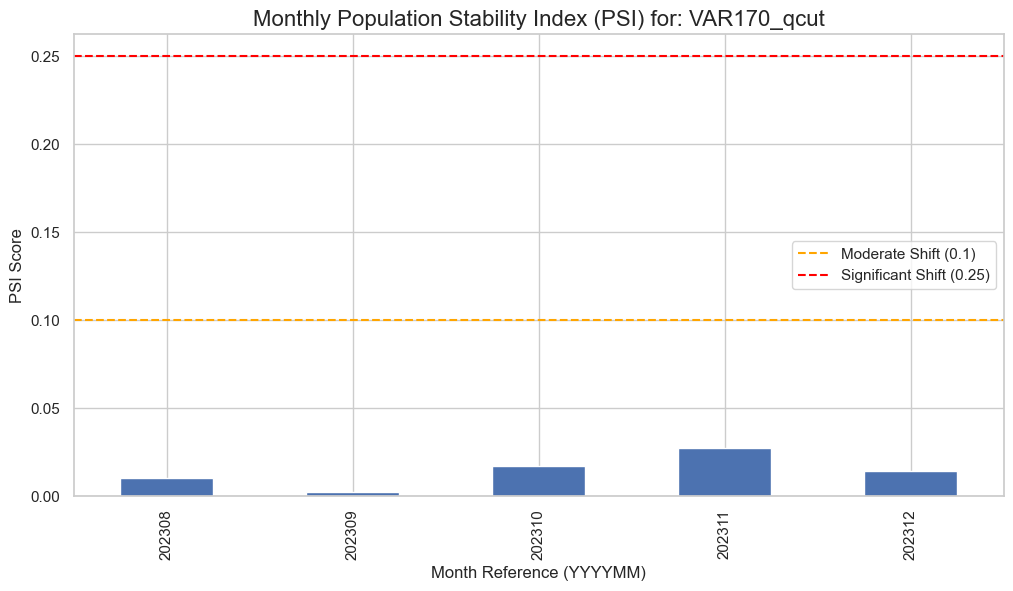

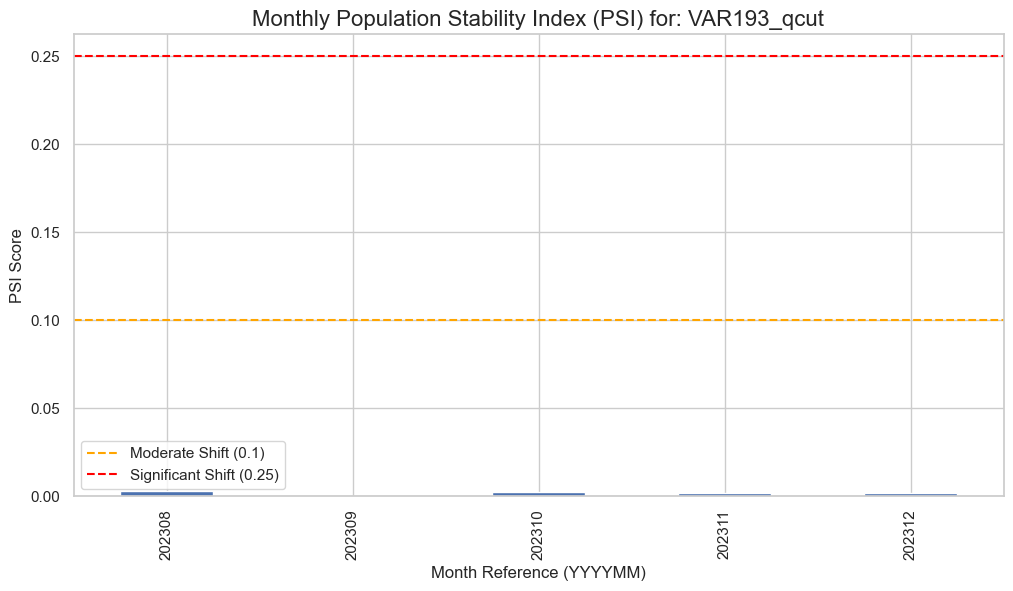

In [68]:
# Calculate Population Stability Index (PSI)

features_to_analyze_psi = categorical_features

if 'data_frame' not in locals():
    print("Error: 'data_frame' not found.")
else:
    print("\n--- Analyzing Population Stability Index (PSI) ---")
    
    unique_months = sorted(data_frame['mes_ref'].unique())
    reference_month = unique_months[0]
    reference_df = data_frame[data_frame['mes_ref'] == reference_month]
    print(f"Reference Period: {reference_month}")

    for col in features_to_analyze_psi:
        if col not in data_frame.columns:
            print(f"\nWarning: Column '{col}' not found. Skipping.")
            continue
            
        monthly_psi = {}
        for month in unique_months[1:]:
            actual_df = data_frame[data_frame['mes_ref'] == month]
            psi_score = calculate_psi(reference_df[col], actual_df[col])
            monthly_psi[month] = psi_score
            
        psi_series_monthly = pd.Series(monthly_psi)
        plt.figure(figsize=(12, 6))
        psi_series_monthly.plot(kind='bar')
        
        plt.axhline(y=0.1, color='orange', linestyle='--', label='Moderate Shift (0.1)')
        plt.axhline(y=0.25, color='red', linestyle='--', label='Significant Shift (0.25)')
        
        plt.title(f'Monthly Population Stability Index (PSI) for: {col}', fontsize=16)
        plt.ylabel('PSI Score')
        plt.xlabel('Month Reference (YYYYMM)')
        plt.legend()
        plt.show()

VAR13_qcut e valor_financiado_qcut mostram comportamento de degradação de IV ao longo dos meses, sendo um ponto de atenção para os modelos. Entretanto, PSI indica estabilidade.

# Modelagem

In [69]:
data_frame.head()

,mes_ref,alvo,VAR43,VAR93,VAR147,vlr_financiado_qcut,VAR13_qcut,VAR33_qcut,VAR99_qcut,VAR101_qcut,VAR105_qcut,VAR138_qcut,VAR166_qcut,VAR170_qcut,VAR172_qcut,VAR193_qcut
0,202307,0.0,0.0,0.25,1.0,2.0,NaN,0.0,0.0,2.0,NaN,0.0,1.0,2.0,2.0,0.0
1,202307,0.0,NaN,NaN,0.0,2.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
2,202307,0.0,NaN,1.00,0.0,3.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
3,202307,0.0,NaN,NaN,0.0,2.0,NaN,2.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
4,202307,0.0,NaN,0.75,0.0,1.0,NaN,0.0,0.0,1.0,NaN,NaN,2.0,NaN,0.0,4.0


In [70]:
data_frame.shape

(47732, 16)

In [66]:
remaining_null_counts = data_frame.isnull().sum()
columns_with_remaining_nulls = remaining_null_counts[remaining_null_counts > 0]
num_cols_with_nulls = len(columns_with_remaining_nulls)

if num_cols_with_nulls > 0:
    print(f"There are now {num_cols_with_nulls} columns with remaining null values.")
    display(columns_with_remaining_nulls.sort_values(ascending=False))
else:
    print("✅ No more columns with null values remain in the dataset.")

There are now 14 columns with remaining null values.


VAR105_qcut            41977
VAR170_qcut            41636
VAR43                  39040
VAR13_qcut             38736
VAR138_qcut            36217
VAR166_qcut            24904
VAR193_qcut            24903
VAR99_qcut             20785
VAR147                 20785
VAR33_qcut             20785
VAR172_qcut            20785
VAR93                  20337
VAR101_qcut             6806
vlr_financiado_qcut      138
dtype: int64

In [71]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    # --- Configuration Thresholds ---
    ID_UNIQUENESS_THRESHOLD = 0.95
    LOW_CARDINALITY_THRESHOLD = 5

    # --- Initialization ---
    identifier_cols = []
    binary_cols = []
    low_cardinality_categorical = {}
    other_cols = []

    total_rows = len(data_frame)

    # --- Classification Loop ---
    for col in data_frame.columns:
        n_unique = data_frame[col].nunique()
        unique_ratio = n_unique / total_rows

        if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
            identifier_cols.append(col)
        elif n_unique == 2:
            binary_cols.append(col)
        elif n_unique <= LOW_CARDINALITY_THRESHOLD:
            low_cardinality_categorical[col] = n_unique
        else:
            # Captures any column that doesn't fit the criteria above
            other_cols.append(col)

    # --- Reporting Results ---
    print("--- Identifier Columns ---")
    print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
    print(identifier_cols)

    print("\n--- Binary Columns ---")
    print(f"Found {len(binary_cols)} columns with 2 unique values.")
    print(binary_cols)

    print("\n--- Low Cardinality Categorical Columns (<= {LOW_CARDINALITY_THRESHOLD} unique values) ---")
    print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
    sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
    print(sorted_low_cardinality)

    print("\n--- Other Columns (High Cardinality / Continuous) ---")
    print(f"Found {len(other_cols)} columns that did not fit other categories.")
    print(other_cols)

--- Identifier Columns ---
Found 0 columns with >= 95.0% unique values.
[]

--- Binary Columns ---
Found 2 columns with 2 unique values.
['alvo', 'VAR147']

--- Low Cardinality Categorical Columns (<= {LOW_CARDINALITY_THRESHOLD} unique values) ---
Found 13 columns for inspection.
{'VAR33_qcut': 3, 'VAR99_qcut': 3, 'VAR101_qcut': 3, 'VAR43': 4, 'VAR172_qcut': 4, 'VAR93': 5, 'vlr_financiado_qcut': 5, 'VAR13_qcut': 5, 'VAR105_qcut': 5, 'VAR138_qcut': 5, 'VAR166_qcut': 5, 'VAR170_qcut': 5, 'VAR193_qcut': 5}

--- Other Columns (High Cardinality / Continuous) ---
Found 1 columns that did not fit other categories.
['mes_ref']


In [73]:
print("--- Distribution of Data Types in the DataFrame ---")

dtype_counts = data_frame.dtypes.value_counts()

display(dtype_counts)

--- Distribution of Data Types in the DataFrame ---


float64    15
int64       1
Name: count, dtype: int64

Vamos optar por uma separação temporal. Temos 6 meses disponíveis, utilizamos os 4 primeiros para o processo de treinamento, separando os dois últimos para validação final do modelo. Utilizaremos uma distribuição 70/30 nos primeiros 4 meses.

Como seguimos com um conjunto de dados desbalanceado e com alta presença de NaN, vamos priorizar experimentação com modelos baseados em árvore (LGBM, XGBoost, CatBoost). Arbitrariamente, irei priorizar inicialmente o LGBM. Futuramente acrescento modelos distintos tanto baseados em árvore quanto em outras estratégias. 

Lembremos que "O nosso objetivo aqui é mapear e alertar os clientes fraudadores trazendo o mínimo de impacto e o máximo de retorno financeiro à operação do cliente (portanto, alertando poucos casos, mas com alta precisão).", sendo nossas métricas primárias:

* Precisão
* Recall
* F-beta Score (inclinando para F0.5)
* AUC-PR

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  LabelEncoder

In [74]:
target_col = 'alvo'

# --- 1. Define Months for Each Set ---
# Months for the initial pool that will be split into Train and Test sets
train_test_months = [202307, 202308, 202309, 202310]
# Months reserved exclusively for the Validation (Out-of-Time) set
validation_months = [202311, 202312]

print("--- 1. Separating data based on 'mes_ref' ---")

# --- 2. Create the Validation Set (Out-of-Time) ---
validation_df = data_frame[data_frame['mes_ref'].isin(validation_months)].copy()

# --- 3. Create the Pool for Training and Testing ---
train_test_pool_df = data_frame[data_frame['mes_ref'].isin(train_test_months)].copy()

print(f"Pool for Train/Test: {len(train_test_pool_df)} rows (Months: {train_test_months})")
print(f"Validation Set: {len(validation_df)} rows (Months: {validation_months})\n")

# --- 4. Prepare for Stratified Split ---
stratify_col_name = 'stratify_col'
train_test_pool_df[stratify_col_name] = train_test_pool_df['mes_ref'].astype(str) + '_' + train_test_pool_df[target_col].astype(str)

# Define features and target for the pool
features = [col for col in data_frame.columns if col not in [target_col, 'mes_ref', stratify_col_name]]
X_pool = train_test_pool_df[features]
y_pool = train_test_pool_df[target_col]

print("--- 2. Performing 70/30 stratified split on the Train/Test pool ---")

# Split the pool into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_pool, y_pool,
    test_size=0.3,
    random_state=42,
    stratify=train_test_pool_df[stratify_col_name] # Stratify on the combined column
)

# Create the final validation set from the validation_df
X_val = validation_df[features]
y_val = validation_df[target_col]

print("\n--- Split complete. Set shapes: ---")
print(f"Training set (X_train):   {X_train.shape}")
print(f"Test set (X_test):         {X_test.shape}")
print(f"Validation set (X_val):   {X_val.shape}")

# --- 5. Detailed Verification ---
print("\n" + "="*50)
print("--- Verification of Stratification ---")
print("="*50)

print("\n✅ Target Rate Consistency:")
print(f"Train/Test Pool: {y_pool.mean():.4%}")
print(f"Training set:    {y_train.mean():.4%}")
print(f"Test set:        {y_test.mean():.4%}")
print(f"Validation set:  {y_val.mean():.4%}")

print("\n✅ Month Distribution Consistency (in Train/Test):")
print("\n--- Training Set Month Distribution ---")
print(data_frame.loc[y_train.index, 'mes_ref'].value_counts(normalize=True).sort_index().map('{:.2%}'.format))

print("\n--- Test Set Month Distribution ---")
print(data_frame.loc[y_test.index, 'mes_ref'].value_counts(normalize=True).sort_index().map('{:.2%}'.format))

print("\n--- Validation Set Month Distribution ---")
print(data_frame.loc[y_val.index, 'mes_ref'].value_counts(normalize=True).sort_index().map('{:.2%}'.format))

--- 1. Separating data based on 'mes_ref' ---
Pool for Train/Test: 35050 rows (Months: [202307, 202308, 202309, 202310])
Validation Set: 12682 rows (Months: [202311, 202312])

--- 2. Performing 70/30 stratified split on the Train/Test pool ---

--- Split complete. Set shapes: ---
Training set (X_train):   (24535, 14)
Test set (X_test):         (10515, 14)
Validation set (X_val):   (12682, 14)

--- Verification of Stratification ---

✅ Target Rate Consistency:
Train/Test Pool: 4.0827%
Training set:    4.0840%
Test set:        4.0799%
Validation set:  4.3763%

✅ Month Distribution Consistency (in Train/Test):

--- Training Set Month Distribution ---
mes_ref
202307    23.94%
202308    27.20%
202309    24.51%
202310    24.35%
Name: proportion, dtype: object

--- Test Set Month Distribution ---
mes_ref
202307    23.95%
202308    27.20%
202309    24.52%
202310    24.34%
Name: proportion, dtype: object

--- Validation Set Month Distribution ---
mes_ref
202311    51.13%
202312    48.87%
Name: 

In [75]:
X_train

,VAR43,VAR93,VAR147,vlr_financiado_qcut,VAR13_qcut,VAR33_qcut,VAR99_qcut,VAR101_qcut,VAR105_qcut,VAR138_qcut,VAR166_qcut,VAR170_qcut,VAR172_qcut,VAR193_qcut
44411,0.0,0.25,0.0,1.0,3.0,2.0,0.0,NaN,3.0,1.0,2.0,0.0,0.0,2.0
8430,NaN,NaN,0.0,1.0,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN
43506,NaN,0.75,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0
3180,0.0,0.00,0.0,4.0,NaN,2.0,1.0,2.0,NaN,2.0,1.0,NaN,1.0,0.0
28060,0.0,0.25,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43490,0.0,0.00,0.0,3.0,NaN,1.0,0.0,NaN,NaN,NaN,2.0,NaN,0.0,2.0
4577,NaN,0.00,0.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN,2.0,NaN,0.0,2.0
28037,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16120,NaN,0.50,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,4.0


## LGBM

In [121]:
import re

import lightgbm as lgb
from sklearn.metrics import (precision_score, recall_score, fbeta_score, 
                             precision_recall_curve, auc, 
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import make_scorer
from scipy import stats
from tqdm import tqdm

In [ ]:

# # --- 1. Create Copies ---
# X_train_processed = X_train.copy()
# X_val_processed = X_val.copy()
# X_test_processed = X_test.copy()

# print("Copies of the train, validation, and test sets were created.")

# # --- 2. Define Column Groups for Preprocessing ---

# # Define columns that should NOT be treated as model features
# cols_to_exclude = ['mes_ref', 'alvo']

# # Identify all categorical columns that will be label encoded
# cols_for_le = [col for col in low_cardinality_categorical.keys() if col not in cols_to_exclude]

# # Identify all columns that will be scaled (all numeric types)
# # This will include the newly label-encoded columns later
# cols_to_scale = [col for col in (binary_cols + other_cols) if col not in cols_to_exclude]

# print(f"\nUsing {len(cols_for_le)} columns for Label Encoding.")
# print(f"Using {len(cols_to_scale)} original numeric columns for scaling.")

In [ ]:
# print("Applying Label Encoding...")
# # Dictionary to store the fitted encoders
# label_encoders = {}

# for col in cols_for_le:
#     # Initialize a new encoder for each column
#     le = LabelEncoder()
    
#     # Fit the encoder on the training data
#     X_train_processed[col] = le.fit_transform(X_train_processed[col].astype(str))
    
#     # Transform the validation and test sets
#     # We handle unseen values by mapping them to a new category (e.g., -1 or a specific number)
#     # For simplicity here, we transform known labels and can impute unknowns if necessary.
#     known_labels = {c for c in X_val_processed[col].unique() if c in le.classes_}
#     X_val_processed[col] = X_val_processed[col].apply(lambda x: le.transform([x])[0] if x in known_labels else -1) # -1 for unknown
    
#     known_labels_test = {c for c in X_test_processed[col].unique() if c in le.classes_}
#     X_test_processed[col] = X_test_processed[col].apply(lambda x: le.transform([x])[0] if x in known_labels_test else -1) # -1 for unknown
    
#     # Store the fitted encoder
#     label_encoders[col] = le
    
# print("Label Encoding applied successfully.")
# # Add the newly encoded columns to the list of columns to be scaled
# cols_to_scale.extend(cols_for_le)

# # Remove duplicates just in case
# cols_to_scale = list(dict.fromkeys(cols_to_scale)) 
# print(f"\nTotal columns to be scaled now: {len(cols_to_scale)}")

In [ ]:
#     scaler = StandardScaler()

#     # Fit on training data, then transform train/validation/test
#     X_train_processed[cols_to_scale] = scaler.fit_transform(X_train_processed[cols_to_scale])
#     X_val_processed[cols_to_scale] = scaler.transform(X_val_processed[cols_to_scale])
#     X_test_processed[cols_to_scale] = scaler.transform(X_test_processed[cols_to_scale])

#     print("StandardScaler applied successfully to all numeric and label-encoded columns.")
#     display(X_train_processed[cols_to_scale].head())# 

In [ ]:
# X_train_processed.columns = [re.sub(r'[\[\]<]', '_', col) for col in X_train_processed.columns]
# X_val_processed.columns = [re.sub(r'[\[\]<]', '_', col) for col in X_val_processed.columns]
# X_test_processed.columns = [re.sub(r'[\[\]<]', '_', col) for col in X_test_processed.columns]

# # print("Column names have been cleaned for XGBoost compatibility.")
# # Optional: Display some of the new column names to verify
# print("\nExample of cleaned column names:")
# print(X_train_processed.columns[:10].tolist())

--- Training LightGBM Classifier ---
Using scale_pos_weight: 23.49
[LightGBM] [Info] Number of positive: 1002, number of negative: 23533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 24535, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040840 -> initscore=-3.156406
[LightGBM] [Info] Start training from score -3.156406
Model training complete.

Score generation for Train and Test sets complete.

--- KS Analysis for Training Set ---
KS Statistic: 0.3607 (or 36.07%)


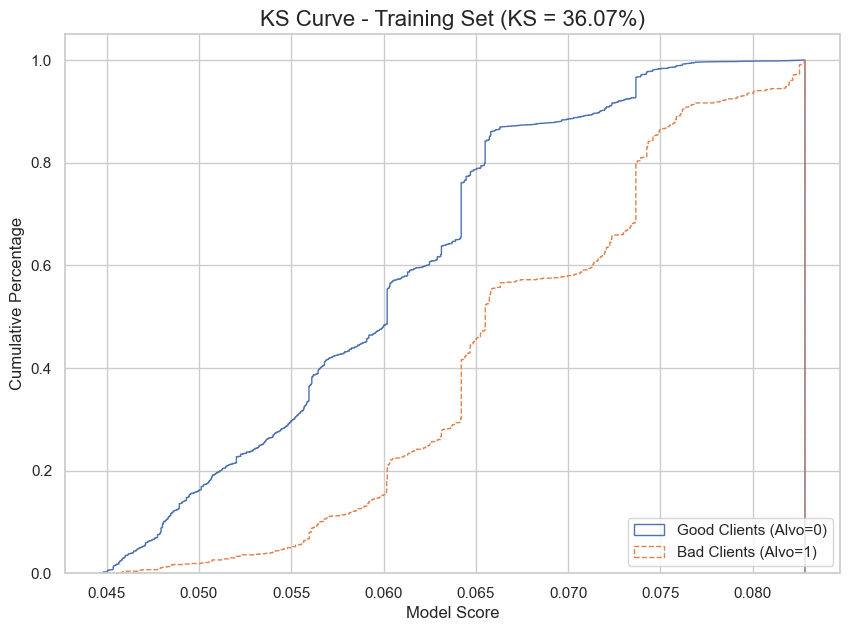



--- KS Analysis for Test Set ---
KS Statistic: 0.3484 (or 34.84%)


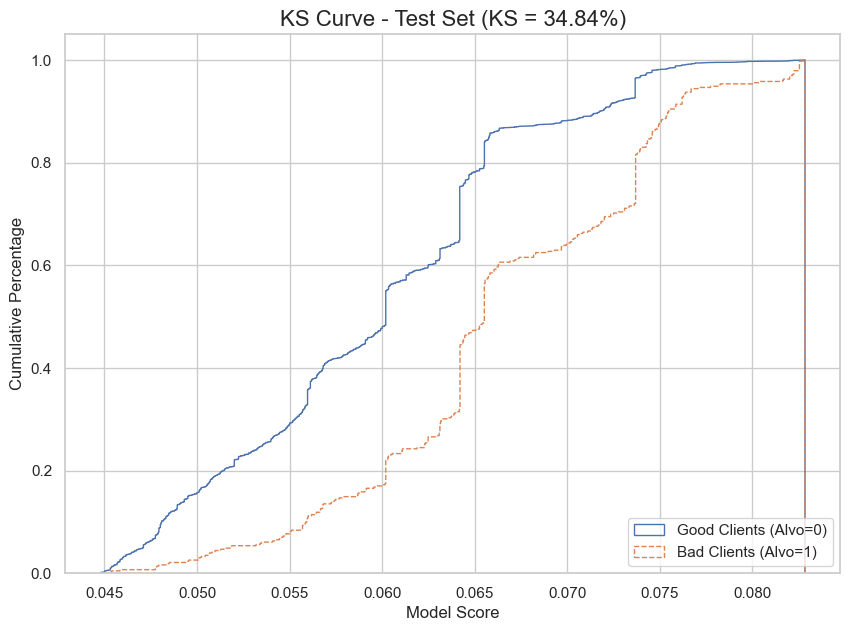

In [108]:
# --- 1. Model Training ---
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

print(f"--- Training LightGBM Classifier ---")
print(f"Using scale_pos_weight: {scale_pos_weight:.2f}")

lgbm_model = lgb.LGBMClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_estimators=50,
    learning_rate=0.001,
    subsample=1.0,
    colsample_bytree=0.8,
    num_leaves=16,
    min_child_samples=20,
    max_depth=-1
)

# Train the model ONLY on the training data
lgbm_model.fit(X_train, y_train)
print("Model training complete.\n")

# --- 2. Score Generation ---
# Scores for the training set (to check for overfitting)
y_train_scores = lgbm_model.predict_proba(X_train)[:, 1]

# (CORRECTED) Scores for the TEST set (hold-out from the same period)
y_test_scores = lgbm_model.predict_proba(X_test)[:, 1]

print("Score generation for Train and Test sets complete.\n")

# --- 3. KS Analysis Function (Unchanged) ---
def calculate_and_plot_ks(y_true, y_scores, set_name):
    print(f"--- KS Analysis for {set_name} ---")
    # Using a robust calculation that handles cases with no positive/negative samples
    ks_stat, _ = stats.ks_2samp(y_scores[y_true==0], y_scores[y_true==1])
    print(f"KS Statistic: {ks_stat:.4f} (or {ks_stat:.2%})")
    plt.figure(figsize=(10, 7))
    plt.hist(y_scores[y_true==0], bins=1000, density=True, cumulative=True, histtype='step', label='Good Clients (Alvo=0)')
    plt.hist(y_scores[y_true==1], bins=1000, density=True, cumulative=True, histtype='step', label='Bad Clients (Alvo=1)', linestyle='--')
    plt.title(f'KS Curve - {set_name} (KS = {ks_stat:.2%})', fontsize=16)
    plt.xlabel('Model Score'); plt.ylabel('Cumulative Percentage'); plt.legend(loc='lower right'); plt.grid(True); plt.show()

# --- 4. KS Evaluation ---
# Run KS analysis on the training data
calculate_and_plot_ks(y_train, y_train_scores, "Training Set")
print("\n" + "="*50 + "\n")
# (CORRECTED) Run KS analysis on the TEST data
calculate_and_plot_ks(y_test, y_test_scores, "Test Set")

n_estimators alto gera overfit
lr mais baixa está aproximando mais o ks
subsamplings na casa de 0.6~0.8 mostraram melhor equilíbrio
num_leaves menor mostrou maior potencial

### Busca em malha

#### Base Inicial

Searching for best hyperparameters: 100%|██████████| 96/96 [00:10<00:00,  9.56it/s]



--- Manual Grid Search Complete ---
Best KS score found on the Test set: 0.3724
Best parameters found:
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'min_child_samples': 40, 'n_estimators': 200, 'num_leaves': 16, 'subsample': 0.7}

--- Training final model with best parameters and generating plots ---

--- KS Analysis for Training Set (Best Model) ---
KS Statistic: 0.4019 (or 40.19%)


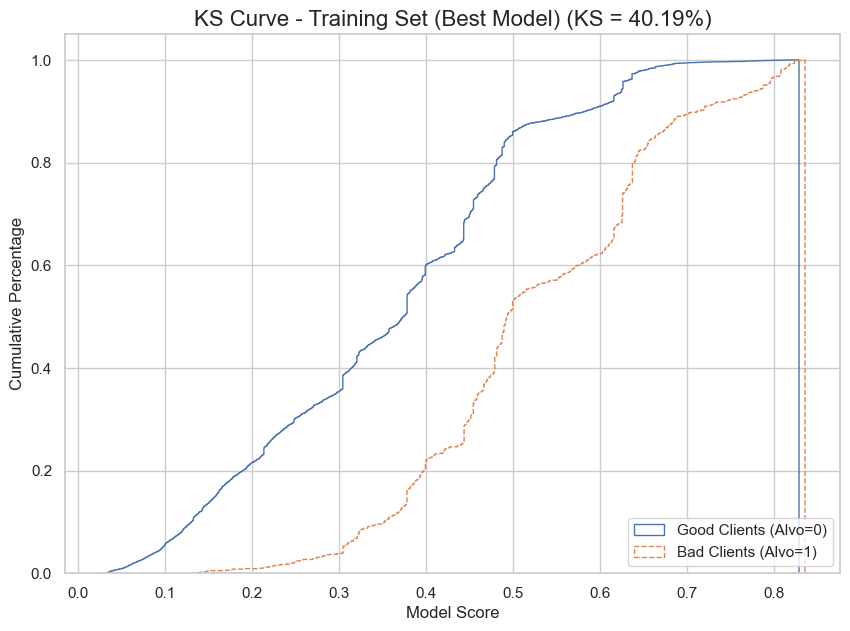


--- KS Analysis for Test Set (Best Model) ---
KS Statistic: 0.3724 (or 37.24%)


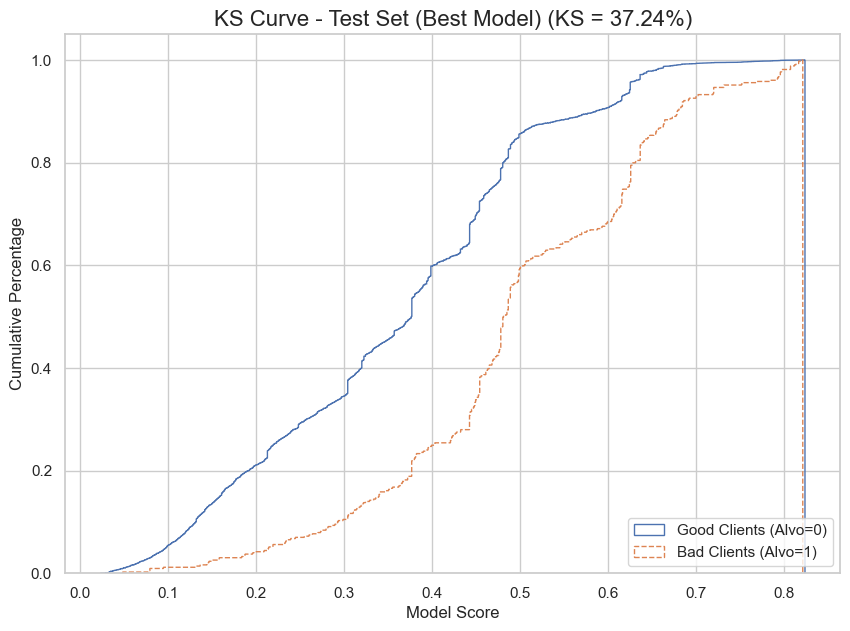

In [123]:
# --- 1. Define the Parameter Grid ---
param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 150, 200],
    'num_leaves': [16, 24],
    'subsample': [0.7, 0.8], 
    'colsample_bytree': [0.7, 0.8],
    'min_child_samples': [20, 40]
}

param_list = list(ParameterGrid(param_grid))

# --- 2. Initialize variables ---
best_ks = -1.0
best_params = None

# --- 3. Manual Search Loop (with progress bar, less verbose) ---
for params in tqdm(param_list, desc="Searching for best hyperparameters"):
    lgbm = lgb.LGBMClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        max_depth=-1,
        verbosity=-1,
        **params
    )
    lgbm.fit(X_train, y_train)
    y_test_scores = lgbm.predict_proba(X_test)[:, 1]
    
    good_scores = y_test_scores[y_test == 0]
    bad_scores = y_test_scores[y_test == 1]
    
    if len(good_scores) > 0 and len(bad_scores) > 0 and np.all(np.isfinite(y_test_scores)):
        ks_stat, _ = stats.ks_2samp(good_scores, bad_scores)
    else:
        ks_stat = 0.0
    
    if ks_stat > best_ks:
        best_ks = ks_stat
        best_params = params

# --- 4. Final Results Summary ---
print("\n" + "="*50)
print("--- Manual Grid Search Complete ---")
print(f"Best KS score found on the Test set: {best_ks:.4f}")
print("Best parameters found:")
print(best_params)
print("="*50 + "\n")

# --- 5. Train Final Model and Evaluate ---
if best_params:
    print("--- Training final model with best parameters and generating plots ---")
    
    # Train the definitive best model on the full training data
    best_lgbm_model = lgb.LGBMClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        max_depth=-1,
        **best_params
    )
    best_lgbm_model.fit(X_train, y_train)

    # Generate scores for both train and test sets using the final model
    y_train_scores_best = best_lgbm_model.predict_proba(X_train)[:, 1]
    y_test_scores_best = best_lgbm_model.predict_proba(X_test)[:, 1]

    # KS Analysis Function
    def calculate_and_plot_ks(y_true, y_scores, set_name):
        print(f"\n--- KS Analysis for {set_name} ---")
        ks_stat, _ = stats.ks_2samp(y_scores[y_true==0], y_scores[y_true==1])
        print(f"KS Statistic: {ks_stat:.4f} (or {ks_stat:.2%})")
        plt.figure(figsize=(10, 7))
        plt.hist(y_scores[y_true==0], bins=1000, density=True, cumulative=True, histtype='step', label='Good Clients (Alvo=0)')
        plt.hist(y_scores[y_true==1], bins=1000, density=True, cumulative=True, histtype='step', label='Bad Clients (Alvo=1)', linestyle='--')
        plt.title(f'KS Curve - {set_name} (KS = {ks_stat:.2%})', fontsize=16)
        plt.xlabel('Model Score'); plt.ylabel('Cumulative Percentage'); plt.legend(loc='lower right'); plt.grid(True); plt.show()
    
    # Plot the final results
    calculate_and_plot_ks(y_train, y_train_scores_best, "Training Set (Best Model)")
    calculate_and_plot_ks(y_test, y_test_scores_best, "Test Set (Best Model)")

else:
    print("Could not find best parameters. The search may have failed.")

#### Buscando melhorar a base

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'min_child_samples': 40, 'n_estimators': 200, 'num_leaves': 16, 'subsample': 0.7}

In [ ]:
# --- 1. Define the Parameter Grid ---
param_grid = {
    'learning_rate': [0.005, 0.01, 0.015],
    'n_estimators': [100, 150, 200],
    'num_leaves': [16],
    'subsample': [0.65, 0.7, 0.75], 
    'colsample_bytree': [0.75, 0.8, 0.85],
    'min_child_samples': [35, 40, 45]
}

param_list = list(ParameterGrid(param_grid))

# --- 2. Initialize variables ---
best_ks = -1.0
best_params = None

# --- 3. Manual Search Loop (with progress bar, less verbose) ---
for params in tqdm(param_list, desc="Searching for best hyperparameters"):
    lgbm = lgb.LGBMClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        max_depth=-1,
        verbosity=-1,
        **params
    )
    lgbm.fit(X_train, y_train)
    y_test_scores = lgbm.predict_proba(X_test)[:, 1]
    
    good_scores = y_test_scores[y_test == 0]
    bad_scores = y_test_scores[y_test == 1]
    
    if len(good_scores) > 0 and len(bad_scores) > 0 and np.all(np.isfinite(y_test_scores)):
        ks_stat, _ = stats.ks_2samp(good_scores, bad_scores)
    else:
        ks_stat = 0.0
    
    if ks_stat > best_ks:
        best_ks = ks_stat
        best_params = params

# --- 4. Final Results Summary ---
print("\n" + "="*50)
print("--- Manual Grid Search Complete ---")
print(f"Best KS score found on the Test set: {best_ks:.4f}")
print("Best parameters found:")
print(best_params)
print("="*50 + "\n")

# --- 5. Train Final Model and Evaluate ---
if best_params:
    print("--- Training final model with best parameters and generating plots ---")
    
    # Train the definitive best model on the full training data
    best_lgbm_model = lgb.LGBMClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        max_depth=-1,
        **best_params
    )
    best_lgbm_model.fit(X_train, y_train)

    # Generate scores for both train and test sets using the final model
    y_train_scores_best = best_lgbm_model.predict_proba(X_train)[:, 1]
    y_test_scores_best = best_lgbm_model.predict_proba(X_test)[:, 1]

    # KS Analysis Function
    def calculate_and_plot_ks(y_true, y_scores, set_name):
        print(f"\n--- KS Analysis for {set_name} ---")
        ks_stat, _ = stats.ks_2samp(y_scores[y_true==0], y_scores[y_true==1])
        print(f"KS Statistic: {ks_stat:.4f} (or {ks_stat:.2%})")
        plt.figure(figsize=(10, 7))
        plt.hist(y_scores[y_true==0], bins=1000, density=True, cumulative=True, histtype='step', label='Good Clients (Alvo=0)')
        plt.hist(y_scores[y_true==1], bins=1000, density=True, cumulative=True, histtype='step', label='Bad Clients (Alvo=1)', linestyle='--')
        plt.title(f'KS Curve - {set_name} (KS = {ks_stat:.2%})', fontsize=16)
        plt.xlabel('Model Score'); plt.ylabel('Cumulative Percentage'); plt.legend(loc='lower right'); plt.grid(True); plt.show()
    
    # Plot the final results
    calculate_and_plot_ks(y_train, y_train_scores_best, "Training Set (Best Model)")
    calculate_and_plot_ks(y_test, y_test_scores_best, "Test Set (Best Model)")

else:
    print("Could not find best parameters. The search may have failed.")